2017 Edition

# Estimating Financial Risk through Monte Carlo Simulation
Risk analysis is part of every decision we make when faced with uncertainty, ambiguity, and variability. Indeed, even though we have unprecedented access to information, we can't accurately predict the future. In finance, there is a fair amount of uncertainty and risk involved with estimating the future value of financial products, due to the wide variety of potential outcomes. Monte Carlo simulation (also known as the Monte Carlo Method) allows inspecting many possible outcomes of the decision making process, and can be used to assess the impact of risk: this, in turns, allows for better decision-making under uncertainty.

## Goals
The main objectives we set for this Notebook are as follows:
1. Develop fundamental knowledge about Risk analysis
2. Understand Monte Carlo Simulation (MCS)
3. Apply Monte Carlo Simulation for predicting risk


## Steps
1. First, in section 1, we introduce the basics of MCS
2. In section 2, we work on a simple example to where we apply the MCS method
3. In section 3, we briefly summarize the main characteristics of the Monte Carlo Simulation (MCS) technique
4. In section 4, we overview the common distributions which are often used in MCS
5. In section 5, we work on a real use case, that focuses on estimating financial risk. We will use techniques such as featurization  (that is, generating additional features to improve model accuracy), linear regression, kernel density estimation, sampling distributions and so on ...

## Reference
This Notebook is inspired by Chapter 9 of the book [Advanced Analytics with Spark](http://shop.oreilly.com/product/0636920035091.do) by Josh Wills, Sandy Ryza, Sean Owen, and Uri Laserson. It is strongly suggested to read this Chapter to get a general idea of the topic of this Notebook.


<div class="alert bg-primary" style="background-color: rgba(252,51,47,0.8)">
<h2>Red: Improving by statistic method and distribution</h2>
</div>

- Find good distribution for sample by using KS test
- Implement Multivariate T-distribution and  Johnson-Su distribution
- Transform non-normality distribution to normal distribution
- Future work : Mixture gaussian

<div class="alert bg-primary" style="background-color: rgba(28,180,204,0.8)">
<h3>Blue: Improving by adjusting the model inside simulation </h3>
</div>

- Autocorrelation - Moving Average - extract information from itself  
- Test importance between factor to reduce workload and improve the result
- Principle Component Analysis - remove correlation between dimension
- Future work : Delta-Gamma Approximation - Idea and Brief analysis 



<div class="alert bg-primary" style="background-color: rgba(4,229,120,0.8)">
<h3>Green: Some useful test, improving by practical experience, data processing</h3>
</div>

- Using the percentage of return instead of return value
- Q-Q plots are useful for comparing distributions visually.
- Kolmogorov Smirnoff Test - checking 2 samples from same distribution or not
- Remove risky stock with high variance or  tends to come up losing money repeatedly
- Add more market factor to receive more information
- Heteroscedasticity problem and Breush-Pagan Lagrange Multiplier test
- From practice experience to modelling (http://ki.nlh1.com/downloadablePremiums/ID_StockOptions.pdf)


# 1. Introduction

## 1.1. Monte Carlo Simulation (MCS)
Monte Carlo simulation is a computerized mathematical technique that can be applied such that it is possible to account for risk in quantitative analysis and decision making. This technique is used in many different fields, such as R&D, risk management, portfolio management, pricing derivatives, strategic planning, project planning, cost modeling and many more.

In general, MCS is a technique that "converts" uncertainty on input variables of a model into **probability distributions**. By combining the distributions and randomly selecting values from them, it recalculates the simulated model many times, to determine the probability of the output.

Historically, this technique was first used by scientists working on the atomic bomb: it was named after Monte Carlo, the Monaco resort town renowned for its casinos.  Since its introduction in World War II, Monte Carlo simulation has been used to model a variety of physical and conceptual systems.

## 1.2. How does it work?
Monte Carlo simulation performs risk analysis by building models of possible results by *substituting a range of possible input values, that constitute uncertainty, into a statistical distribution*. It then computes possible outcomes repeatedly, each time using a different set of random values from the probability functions that "model" the input. Depending upon the number of random input variables and their distribution, a Monte Carlo simulation could involve thousands or tens of thousands of "rounds" before it is complete. When complete, *Monte Carlo simulation produces distributions of possible outcome values*.

By using probability distributions instead of actual input samples, it is possible to model more accurately uncertainty: different choices of distributions will yield different outputs.

# 2. Illustrative example

Imagine you are the marketing manager for a firm that is planning to introduce a new product. You need to estimate the first-year net profit from this product, which might depend on:

- Sales volume in units
- Price per unit (also called "Selling price")
- Unit cost
- Fixed costs

Net profit will be calculated as $Net Profit = Sales Volume* (Selling Price - Unit cost) - Fixed costs$.  Fixed costs (accounting for various overheads, advertising budget, etc.) are known to be \$ 120,000, which we assume to be deterministic. All other factors, instead, involve some uncertainty: *sales volume* (in units) can cover quite a large range, the *selling price* per unit will depend on competitor actions, which are hard to predict, and *unit costs* will also vary depending on vendor prices and production experience, for example.

Now, to build a risk analysis model, we must first identify the uncertain variables -- which are essentially random variables.  While there's some uncertainty in almost all variables in a business model, we want to focus on variables where the range of values is significant.

## 2.1. Unit sales and unit price

Based on a hypothetical market research you have done, you have beliefs that there are equal chances for the market to be `slow`, `normal`, or `hot`:

- In a "slow" market, you expect to sell 50,000 units at an average selling price of \$11.00 per unit
- In a "normal" market, you expect to sell 75,000 units, but you'll likely realize a lower average selling price of \$10.00 per unit
- In a "hot" market, you expect to sell 100,000 units, but this will bring in competitors, who will drive down the average selling price to \$8.00 per unit

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 1
<div class="alert alert-info">
Calculate the average units and the unit price that you expect to sell, which depend on the market state. Use the assumptions above to compute the expected quantity of products and their expected unit price. 
</div>


In [3]:
average_unit = (50000+75000+100000)/3
average_price = (11.00+10.00+8.00)/3
print("average unit:", average_unit)
print("average_price:", average_price)

average unit: 75000.0
average_price: 9.666666666666666


## 2.2. Unit Cost

Another uncertain variable is Unit Cost. In our illustrative example, we assume that your firm's production manager advises you that unit costs may be anywhere from \$5.50 to \$7.50, with a most likely expected cost of \$6.50. In this case, the most likely cost can be considered as the average cost.

## 2.3. A Flawed Model: using averages to represent our random variables
Our next step is to identify uncertain functions -- also called functions of a random variable.  Recall that Net Profit is calculated as $Net Profit = Sales Volume * (Selling Price - Unit cost) - Fixed costs$.  However, Sales Volume, Selling Price and Unit Cost are all uncertain variables, so Net Profit is an uncertain function.

The simplest model to predict the Net Profit is using average of sales volume, average of selling price and average of unit cost for calculating. So, if only consider averages, we can say that the $Net Profit = 75,000*(9.66666666 - 6.5) - 120,000 \sim 117,500$.

However, as [Dr. Sam Savage](http://web.stanford.edu/~savage/faculty/savage/) warns, "Plans based on average assumptions will be wrong on average." The calculated result is far from the actual value: indeed, the **true average Net Profit** is roughly  \$93,000, as we will see later in the example.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 2
#### Question 2.1
<div class="alert alert-info">
Write a function named `calNetProfit` to calculate the Net Profit using the average of sales volume, the average of selling price and the average of unit cost.
</div>

In [4]:
def calNetProfit(average_unit, average_price, average_unitcost, fixed_cost):
    return average_unit*(average_price-average_unitcost)-fixed_cost

average_unitcost = 6.5
fixed_cost = 120000
NetProfit = calNetProfit(average_unit,average_price,average_unitcost,fixed_cost)
print("Net profit:", NetProfit)

Net profit: 117499.99999999994


In [6]:
average_price_v2 = (11.00*50000+10.00*75000+8.00*100000)/(3*average_unit)
print("average unit:", average_unit)
print("average_price:", average_price)
NetProfit = calNetProfit(average_unit,average_price_v2,average_unitcost,fixed_cost)
print("Net profit:", NetProfit)

average unit: 75000.0
average_price: 9.666666666666666
Net profit: 92500.00000000006


<div class="alert alert-warning">
In this experiment, we tried another way to calculate average price by using ratio between **total profit** over **number of units** because we observe that we did not take count the relation between average price and averave unit. The result of this experiment is close to the **true average net profit** (92500 compared with 93000)
</div>

#### Question 2.2
<div class="alert alert-info">
Verify the warning message of Dr. Sam Savage by calculating the error of our estimated Net Profit using averages only. Recall that the true value is roughly \$93,000, so we are interested in:
<ul></ul>

$$ error = \frac{your\_value - true\_value}{true\_value}$$

<ul></ul>
Note also we are interested in displaying the error as a percentage.
<ul></ul>
Looking at the error we make, do you think that we can use the current model that only relies on averages?
</div>

In [3]:
trueNetProfit = 93000
error = (NetProfit - trueNetProfit) / (trueNetProfit)
print("Error in percentage:{0:.3f}%".format(error *100))

Error in percentage:26.344%


<div class="alert alert-warning">

The error between prediction and ground truth is 26.344%. It is quite high so we should not use average as model prediction in this case.
</div>

## 2.4. Using the Monte Carlo Simulation method to improve our model
As discussed before, the selling price and selling volume both depend on the state of the market scenario (slow/normal/hot). So, the net profit is the result of two random variables: `market scenario` (which in turn determines `sales volumes` and `selling price`) and `unit cost`.

Now, let's assume (this is an *a-priori* assumption we make) that `market scenario` follows a discrete, uniform distribution and that `unit cost` also follows a uniform distribution. Then, we can compute directly the values for selling price and selling volumes based on the outcome of the random variable `market scenario`, as shown in Section 2.1.

From these a-priori distributions, in each run (or trial) of our Monte Carlo simulation, we can generate the sample value for each random variable and use it to calculate the Net Profit. The more simulation runs, the more accurate our results will be. For example, if we run the simulation 100,000 times, the average net profit will amount to roughly \$92,600. Every time we run the simulation, a different prediction will be output: the average of such predictions will consistently be less than \$117,500, which we predicted using averages only.

Note also that in this simple example, we generate values for the `market scenario` and `unit cost` independently: we consider them to be **independent random variables**. This means that the eventual (and realistic!) correlation between the `market scenario` and `unit cost` variables is ignored. Later, we will learn how to be more precise and account for dependency between random variables.


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 3
#### Question 3.1
<div class="alert alert-info">
Write a function named `get_sales_volume_price` that returns the sales volume and price based on the market scenario. In particular, the scenario can get one of three values:
<ul>
  <li>0: Slow market</li>
  <li>1: Normal market</li>
  <li>2: Hot market</li>
</ul>  

The return value is a tuple in the form: `(sales_volume, price)`
</div>

In [11]:
# Get sales volume and  price based on market scenario
# the function returns a tuple of (sales_volume, price)
def get_sales_volume_price(scenario):
    # Slow market
    if scenario == 0:
        return (50000,11)
    # Normal market
    if scenario == 1:
        return (75000,10)
    # Hot market
    else:
        return (100000,8)

#### Question 3.2
<div class="alert alert-info">
Run 100,000 Monte Carlo simulations and calculate the average net profit they produce. Then, compare the result to the "average model" we used in the previous questions (the one we called "flawed" model). Put your comments about the discrepancies between a simplistic model, and the more accurate MCS approach.  
<ul></ul>
Note that in each iteration, the `unit_cost` and `market_scenario` are generated according to their distributions. Also, recall what we have seen in Section 2.2: your firm account manager helped you with some research, to determine the variability of your random variables.  
</div>


<div class="label label-success">HINT</div>  

Function `uniform(a,b)` in module `random` generates a number $a<=c<=b$, which is drawn from a uniform distribution.  

Function `randint(a,b)` helps you generating an integer number $a<=c<=b$

In [21]:
import random

samples = list()
total = 0.0
num_simulation = 100000
for i in range(0,num_simulation):
    unit_cost = random.uniform(5.5,7.5)
    market_scenario = random.randint(0,2)
    #fixed_cost = random.uniform(120000,117500)
    fixed_cost = 120000
    sales_volume, price = get_sales_volume_price(market_scenario)
    netProfit = calNetProfit(sales_volume,price,unit_cost,fixed_cost)
    samples.append(netProfit)
    total = total + netProfit

print("average net profit:", total/num_simulation)

average net profit: 92724.98077959371


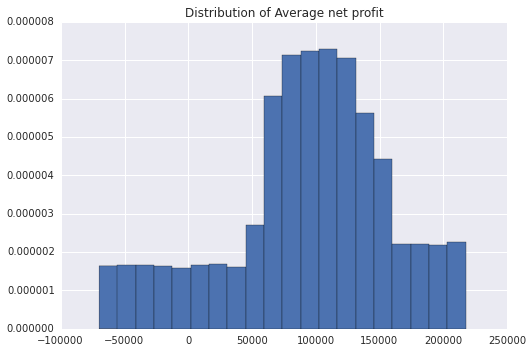

In [31]:
plt.title("Distribution of Average net profit")
plt.hist(samples,bins=20,normed=1);

<div class="alert alert-warning">
This experiment shows difference between simplisic model (average) and monte carlo. This method stimulates well our market research. it takes count relationship between sales Volumne and sales Price in market research instead of ignoring them in average model. In addition, you can see that the average net profit value is around 100.000 from the graph and it seems we have more chance to earn profit rather than lose money.
<br><br>
However, we also intuitively recognize the problem of this method in pratice that we have to know the distribution of your random variable. In practice, the distribution of unit cost, market scenario is not uniform or any distribution we learnt, it is affected by other aspects.  
</div>

In [71]:
num_simulation = [10,100,1000,10000,100000,1000000,1500000,2000000,2500000,3000000]
for k in num_simulation:
    total = 0.0
    for i in range(0,k):
        unit_cost = random.uniform(5.5,7.5)
        market_scenario = random.randint(0,2)
        #fixed_cost = random.uniform(120000,117500)
        fixed_cost = 120000
        sales_volume, price = get_sales_volume_price(market_scenario)
        netProfit = calNetProfit(sales_volume,price,unit_cost,fixed_cost)
        total = total + netProfit
    print("average net profit with %d trials:"%(k), total/k)

average net profit with 10 trials: 86020.89146922159
average net profit with 100 trials: 100722.80334837994
average net profit with 1000 trials: 93250.08312219223
average net profit with 10000 trials: 92824.72380658054
average net profit with 100000 trials: 92635.69179303007
average net profit with 1000000 trials: 92438.11129084049
average net profit with 1500000 trials: 92559.72004979533
average net profit with 2000000 trials: 92408.03677994985
average net profit with 2500000 trials: 92489.4125523364
average net profit with 3000000 trials: 92478.51627822837


<div class="alert alert-warning">
From this experiment, we want to observe the effect of number of trials. The more trials we sample, the more chance for us to get close to the true net average profit value. As can be seen from the result, its value is stable around 92500 when numbers of trials over 1.000.000 which close to our true average net profit. In case of small trial, the value fluctuate greatly every time we re-run the code again and the result have less chance to reach the right answer.
</div>


# 3. A brief summary of the Monte Carlo Simulation (MCS) technique

- A MCS allows several inputs to be used at the same time to compute the probability distribution of one or more outputs
- Different types of probability distributions can be assigned to the inputs of the model, depending on any *a-priori* information that is available. When the distribution is completely unknown, a common technique is to use a distribution computed by finding the best fit to the data you have
- The MCS method is also called a **stochastic method** because it uses random variables. Note also that the general assumption is for input random variables to be independent from each other. When this is not the case, there are techniques to account for correlation between random variables.
- A MCS generates the output as a range instead of a fixed value and shows how likely the output value is to occur in that range. In other words, the model outputs a probability distribution.

# 4. Common distributions used in MCS
In what follows, we summarize the most common probability distributions that are used as *a-priori* distributions for input random variables:

- *Normal/Gaussian Distribution*: this is a continuous distribution applied in situations where the mean and the standard deviation of a given input variable are given, and the mean represents the most probable value of the variable. In other words, values "near" the mean are most likely to occur.  This is symmetric distribution, and it is not bounded in its co-domain. It is very often used to  describe natural phenomena, such as people’s heights, inflation rates, energy prices, and so on and so forth. An illustration of a normal distribution is given below:
![normal_distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/320px-Normal_Distribution_PDF.svg.png)

- *Lognormal Distribution*: this is a distribution which is appropriate for variables taking values in the range $[0, \infty]$. Values are positively skewed, not symmetric like a normal distribution.  Examples of variables described by some lognormal distributions include, for example, real estate property values, stock prices, and oil reserves. An illustration of a lognormal distribution is given below:
![log_normal_distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/PDF-log_normal_distributions.svg/320px-PDF-log_normal_distributions.svg.png) 

- *Triangular Distribution*: this is a continuous distribution with fixed minimum and maximum values. It is bounded by the minimum and maximum values and can be either symmetrical (the most probable value = mean = median) or asymmetrical. Values around the most likely value (e.g. the mean) are more likely to occur.  Variables that could be described by a triangular distribution include, for example, past sales history per unit of time and inventory levels. An illustration of a triangular distribution is given below:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Triangular_distribution_PMF.png/320px-Triangular_distribution_PMF.png)

- *Uniform Distribution*: this is a continuous distribution bounded by known minimum and maximum values. In contrast to the triangular distribution, the likelihood of occurrence of the values between the minimum and maximum is the same. In other words, all values have an equal chance of occurring, and the distribution is simply characterized by the minimum and maximum values. Examples of variables that can be described by a uniform distribution include manufacturing costs or future sales revenues for a new product. An illustration of the uniform distribution is given below:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/320px-Uniform_Distribution_PDF_SVG.svg.png)

- *Exponential Distribution*: this is a continuous distribution used to model the time that pass between independent occurrences, provided that the rate of occurrences is known. An example of the exponential distribution is given below:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Exponential_pdf.svg/320px-Exponential_pdf.svg.png)

- *Discrete Distribution* : for this kind of distribution, the "user" defines specific values that may occur and the likelihood of each of them.  An example might be the results of a lawsuit: 20% chance of positive verdict, 30% change of negative verdict, 40% chance of settlement, and 10% chance of mistrial.


# 5. A real use case: estimating the financial risk of a portfolio of stocks
We hope that by now you have a good understanding about Monte Carlo simulation. Next, we apply this method to a real use case: *financial risk estimation*.

Imagine that you are an investor on the stock market. You plan to buy some stocks and you want to estimate the maximum loss you could incur after two weeks of investing. This is the quantity that the financial statistic "Value at Risk" (VaR) seeks to measure. [VaR](https://en.wikipedia.org/wiki/Value_at_risk) is defined as a measure of investment risk that can be used as a reasonable estimate of the maximum probable loss for a value of an investment portfolio, over a particular time period. A VaR statistic depends on three parameters: a portfolio, a time period, and a confidence level. A VaR of 1 million dollars with a 95% confidence level over two weeks, indicates the belief that the portfolio stands only a 5% chance of losing more than 1 million dollars over two weeks. VaR has seen widespread use across financial services organizations. This statistic plays a vital role in determining how much cash investors must hold to meet the credit ratings that they seek. In addition, it is also used to understand the risk characteristics of large portfolios: it is a good idea to compute the VaR before executing trades, such that it can help take informed decisions about investments. 

Our goal is calculating VaR of two weeks interval with 95% confidence level and the associated [VaR confidence interval](http://www.investopedia.com/ask/answers/041615/whats-difference-between-confidence-level-and-confidence-interval-value-risk-var.asp).


## 5.1. Terminology
In this use case, we will use some terms that might require a proper definition, given the domain. This is what we call the *Domain Knowledge*.

- **Instrument**: A tradable asset, such as a bond, loan, option, or stock investment. At any particular time, an instrument is considered to have a value, which is the price for which it can be sold. In the use case of this notebook, instruments are stock investments.
- **Portfolio**: A collection of instruments owned by a financial institution. 
- **Return**: The change in an instrument or portfolio’s value over a time period. 
- **Loss**: A negative return. 
- **Index**: An imaginary portfolio of instruments. For example, the NASDAQ Composite index includes about 3,000 stocks and similar instruments for major US and international companies. 
- **Market factor**: A value that can be used as an indicator of macro aspects of the financial climate at a particular time. For example, the value of an index, the Gross Domestic Product of the United States, or the exchange rate between the dollar and the euro. We will often refer to market factors as just factors.

## 5.2. The context of our use case
We have a list of instruments that we plan to invest in. The historical data of each instrument has been collected for you. For simplicity, assume that the returns of instruments at a given time, depend on 4 market factors only: 

- GSPC value
- IXIC value 
- The return of crude oil
- The return of treasury bonds

Our goal is building a model to predict the loss after two weeks' time interval with confidence level set to 95%.

As a side note, it is important to realize that the approach presented in this Notebook is a simplified version of what would happen in a real Financial firm. For example, the returns of instruments at a given time often depend on more than 4 market factors only! Moreover, the choice of what constitute an appropriate market factor is an art!



## 5.3. The Data
The stock data can be downloaded (or scraped) from Yahoo! by making a series of REST calls. The data includes multiple files. Each file contains the historical information of each instrument that we want to invest in. The data is in the following format (with some samples):
```
Date, Open, High, Low, Close, Volume, Adj Close
2016-01-22,66.239998,68.07,65.449997,67.860001,137400,67.860001
2016-01-21,65.410004,66.18,64.459999,65.050003,148000,65.050003
2016-01-20,64.279999,66.32,62.77,65.389999,141300,65.389999
2016-01-19,67.720001,67.989998,64.720001,65.379997,178400,65.379997
```

The data of GSPC and IXIC values (our two first market factors) are also available on Yahoo! and use the very same format. 

The crude oil and treasure bonds data is collected from investing.com, and has a different format, as shown below (with some samples):
```
Date    Price   Open    High    Low     Vol.    Change %
Jan 25, 2016    32.17   32.36   32.44   32.10   -       -0.59%
Jan 24, 2016    32.37   32.10   32.62   31.99   -       0.54%
Jan 22, 2016    32.19   29.84   32.35   29.53   -       9.01%
Jan 21, 2016    29.53   28.35   30.25   27.87   694.04K 11.22%
Jan 20, 2016    26.55   28.33   28.58   26.19   32.11K  -6.71%
Jan 19, 2016    28.46   29.20   30.21   28.21   188.03K -5.21%
```

In our use case, the factors' data will be used jointly to build a statistical model: as a consequence, we first need to preprocess the data to proceed.

## 5.4. Data preprocessing
In this Notebook, all data files have been downloaded for you, such that you can focus on pre-processing. Next, we will:

  - Read the factor data files which are in two different formats, process and merge them together
  - Read the stock data and pre-process it
  - Trim all data into a specific time region
  - Fill in the missing values
  - Generate the data of returns in each two weeks' time interval window
  
### Factor data pre-processing

We need two functions to read and parse data from Yahoo! and Investing.com respectively. We are interested only in information about the time and the corresponding returns of a factor or an instrument: as a consequence, we will project away many columns of our RAW data, and keep only the information we are interested in.

The 3000-instrument and the 4-factor history are small enough to be read and processed locally: we do not need to use the power of parallel computing to proceed. Note that this is true also for larger cases with hundreds of thousands of instruments and thousands of factors. The need for a distributed system like Spark comes in when actually **running** the Monte Carlo simulations, which can require massive amounts of computation on each instrument. 

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 4
#### Question 4.1
<div class="alert alert-info">
Write a function named `readInvestingDotComHistory` to parse data from investing.com based on the format specified above (see Section 5.3). Recall that we use two factors here: one that is related to the price of crude oil, one that is related to some specific US bonds. 

<ul></ul>

Print the first 5 entries of the first factor (crude oil price) in the parsed data.

<ul></ul>

Note that we are only interested in the date and price of stocks.

</div>

<div class="label label-success">HINT</div>  
You can parse a string to `datetime` object by using the function `strptime(<string>, <dtime_format>)`. In this case, the datetime format is `"%b %d, %Y"`. For more information, please follow this [link](https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior).

In the next cell, we simply copy data from our HDFS cluster (that contains everything we need for this Notebook) to the instance (a Docker container) running your Notebook. This means that you will have "local" data that you can process without using Spark. Note the folder location: find and verify that you have correctly downloaded the files!

In [6]:
! [ -d monte-carlo-risk ] || (echo "Downloading prepared data from HDFS. Please wait..." ; hdfs dfs -copyToLocal /datasets/monte-carlo-risk . ; echo "Done!";)

In [1]:
from datetime import datetime
from datetime import timedelta
from itertools import islice
%matplotlib inline
import numpy as np
import pandas as pd
# Ploting
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns 
# Display
from IPython.display import display, HTML
# Math - ML
import matplotlib.mlab as mlab
from matplotlib.mlab import PCA
import math

# Statistic tool
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import statsmodels.stats.diagnostic as tsd
import statsmodels.tsa.stattools as ta
import statsmodels.graphics.tsaplots as taplot
from scipy import stats
import warnings
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate

font = {'weight': 'normal','size': 16,}

warnings.filterwarnings('ignore')

base_folder = "monte-carlo-risk/"

factors_folder= base_folder + "factors/"

# read data from local disk
def readInvestingDotComHistory(fname):
    def process_line(line):
        cols = line.split('\t')
        date = datetime.strptime(cols[0], '%b %d, %Y')
        value = float(cols[1])
        return (date, value)
    
    with open(fname) as f:
        content_w_header = f.readlines()
        # remove the first line 
        # and reverse lines to sort the data by date, in ascending order
        content = content_w_header[-1:0:-1]
        return list(map(process_line , content))

factor1_files = ['crudeoil.tsv', 'us30yeartreasurybonds.tsv']
factor1_files = map(lambda fn: factors_folder + fn, factor1_files)
factors1 = [readInvestingDotComHistory(f) for f in factor1_files]

print(factors1[0][0:5])

[(datetime.datetime(2006, 1, 26, 0, 0), 66.26), (datetime.datetime(2006, 1, 27, 0, 0), 67.76), (datetime.datetime(2006, 1, 30, 0, 0), 68.35), (datetime.datetime(2006, 1, 31, 0, 0), 67.92), (datetime.datetime(2006, 2, 1, 0, 0), 66.56)]


In [2]:
print ('Crude Oil data collected in %d years'%(np.round((factors1[0][-1][0]-factors1[0][0][0]).days/365.25)))
print ('Treasury Bonds data collected in %d years'%(np.round(((factors1[1][-1][0]-factors1[1][0][0]).days)/365.25)))

Crude Oil data collected in 10 years
Treasury Bonds data collected in 8 years


<div class="alert alert-warning">
Crude oil are collected in 10 years and US treasury bonds are collected in 8 years. Because of the difference in time, we need a standardizing step. 
</div>

Now, the data structure `factors1` is a list, containing data that pertains to two (out of a total of four) factors that influence the market, as obtained by investing.com. Each element in the list is a tuple, containing some sort of timestamp, and the value of one of the two factors discussed above. From now on, we call these elements "**records**" or "**entries**". Visually, `factors1` looks like this:

| 0 (crude oil) | 1 (US bonds)|
| --- | --- |
| time_stamp, value | time_stamp, value |
| ... | ... |
| time_stamp, value | time_stamp, value |
| ... | ... |


#### Question 4.2
<div class="alert alert-info">
Write a function named `readYahooHistory` to parse data from yahoo.com based on its format, as described in Section 5.3.  
<ul></ul>
Print the first 5 entries of the first factor (namely GSPC). Comment the time range of the second batch of data we use in our Notebook.  
<ul></ul>

Note that we are only interested in the date and price of stocks.
</div>

<div class="label label-danger">NOTE</div> The datetime format now is in a different format than the previous one.

<div class="label label-success">HINT</div> Use a terminal (or put the bash commands inline in your Notebook) to list filenames in your local working directory to find and have a look at your local files.

In [3]:
# read data from local disk
def readYahooHistory(fname):
    def process_line(line):
        cols = line.split(',')
        date = datetime.strptime(cols[0], '%Y-%m-%d')
        value = float(cols[1])
        return (date, value)
    
    with open(fname) as f:
        content_w_header = f.readlines()
        # remove the first line 
        # and reverse lines to sort the data by date, in ascending order
        content = content_w_header[-1:0:-1]
        return list(map(process_line , content))
    

factor2_files = ['GSPC.csv','IXIC.csv']
factor2_files = map(lambda fn: factors_folder + fn, factor2_files)

factors2 = [readYahooHistory(f) for f in factor2_files]

print(factors2[0][:5])

[(datetime.datetime(1950, 1, 3, 0, 0), 16.66), (datetime.datetime(1950, 1, 4, 0, 0), 16.85), (datetime.datetime(1950, 1, 5, 0, 0), 16.93), (datetime.datetime(1950, 1, 6, 0, 0), 16.98), (datetime.datetime(1950, 1, 9, 0, 0), 17.08)]


In [4]:
print ('GSPC data collected in %d years'%(np.round((factors2[0][-1][0]-factors2[0][0][0]).days/365.25)))
print ('From:',factors2[0][0][0].strftime('%d/%m/%Y'),'to',factors2[0][-1][0].strftime('%d/%m/%Y'))

GSPC data collected in 66 years
From: 03/01/1950 to 22/01/2016


<div class="alert alert-warning">
If we want to use these 4 factors together, there maybe some problems: The time range in 4 factors are different. So we build the model using 4 factors and the stock prices, we cannot use all data, only the time interval intersection between 4 factor data. 
</div>

Now, the data structure `factors2` is again list, containing data that pertains to the next two (out of a total of four) factors that influence the market, as obtained by Yahoo!. Each element in the list is a tuple, containing some sort of timestamp, and the value of one of the two factors discussed above. Visually, `factors2` looks like this:

| 0 (GSPC) | 1 (IXIC)|
| --- | --- |
| time_stamp, value | time_stamp, value |
| ... | ... |
| time_stamp, value | time_stamp, value |
| ... | ... |


### Stock data pre-processing

Next, we prepare the data for the instruments we consider in this Notebook (i.e., the stocks we want to invest in). 

#### Question 4.3

<div class="alert alert-info">
In this Notebook, we assume that we want to invest on the first 35 stocks out of the total 3000 stocks present in our datasets.

<ul></ul>

Load and prepare all the data for the considered instruments (the first 35 stocks) which have historical information for more than 5 years. This means that all instruments with less than 5 years of history should be removed.

</div>

<div class="label label-success">HINT</div> we suggest to open a terminal window (not on your local machine, but the Notebook terminal that you can find on the Jupyter dashboard) and visually check the contents of the directories holding our dataset, if you didn't do this before! Have a look at how stock data is organized!

In [5]:
from os import listdir
from os.path import isfile, join

stock_folder = base_folder + 'stocks'

def process_stock_file(fname):
    try:
        return readYahooHistory(fname)
    except Exception as e:
        raise e
        return None



# select path of all stock data files in "stock_folder"
files = [join(stock_folder, f) for f in listdir(stock_folder) if isfile(join(stock_folder, f))]

# assume that we invest only the first 35 stocks (for faster computation)
files = files[:35]

# read each line in each file, convert it into the format: (date, value)
rawStocks = [process_stock_file(f) for f in files]

# select only instruments which have more than 5 years of history
# Note: the number of business days in a year is 260
number_of_years = 5
rawStocks = list(filter(lambda instrument:((instrument[-1][0]-instrument[0][0]).days/365) >= 7
                        , rawStocks))

# For testing, print the first 5 entry of the first stock
print(rawStocks[0][:5])


[(datetime.datetime(1997, 8, 14, 0, 0), 39.0), (datetime.datetime(1997, 8, 15, 0, 0), 42.0), (datetime.datetime(1997, 8, 18, 0, 0), 44.0), (datetime.datetime(1997, 8, 19, 0, 0), 55.5), (datetime.datetime(1997, 8, 20, 0, 0), 48.0)]


In [6]:
[(x[0][0],x[-1][0]) for x in rawStocks]

[(datetime.datetime(1997, 8, 14, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(1985, 7, 1, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(2000, 1, 7, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(2007, 12, 6, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(1996, 4, 30, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(2007, 9, 28, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(2003, 11, 12, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(2001, 1, 3, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(2006, 11, 16, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(2006, 11, 2, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(1984, 7, 19, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(1999, 5, 13, 0, 0), datetime.datetime(2016, 1, 22, 0, 0)),
 (datetime.datetime(2005, 3, 30, 0, 0), datetime.date

<div class="alert alert-warning">
Since in the next step "Time alignment for pur data", we use data which have start date (23/01/2009) and end date (23/01/2014). Instruments need to need to be in that time. 
<br><br>
However, our data is collected until now. That means the condition is filtering data have historical data over 5 years is not right in this case. 
</div>

### Time alignment for our data
Different types of instruments may trade on different days, or the data may have missing values for other reasons, so it is important to make sure that our different histories align. First, we need to trim all of our time series to the same region in time. Then, we need to fill in missing values. To deal with time series that have missing values at the start and end dates in the time region, we simply fill in those dates with nearby values in the time region.

#### Question 4.4
<div class="alert alert-info">
Assume that we only focus on the data from 23/01/2009 to 23/01/2014. Write a function named `trimToRegion` to select only the records in that time interval. 

<ul></ul>

**Requirements**: after processing, each instrument $i$ has a list of records: $[r_0, r_2,...,r_{m_i}]$ such that $r_0$ and $r_{m_i}$ are assigned, respectively, the first and the last values corresponding to the extremes of the given time interval. For example: $r_0$ should contain the value at date 23/01/2009.
</div>

In [7]:
# note that the data of crude oild and treasury is only available starting from 26/01/2006 
start = datetime(year=2009, month=1, day=23)
end = datetime(year=2014, month=1, day=23)

def trimToRegion(history, start, end):
    def isInTimeRegion(entry):
        (date, value) = entry
        return date >= start and date <= end

    # only select entries which are in the time region
    trimmed = list(filter( isInTimeRegion, history))
    
    # if the data has incorrect time boundaries, add time boundaries
    if trimmed[0][0] != start:
        trimmed.insert(0, (start, trimmed[0][1]))
    if trimmed[-1][0] != end:
        trimmed.append((end, trimmed[-1][1]))
    return trimmed
    
# test our function
trimmedStock0  = trimToRegion(rawStocks[0], start, end)
# the first 5 records of stock 0
print(trimmedStock0[:5])
# the last 5 records of stock 0
print(trimmedStock0[-5:])

assert(trimmedStock0[0][0] == start), "the first record must contain the price in the first day of time interval"
assert(trimmedStock0[-1][0] == end), "the last record must contain the price in the last day of time interval"

[(datetime.datetime(2009, 1, 23, 0, 0), 19.4), (datetime.datetime(2009, 1, 26, 0, 0), 19.67), (datetime.datetime(2009, 1, 27, 0, 0), 19.809999), (datetime.datetime(2009, 1, 28, 0, 0), 20.469999), (datetime.datetime(2009, 1, 29, 0, 0), 21.41)]
[(datetime.datetime(2014, 1, 16, 0, 0), 37.369999), (datetime.datetime(2014, 1, 17, 0, 0), 37.470001), (datetime.datetime(2014, 1, 21, 0, 0), 37.73), (datetime.datetime(2014, 1, 22, 0, 0), 37.779999), (datetime.datetime(2014, 1, 23, 0, 0), 37.59)]


### Dealing with missing values
We expect that we have the price of instruments and factors **in each business day**. Unfortunately, there are many missing values in our data: this means that we miss data for some days, e.g. we have data for the Monday of a certain week, but not for the subsequent Tuesday. So, we need a function that helps filling these missing values.

Next, we provide to you the function to fill missing value: read it carefully!

In [8]:
def fillInHistory(history, start, end):
    curr = history
    filled = []
    idx = 0
    curDate = start
    numEntries = len(history)
    while curDate < end:
        
        # if the next entry is in the same day
        # but the curDate has already skipped it and moved to the next monday
        # (only in that case, curr[idx + 1][0] < curDate )
        # then move to the next entry
        while idx + 1 < numEntries and curr[idx + 1][0] == curDate:
            idx +=1

        # only add the last value of instrument in a single day
        # check curDate is weekday or not
        # 0: Monday -> 5: Saturday, 6: Sunday
        if curDate.weekday() < 5:
            
            filled.append((curDate, curr[idx][1]))
            # move to the next business day
            curDate += timedelta(days=1)
        
        # skip the weekends
        if curDate.weekday() >= 5:
            # if curDate is Sat, skip 2 days, otherwise, skip 1 day
            curDate += timedelta(days=(7-curDate.weekday()))

    return filled

In [9]:
def fillInHistory_fix(history, start, end):
    curr = history
    filled = []
    idx = 0
    curDate = start
    numEntries = len(history)
    while curDate < end:
        while idx + 1 < numEntries and curr[idx + 1][0] == curDate:
            idx +=1
        
        if curDate.weekday() < 5:
            filled.append((curDate, curr[idx][1]))
            curDate += timedelta(days=1)
        else:
            if curDate.weekday() >= 5:
                curDate += timedelta(days = 1)
    return filled

#### Question 4.5
<div class="alert alert-info">
Trim data of stocks and factors into the given time interval.
</div>

In [10]:
def threshold_plot(ax, x, y, threshv, color, overcolor):
    """
    Helper function to plot points above a threshold in a different color

    Parameters
    ----------
    ax : Axes
        Axes to plot to
    x, y : array
        The x and y values

    threshv : float
        Plot using overcolor above this value

    color : color
        The color to use for the lower values

    overcolor: color
        The color to use for values over threshv

    """
    # Create a colormap for red, green and blue and a norm to color
    # f' < -0.5 red, f' > 0.5 blue, and the rest green
    cmap = ListedColormap([color, overcolor])
    norm = BoundaryNorm([np.min(y), threshv, np.max(y)], cmap.N)

    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be numlines x points per line x 2 (x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(y)

    ax.add_collection(lc)
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(y)*1.1, np.max(y)*1.1)
    return lc

In [11]:
# trim into a specific time region
# and fill up the missing values
stocks = list(map(lambda stock: \
            fillInHistory(
                trimToRegion(stock, start, end), 
            start, end), 
        rawStocks))



# merge two factors, trim each factor into a time region
# and fill up the missing values
allfactors = factors1 + factors2
factors = list(map( lambda factor:
            fillInHistory(trimToRegion(factor,start,end),start,end), 
            allfactors))

In [56]:
def buildWindow(seq, k=2):
    "Returns a sliding window (of width k) over data from iterable data structures"
    "   s -> (s0,s1,...s[k-1]), (s1,s2,...,sk), ...                   "
    it = iter(seq)
    result = tuple(islice(it, k))
    if len(result) == k:
        yield result  
    for elem in it:
        result = result[1:] + (elem,)
        yield result
def calculateReturn(window):
    # return the change of value after two weeks
    return window[-1][1] - window[0][1] 

def twoWeekReturns(history):
    # we use 10 instead of 14 to define the window
    # because financial data does not include weekends
    return [calculateReturn(entry) for entry in buildWindow(history, 10)]

stocksReturns = list(map(twoWeekReturns, stocks))
factorsReturns = list(map(twoWeekReturns, factors))

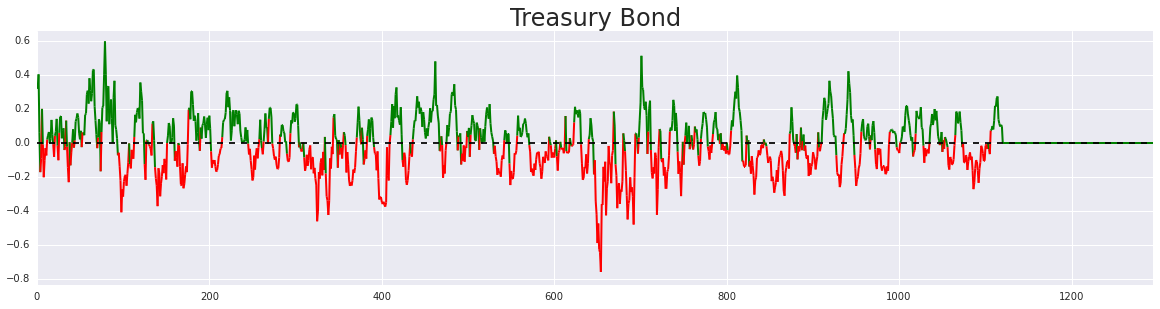

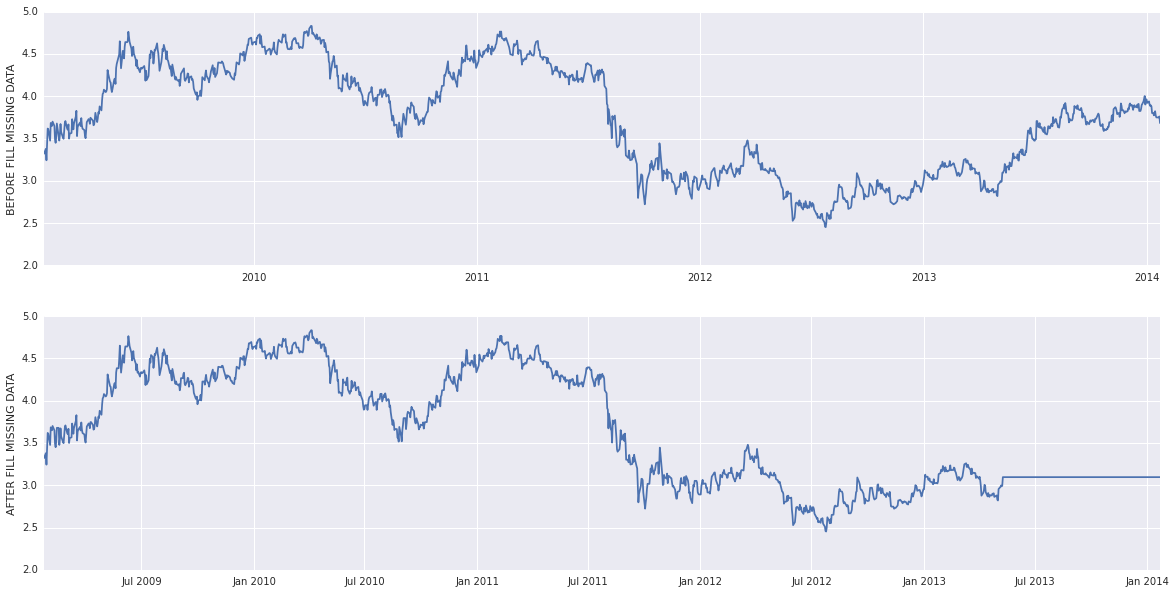

In [13]:
pdf = pd.DataFrame(factors[1])
pdf1 = pd.DataFrame(pd.DataFrame(trimToRegion(allfactors[1], start, end)))
plt.figure(figsize=(20,10))
ind = np.arange(len(factorsReturns[0]))
ax = plt.subplot(2,1,1)
data = np.array(factorsReturns[1])
lc = threshold_plot(ax, ind, data, 0, 'r', 'g')
ax.axhline(0, color='k', ls='--')
lc.set_linewidth(2)
plt.title('Treasury Bond',fontsize=24)

plt.figure(figsize=(20,10))
ax2 = plt.subplot(2,1,2)
ax2.set_ylabel("AFTER FILL MISSING DATA")
plt.plot(pdf[0],pdf[1])
ax3 = plt.subplot(2,1,1)
plt.plot(pdf1[0],pdf1[1])
ax3.set_ylabel("BEFORE FILL MISSING DATA")
plt.show()

In [14]:
# trim into a specific time region
# and fill up the missing values
stocks = list(map(lambda stock: \
            fillInHistory_fix(
                trimToRegion(stock, start, end), 
            start, end), 
        rawStocks))



# merge two factors, trim each factor into a time region
# and fill up the missing values
allfactors = factors1 + factors2
factors = list(map( lambda factor:
            fillInHistory_fix(trimToRegion(factor,start,end),start,end), 
            allfactors))
            
# test our code
print("the first 5 records of stock 0:", stocks[0][:5], "\n")
print("the last 5 records of stock 0:", stocks[0][-5:], "\n")
print("the first 5 records of factor 0:", factors[0][:5], "\n")
print("the first 5 records of factor 0:", factors[0][-5:], "\n")

the first 5 records of stock 0: [(datetime.datetime(2009, 1, 23, 0, 0), 19.4), (datetime.datetime(2009, 1, 26, 0, 0), 19.67), (datetime.datetime(2009, 1, 27, 0, 0), 19.809999), (datetime.datetime(2009, 1, 28, 0, 0), 20.469999), (datetime.datetime(2009, 1, 29, 0, 0), 21.41)] 

the last 5 records of stock 0: [(datetime.datetime(2014, 1, 16, 0, 0), 37.369999), (datetime.datetime(2014, 1, 17, 0, 0), 37.470001), (datetime.datetime(2014, 1, 20, 0, 0), 37.470001), (datetime.datetime(2014, 1, 21, 0, 0), 37.73), (datetime.datetime(2014, 1, 22, 0, 0), 37.779999)] 

the first 5 records of factor 0: [(datetime.datetime(2009, 1, 23, 0, 0), 46.47), (datetime.datetime(2009, 1, 26, 0, 0), 45.73), (datetime.datetime(2009, 1, 27, 0, 0), 41.58), (datetime.datetime(2009, 1, 28, 0, 0), 42.16), (datetime.datetime(2009, 1, 29, 0, 0), 41.44)] 

the first 5 records of factor 0: [(datetime.datetime(2014, 1, 16, 0, 0), 93.96), (datetime.datetime(2014, 1, 17, 0, 0), 94.37), (datetime.datetime(2014, 1, 20, 0, 0), 

In [15]:
pd.DataFrame(list(filter(lambda x: (x[0]>datetime(2013,5,8)) & (x[0]<datetime(2013,5,17)),allfactors[1]))
             ,columns=['date','value'])

date  value
0 2013-05-09  2.995
1 2013-05-10  3.096
2 2013-05-11  3.096
3 2013-05-13  3.127
4 2013-05-14  3.200
5 2013-05-15  3.162
6 2013-05-16  3.096

In [16]:
print("11/5/2013 weekday is",datetime(2013,5,11).weekday())

11/5/2013 weekday is 5


<div class="alert alert-danger">
<h3> critical error in filling missing data  </h3>

As you see the data after filling, there is a strange line from around May 2013 to Jan 2014, which do not have a same shape with original data. The error occurs in our data. As you can see 11/5/2013 is Saturday but the market is still have a value. That makes your code go wrong. <br><br>

when you check condition **while idx + 1 < numEntries and curr[idx + 1][0] == curDate**, ind increase by 1, it goes to date 11/5/2013. Because you see your current day is Friday $(<5)$, after you increase currentDat by 1. you check it nextday is weekend again, you increase by 2 without increasing idx. From that your data is stuck into the date 11/5/2013. That make we lose information from 11/5/2013 until our end day. I try to fix it with simple logic: we iterate by each day, append if weekday or skip append if weekend.
</div>

Recall that Value at Risk (VaR) deals with **losses over a particular time horizon**. We are not concerned with the absolute prices of instruments, but how those prices **change over** a given period of time. In our project, we will set that length to two weeks: we use the sliding window method to transform time series of prices into an overlapping sequence of price change over two-week intervals.

The figure below illustrates this process. The returns of market factors after each two-week interval is calculated in the very same way.

![](https://dl.dropboxusercontent.com/s/r9ucsicichb6gjh/two-week-time-interval.svg)

#### Question 4.6
<div class="alert alert-info">
Compute the returns of the stocks after each two-week time window.
</div>

In [17]:
def buildWindow(seq, k=2):
    "Returns a sliding window (of width k) over data from iterable data structures"
    "   s -> (s0,s1,...s[k-1]), (s1,s2,...,sk), ...                   "
    it = iter(seq)
    result = tuple(islice(it, k))
    if len(result) == k:
        yield result  
    for elem in it:
        result = result[1:] + (elem,)
        yield result
def calculateReturn(window):
    # return the change of value after two weeks
    return window[-1][1] - window[0][1] 

def twoWeekReturns(history):
    # we use 10 instead of 14 to define the window
    # because financial data does not include weekends
    return [calculateReturn(entry) for entry in buildWindow(history, 10)]

stocksReturns = list(map(twoWeekReturns, stocks))
factorsReturns = list(map(twoWeekReturns, factors))
 
# test our functions
print("the first 5 returns of stock 0:", stocksReturns[0][:5])
print("the last 5 returns of stock 0:", stocksReturns[0][-5:])

the first 5 returns of stock 0: [0.8000010000000017, 1.0, 0.7200019999999974, -0.27999800000000263, -1.5800000000000018]
the last 5 returns of stock 0: [-1.1599999999999966, -1.4599989999999963, -0.8399999999999963, -0.4599990000000034, 0.0]


# Analysis the factor

### Factor Prize by day

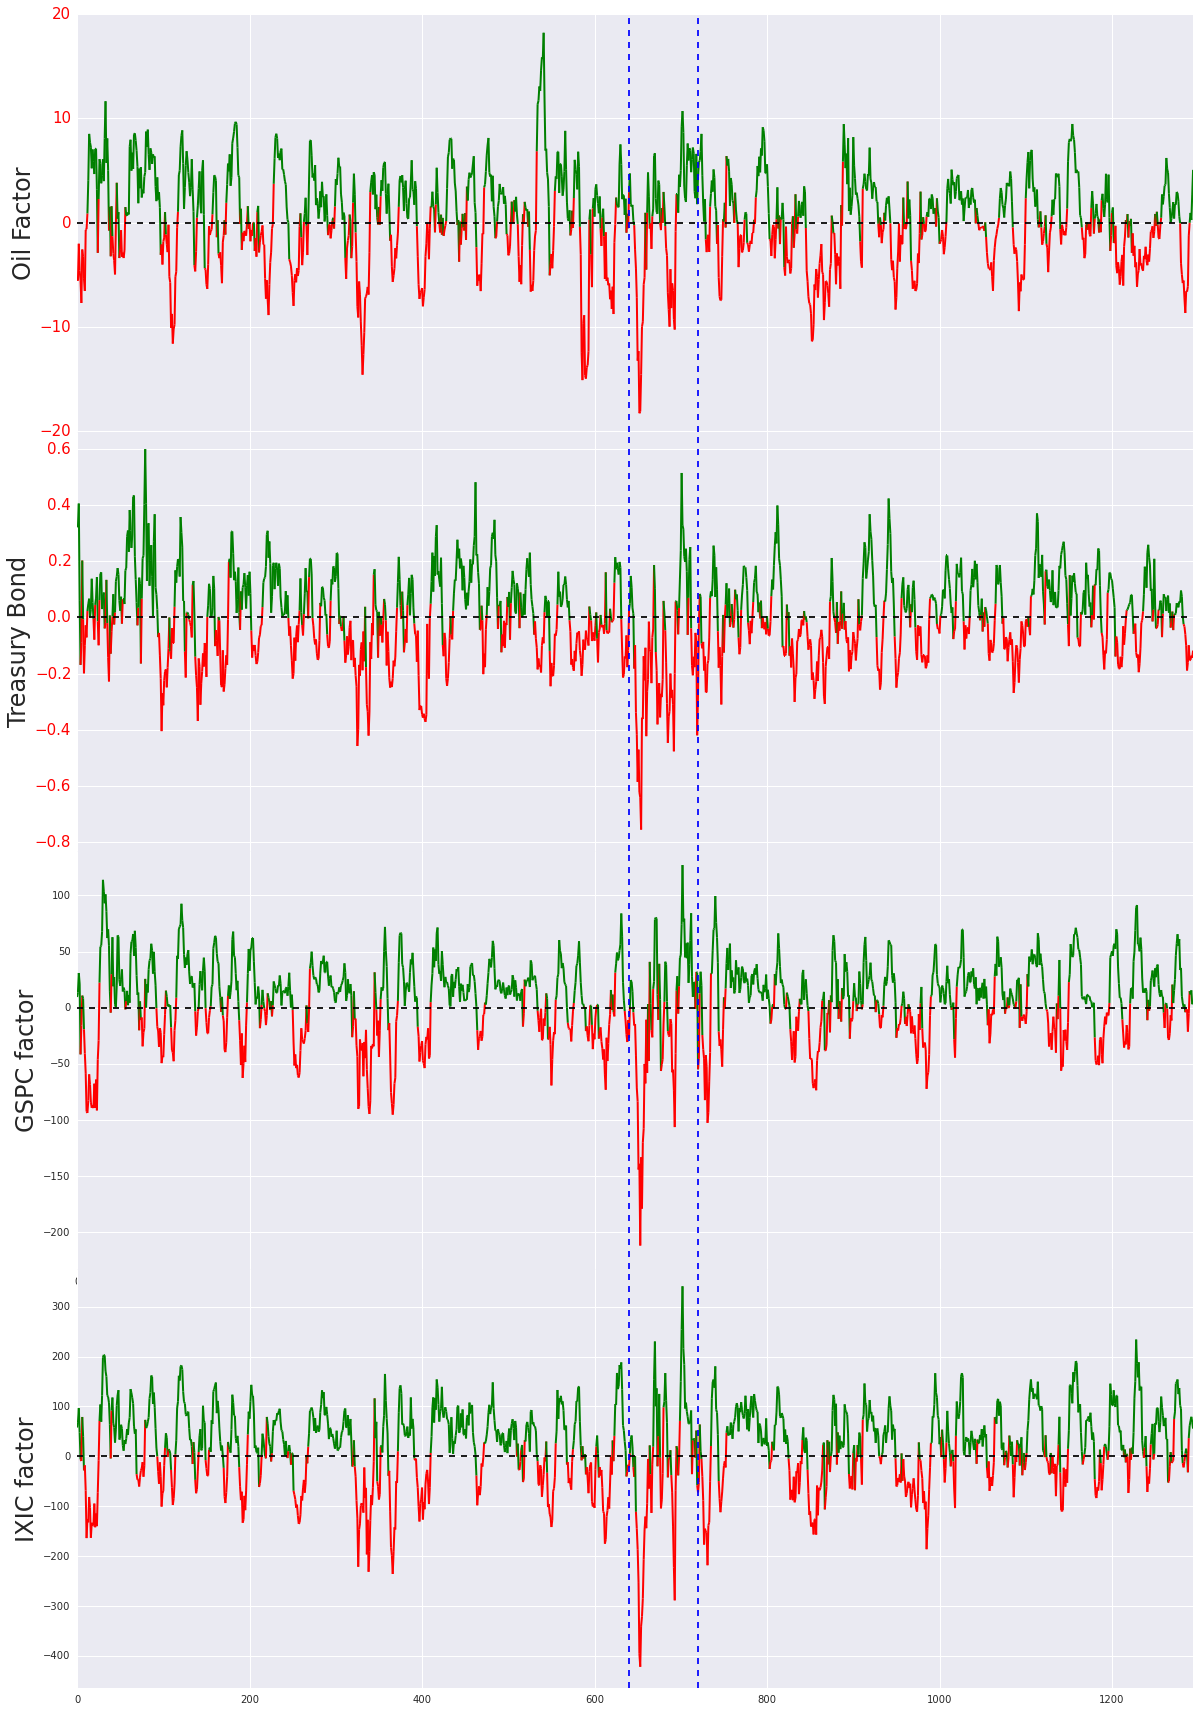

In [18]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0)

ind = np.arange(len(factorsReturns[0]))

ax1 = plt.subplot(4,1,1)
data = np.array(factorsReturns[0])
lc1 = threshold_plot(ax1, ind, data, 0, 'r', 'g')
ax1.axhline(0, color='k', ls='--')
ax1.axvline(640, color='b', ls='--')
ax1.axvline(720, color='b', ls='--')
ax1.tick_params(axis='y', colors='red',labelsize=15)
ax1.set_ylabel('Oil Factor',fontsize=24)

lc1.set_linewidth(2)

ax2 = plt.subplot(4,1,2,sharex=ax1)
data = np.array(factorsReturns[1])
lc2 = threshold_plot(ax2, ind, data, 0, 'r', 'g')
ax2.axhline(0, color='k', ls='--')
ax2.axvline(640, color='b', ls='--')
ax2.axvline(720, color='b', ls='--')
ax2.tick_params(axis='y', colors='red',labelsize=15)
lc2.set_linewidth(2)
ax2.set_ylabel('Treasury Bond',fontsize=24)


ax3 = plt.subplot(4,1,3,sharex=ax1)
data = np.array(factorsReturns[2])
lc3 = threshold_plot(ax3, ind, data, 0, 'r', 'g')
ax3.axhline(0, color='k', ls='--')
ax3.axvline(640, color='b', ls='--')
ax3.axvline(720, color='b', ls='--')
lc3.set_linewidth(2)
ax3.set_ylabel('GSPC factor',fontsize=24)


ax4 = plt.subplot(4,1,4,sharex=ax1)
data = np.array(factorsReturns[3])
lc4 = threshold_plot(ax4, ind, data, 0, 'r', 'g')
ax4.axhline(0, color='k', ls='--')
ax4.axvline(640, color='b', ls='--')
ax4.axvline(720, color='b', ls='--')
lc4.set_linewidth(2)
ax4.set_ylabel('IXIC factor',fontsize=24)


xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.show()

<div class="alert alert-warning">

I show you value of the return in 2 weeks over the time. If you look into the period bounded with 2 blue line, there are some relation between 4 factors. all of them decrease dramatically and increase greatly later in same time period. That means 4 factors are somehow dependent to each other. 
<br><br>
From the sample problem, we sample each random variable indepentdenly but it will be wrong if those random variable have relation. So if we want to keep the same method as before, we have to remove relationship between factors. PCA is one of the method I think first.
</div>

<div class="alert alert-warning">
In addition, the return of each factor have large different. while treasury bond return is quite small [-0.6,0.6], GSPCS and IXIC have high return, corresponding to [-150,+150] and [-300,+300]. In my opinion, it will affect to the weight of each factor in linear model
</div>

Alright! Now we have data that is properly aligned to start the training process: stocks' returns and factors' returns, per time windows of two weeks. Next, we will apply the MCS method.

## 5.5. Summary guidelines to apply the MCS method on the data we prepared
Next, we overview the steps that you have to follow to build a model of your data, and then use Monte Carlo simulations to produce output distributions:

- **Step 1**: Defining the relationship between the market factors and the instrument's returns. This relationship takes the form of a model fitted to historical data.
- **Step 2**: Defining the distributions for the market conditions (particularly, the returns of factors) that are straightforward to sample from. These distributions are fitted to historical data. 
- **Step 3**: Generate the data for each trial of a Monte Carlo run: this amount to generating the random values for market conditions along with these distributions.
- **Step 4**: For each trial, from the above values of market conditions, and using the relationship built in step 1, we calculate the return for each instrument and the total return. We use the returns to define an empirical distribution over losses. This means that, if we run 100 trials and want to estimate the 5% VaR, we would choose it as the loss from the trial with the fifth greatest loss.
- **Step 5**: Evaluating the result

## 5.6. Applying MCS

### Step 1: Defining relationship between market factors and instrument's returns

In our simulation, we will use a simple linear model. By our definition of return, a factor return is a **change** in the value of a market factor **over a particular time period**, e.g. if the value of the S&P 500 moves from 2000 to 2100 over a time interval, its return would be 100.

A vector that contains the return of 4 market factors is called a *market factor vector*. Generally, instead of using this vector as features, we derive a set of features from simple transformation of it. In particular, a vector of 4 values is transformed into a vector of length $m$ by function $F$. In the simplest case $F(v) = v$.

Denote $v_t$ the market factor vector, and $f_t$ the transformed features of $v_t$ at time $t$.

$f_{tj}$ is the value of feature $j$ in $f_t$.

Denote $r_{it}$ the return of instrument $i$ at time $t$ and $c_i$ the [intercept term](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-to-interpret-the-constant-y-intercept) of instrument $i$.

We will use a simple linear function to calculate $r_{it}$ from $f_t$:

$$
r_{it} = c_i + \sum_{j=1}^{m}{w_{ij}*f_{tj}}
$$

where $w_{ij}$ is the weight of feature $j$ for instrument $i$.

All that above means that given a market factor vector, we have to apply featurization and then use the result as a surrogate for calculating the return of the instruments, using the above linear function.

There are two questions that we should consider: **how we apply featurization to a factor vector?** and **how to pick values for $w_{ij}$?**

**How we apply featurization to a factor vector?**
In fact, the instruments' returns may be non-linear functions of the factor returns. So, we should not use factor returns as features in the above linear function. Instead, we transform them into a set of features with different size. In this Notebook, we can include some additional features in our model that we derive from non-linear transformations of the factor returns. We will try adding two more features for each factor return: its square and its square root values. So, we can still assume that our model is a linear model in the sense that the response variable is a linear function of the new features. *Note that the particular feature transformation described here is meant to be an illustrative example of some of the options that are available: it shouldn't be considered as the state of the art in predictive financial modeling!!*.

**How to pick values for $w_{ij}$?**

For all the market factor vectors in our historical data, we transform them to feature vectors. Now, we have feature vectors in many two-week intervals and the corresponding instrument's returns in these intervals. We can use Ordinary Least Square (OLS) regression model to estimate the weights for each instrument such that our linear function can fit to the data. The parameters for OLS function are:

- `x`: The collection of columns where **each column** is the value of **a feature** in many two-week interval
- `y`: The return of an instrument in the corresponding time interval of x.

The figure below shows the basic idea of the process to build a statistical model for predicting the returns of stock X.

![](https://dl.dropboxusercontent.com/s/kbjtwmnr4w31uev/process-build-model3.svg)


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 5
#### Question 5.1

<div class="alert alert-info">
Currently, our data is in form of:  

$$
factorsReturns=
\begin{bmatrix}
 r_{00} & r_{01} & r_{02} & ... & r_{0k} \\
 r_{10} & r_{11} & r_{12} & ... & r_{1k} \\
 ... & ... & ... & ... & ... \\
 r_{n0} & r_{n1} & r_{n2} & ... & r_{nk}\\
\end{bmatrix}
$$

<ul></ul>

$$
stocksReturns=
\begin{bmatrix}
 s_{00} & s_{01} & s_{02} & ... & s_{0k} \\
 s_{10} & s_{11} & s_{12} & ... & s_{1k} \\
 ... & ... & ... & ... & ... \\
 s_{n0} & s_{n1} & s_{n2} & ... & s_{nk}\\
\end{bmatrix}
$$

<ul></ul>

Where, $r_{ij}$ is the return of factor $i^{th}$ in time window $j^{th}$, $k$ is the number of time windows, and $n$ is the number of factors. A similar definition goes for $s_{ij}$.

<ul></ul>

In order to use OLS, the parameter must be in form of:

<ul></ul>

$$
x=factorsReturns^T =
\begin{bmatrix}
 r_{00} & r_{10} & ... & r_{n0} \\
 r_{01} & r_{11} & ... & r_{n1} \\
 r_{02} & r_{12} & ... & r_{n2}\\
 ... & ... & ... & ... \\
 r_{0k} & r_{1k} & ... & r_{nk}\\
\end{bmatrix}
$$

<ul></ul>

Whereas, $y$ can be any row in `stocksReturns`.

<ul></ul>

So, we need a function to transpose a matrix. Write a function named `transpose` to do just that.
</div>

In [19]:
def transpose(matrix):
    return np.array(matrix).transpose().tolist()
    
# test function
assert (transpose([[1,2,3], [4,5,6], [7,8,9]]) == [[1, 4, 7], [2, 5, 8], [3, 6, 9]]), "Function transpose runs incorrectly"

#### Question 5.2
<div class="alert alert-info">
Write a function named `featurize` that takes a list factor's returns $[x_1, x_2,...,x_k]$ and transform it into a new list of features $[u_1,u_2,..,u_k, v_1, v_2,..,v_k, x_1,x_2,...,x_k]$.

<ul></ul>

Where,  


$u_i$ = $\left\{
	\begin{array}{ll}
		x_i^2 & \mbox{if } x_i \geq 0 \\
		-x_i^2 & \mbox{if } x_i < 0
	\end{array}
\right.
$

<ul></ul>

and  

$v_i$ = $\left\{
	\begin{array}{ll}
		\sqrt{x_i} & \mbox{if } x_i \geq 0 \\
		-\sqrt{x_i} & \mbox{if } x_i < 0
	\end{array}
\right.
$  

</div>

In [20]:
def featurize(factorReturns):
    arr = np.array(factorReturns)
    squaredReturns = (np.power(arr,2)*np.where(arr>0,1,-1)).tolist()
    squareRootedReturns = (np.sqrt(np.abs(arr))*np.where(arr>0,1,-1)).tolist()
    # concat new features
    return squaredReturns + squareRootedReturns + factorReturns

# test our function
assert (featurize([4, -9, 25]) == [16, -81, 625, 2, -3, 5, 4, -9, 25]), "Function runs incorrectly"

#### Question 5.3
<div class="alert alert-info">
Using OLS, estimate the weights for each feature on each stock. What is the shape of `weights` (size of each dimension)?  

Explain it.
</div>

In [21]:
def estimateParams(y, x):
    return sm.OLS(y, x).fit().params

# transpose factorsReturns
factorMat = transpose(factorsReturns)

# featurize each row of factorMat
factorFeatures = list(map(featurize,factorMat))

# OLS require parameter is a numpy array
factor_columns = np.array(factorFeatures)

#add a constant - the intercept term for each instrument i.
factor_columns = sm.add_constant(factor_columns, prepend=True)

# estimate weights
weights = [estimateParams(stockReturns,factor_columns) for stockReturns in stocksReturns]

a = pd.DataFrame(weights, columns=['intercept','squaref1','squaref2','squaref3','squaref4',
                                  'rootf1','rootf2','rootf3','rootf4',
                                  '1-Oil','2-Treasury','3-GSPC','4-IXIC'])
display(a)

intercept  squaref1   squaref2  squaref3      squaref4    rootf1  \
0    0.008944 -0.000445  -3.865637  0.000011 -1.776941e-05  0.041868   
1   -0.101170  0.007641   0.468000  0.000149 -4.071275e-05  0.357737   
2   -0.014169  0.002508  -0.678127  0.000031 -6.882398e-06  0.047579   
3    0.046846 -0.001168   5.346740  0.000025 -1.489722e-05 -0.011013   
4   -0.180398  0.004298   4.238722  0.000292 -4.400926e-05 -0.117947   
5    0.021723 -0.002060   1.337586  0.000013  8.655454e-07 -0.077942   
6    0.055431  0.004937  -0.028865 -0.000081  4.127414e-06  0.323402   
7   -0.006069  0.004684   0.774114  0.000023 -2.225432e-05  0.065514   
8   -0.047442  0.003782   1.952844  0.000063 -1.375032e-05  0.024566   
9   -0.031307  0.008666  11.997232  0.000058  3.108985e-05  0.445428   
10  -0.021384 -0.010109   3.148202  0.000002 -1.392303e-06 -0.247853   
11  -0.185350  0.005820   3.968915  0.000040 -5.843661e-05  0.169504   
12  -0.007935 -0.000547  -0.085308  0.000004 -4.323986e-06  0.012177   
13  -0.126008  0.002629   5.341977  0.000086 -2.463885e-05  0.057930   
14  -0.037049  0.000635  -1.239384  0.000023 -7.103122e-06 -0.001843   
15  -0.006664 -0.000336  -0.939390  0.000023  4.012753e-06  0.062891   
16  -0.018751 -0.001215  -0.591213  0.000008  5.225061e-06 -0.010069   
17   0.012619 -0.002144  -0.779476  0.000028  8.063717e-07 -0.096600   
18  -0.037031 -0.001473  -1.724331  0.000042 -1.378093e-05 -0.061403   
19  -0.051738  0.001021  -0.264865  0.000012 -7.017817e-07  0.014098   
20  -0.015866 -0.001220   0.087337  0.000004  5.955928e-06 -0.001819   
21  -0.055963  0.005308   3.401987  0.000084 -3.144906e-05  0.101405   
22  -0.012154 -0.000137   1.480459  0.000037 -6.327665e-06 -0.032207   
23   0.012594 -0.002748   4.036385  0.000038  5.003409e-06 -0.066836   
24   0.045809  0.000155   0.343939  0.000002 -1.045514e-05 -0.085286   
25   0.045165 -0.003426  -0.960831 -0.000348  1.466425e-05  0.116251   
26   0.425901  0.015002  -0.172156 -0.000188  1.013194e-04 -0.310616   
27  -0.057846 -0.001381  -2.110235  0.000016 -2.702463e-06 -0.031737   

      rootf2    rootf3    rootf4     1-Oil  2-Treasury    3-GSPC    4-IXIC  
0  -0.545768 -0.034633 -0.048330 -0.016073    2.464205  0.013917  0.009796  
1   0.778949  0.063323 -0.033642 -0.210131   -0.729688 -0.013233  0.024453  
2  -0.015392  0.009623 -0.002178 -0.051381    0.238025 -0.001626  0.001775  
3   1.845732  0.049114 -0.062397  0.014224   -5.789755 -0.006152  0.011001  
4   0.166500  0.282063 -0.076355 -0.004081    0.862224 -0.059833  0.021046  
5  -0.092460  0.006555  0.026161  0.045736   -0.397897 -0.001564 -0.002470  
6  -0.355977 -0.003781 -0.014460 -0.169570   -0.082376  0.009998  0.004409  
7  -0.644322  0.042167 -0.016369 -0.067753    1.219239 -0.005978  0.006397  
8   0.086972  0.001958 -0.008346 -0.037642   -0.764807 -0.002263  0.004064  
9   1.155847 -0.058988  0.097969 -0.255424   -7.265278  0.018965 -0.002517  
10  0.268564  0.055465 -0.034040  0.187584   -0.552110 -0.000844  0.011839  
11 -0.838539 -0.028790 -0.082587 -0.107831    1.573320 -0.002494  0.023045  
12  0.105440 -0.010454 -0.015094  0.012801   -0.024737  0.002160  0.002083  
13  0.052439 -0.012997  0.007587 -0.049382   -2.274535  0.009056  0.009170  
14 -0.539935  0.016434 -0.005952 -0.008257    1.523638  0.000103  0.001792  
15 -0.202632 -0.000464  0.010495 -0.012162    0.582547 -0.005312  0.001357  
16 -0.100324  0.010981  0.014178  0.020257    0.495986 -0.001939  0.000126  
17 -0.133385  0.013184  0.000035  0.069029    0.112391 -0.004298  0.001470  
18 -0.476934 -0.013223  0.012170  0.035307    1.546687  0.007471  0.004284  
19 -0.155144  0.002164 -0.002561 -0.009699    0.220834  0.000533  0.002009  
20 -0.085527  0.012610  0.012157  0.006446    0.102658 -0.001926 -0.001842  
21 -0.135981  0.044463 -0.046281 -0.077234    0.054450 -0.012145  0.011209  
22  0.231594  0.028383 -0.005498 -0.007307   -0.981008 -0.004521  0.002924  
23  0.828350  0.024201  0.010802  0.063034   -3.041577 -0.006127 -0

<div class="alert alert-warning">

From the weights of factor on the stock prices, we can briefly observe the dependences of a stock on 4 factors. If weight is minus, which mean that factor has negative effect on the stock. In the other hand, it the weight index of a factor of a stock is positive, it has the positive effect on the stock price.
<br><br> The magnitude of the indexs of the factors shows how much the factor effects on the stock price.

</div>

### Step 2: Defining the distributions for the market conditions
Since we cannot define the distributions for the market factors directly, we can only approximate their distribution.
The best way to do that, is plotting their value. However, these values may fluctuate quite a lot. 

Next, we show how to use the Kernel density estimation (KDE) technique to approximate such distributions. In brief, kernel density estimation is a way of smoothing out a histogram: this is achieved by assigning (or centering) a probability distribution (usually a normal distribution) to each data point, and then summing. So, a set of two-week-return samples would result in a large number of "super-imposed" normal distributions, each with a different mean. 

To estimate the probability density at a given point, KDE evaluates the PDFs of all the normal distributions at that point and takes their average. The smoothness of a kernel density plot depends on its *bandwidth*, and the standard deviation of each of the normal distributions. For a brief introduction on KDE, please refer to this [link](https://en.wikipedia.org/wiki/Kernel_density_estimation).

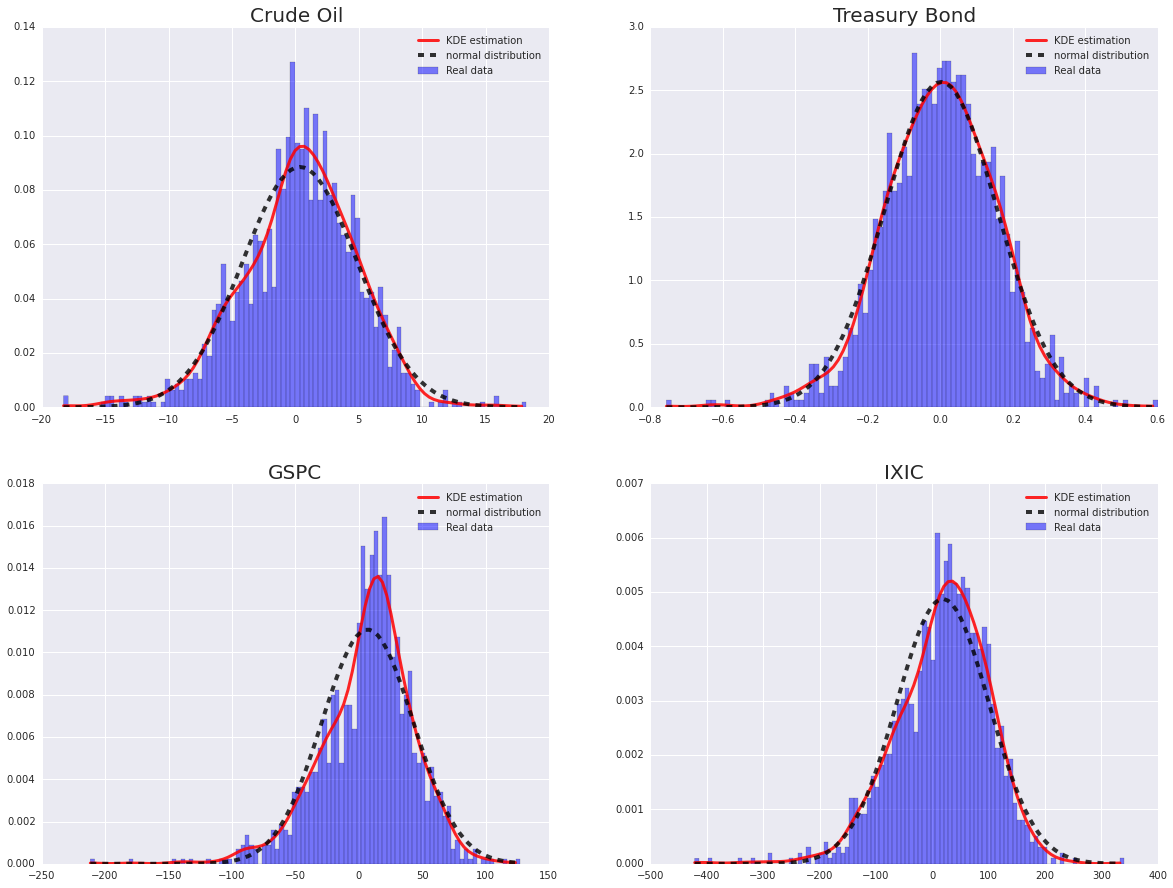

In [22]:
def plotDistribution(samples):
    vmin = min(samples)
    vmax = max(samples)
    stddev = np.std(samples)
    mu = np.mean(samples)
    
    domain = np.arange(vmin, vmax, (vmax-vmin)/100)
    
    # a simple heuristic to select bandwidth
    bandwidth = 1.06 * stddev * pow(len(samples), -.2)
    
    # estimate density
    kde = KDEUnivariate(samples)
    kde.fit(bw=bandwidth)
    density = kde.evaluate(domain)
    
    # plot
    plt.hist(samples,normed=1,bins=100,color='b',alpha = 0.5,label='Real data')
    plt.plot(domain, density,lw=3,color='r',alpha = 0.85, label= 'KDE estimation')
    plt.plot(domain,mlab.normpdf(domain, mu, stddev),'k--',alpha=0.8,label='normal distribution',lw=4)
    plt.legend()

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Crude Oil',fontsize=20)
plotDistribution(factorsReturns[0])
plt.subplot(2,2,2)
plt.title('Treasury Bond',fontsize=20)
plotDistribution(factorsReturns[1])
plt.subplot(2,2,3)
plt.title('GSPC',fontsize=20)
plotDistribution(factorsReturns[2])
plt.subplot(2,2,4)
plt.title('IXIC',fontsize=20)
plotDistribution(factorsReturns[3])
plt.show()

<div class="alert alert-warning">

I improve the image with histogram of original data. From this, we can clearly see that our KDE works really well. The approximation distribution is really close to the origin which will be easier for us to figure out kind of distribution

</div>

For the sake of simplicity, we can say that our smoothed versions of the returns of each factor can be represented quite well by a normal distribution. Of course, more exotic distributions, perhaps with fatter tails, could fit more closely the data, but it is outside the scope of this Notebook to proceed in this way.

Now, the simplest way to sample factors returns is to use a normal distribution for each of the factors, and sample from these distributions independently. However, this approach ignores the fact that market factors are often correlated. For example, when the price of crude oil is down, the price of treasury bonds is down too. We can check our data to verify about the correlation.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 6

#### Question 6.1
<div class="alert alert-info">

Calculate the correlation between market factors and explain the result.

</div>

<div class="label label-success">HINT</div> function `np.corrcoef` might be useful.

In [23]:
correlation = np.corrcoef(factorsReturns)
correlation

array([[ 1.        ,  0.38507954,  0.414966  ,  0.44278612],
       [ 0.38507954,  1.        ,  0.46210122,  0.49911941],
       [ 0.414966  ,  0.46210122,  1.        ,  0.92053356],
       [ 0.44278612,  0.49911941,  0.92053356,  1.        ]])

<div class="alert alert-warning">

The matrix shows the relation and dependence between 2 factors. 4 numbers on diagonals shows relation of the factor and itself so that is why they are equal 1. All 4 factor are somehow correlated, their correlation coefficient are positive. That means if one factor get larger, other factors also follow that trend.

<br><br> However, the last 2 factors are strongly correlated, coefficient is 0.92 over maximum of 1. This is actually normal, since they are 2 indices that discribe the trend of the market in that time. 
</div>

The multivariate normal distribution can help here by taking the correlation information between the factors into account. Each sample from a multivariate normal distribution can be thought of as a vector. Given values for all of the dimensions but one, the distribution of values along that dimension is normal. But, in their joint distribution, the variables are not independent.

For this use case, we can write:

$$
\left(\begin{array}{c}f_{1}\\f_{2}\\f_{3}\\f_{4} \end{array}\right)
\sim N 
\left[
  \left(
    \begin{array}{c}
      \mu_1\\ \mu_2 \\ \mu_3 \\ \mu_4 
    \end{array}
  \right), 
  \left(
    \begin{array}{cccc}
      \sigma^2_1 & \rho_{12} \sigma_1\sigma_2 & \rho_{13} \sigma_1\sigma_3 & \rho_{14} \sigma_1\sigma_4 \\ 
      \rho_{12}\sigma_2\sigma_1 & \sigma^2_2 & \rho_{23} \sigma_2\sigma_3 & \rho_{24} \sigma_2\sigma_4\\
      \rho_{13} \sigma_3\sigma_1 & \rho_{23} \sigma_3\sigma_2 & \sigma^2_3 & \rho_{34} \sigma_3\sigma_4 \\ 
      \rho_{14} \sigma_4\sigma_1 & \rho_{24} \sigma_4\sigma_2 & \rho_{34} \sigma_3\sigma_4 & \sigma_4^2 \\ 
    \end{array}
  \right)
\right]
$$

Or,

$$
f_t \sim N(\mu, \sum)
$$

Where $f_1$, $f_2$, $f_3$ and $f_4$ are the market factors, $\sigma_i$ is the standard deviation of factor $i$, $\mu$ is a vector of the empirical means of the returns of the factors and $\sum$ is the empirical covariance matrix of the returns of the factors.

The multivariate normal is parameterized with a mean along each dimension and a matrix describing the covariance between each pair of dimensions. When the covariance matrix is diagonal, the multivariate normal reduces to sampling along each dimension independently, but placing non-zero values in the off-diagonals helps capture the relationships between variables. Whenever having the mean of this multivariate normal distribution and its covariance matrix, we can generate the sample values for market factors.

Next, we will calculate the mean and the covariance matrix of this multivariate normal distribution from the historical data.


#### Question 6.2
<div class="alert alert-info">

Calculate the covariance matrix $\sum$ and the means $\mu$ of factors' returns then generate a random vector of factors return that follows a multivariate normal distribution $\sim N(\mu, \sum)$

</div>

<div class="label label-success">HINT</div>
Function `np.cov` can help calculating covariance matrix. Function `np.random.multivariate_normal(<mean>, <cov>)` is often used for generating samples.

In [24]:
factorCov = np.cov(factorsReturns)
factorMeans = [sum(x)/len(x) for x in factorsReturns]
sample = np.random.multivariate_normal(factorMeans,factorCov)
print(factorCov)
print(factorMeans)
print(sample)


[[  2.03712313e+01   2.70383097e-01   6.74442782e+01   1.63697774e+02]
 [  2.70383097e-01   2.42014227e-02   2.58869879e+00   6.36011613e+00]
 [  6.74442782e+01   2.58869879e+00   1.29672509e+03   2.71521187e+03]
 [  1.63697774e+02   6.36011613e+00   2.71521187e+03   6.70934736e+03]]
[0.35908880308880364, 0.0019722007722007863, 6.970339789189207, 18.737721800000003]
[  0.19951966   0.04374992   5.3927596   35.53195573]


### Step 3&4: Generating samples, running simulation and calculating the VaR

We define some functions that helps us calculating VaR 5%. You will see that the functions below are pretty complicated! This is why we provide a solution for you: however, study them well!!

The basic idea of calculating VaR 5% is that we need to find a value such that only 5% of the losses are bigger than it. That means the 5th percentile of the losses should be VaR 5%.

VaR can sometimes be problematic though, since it does give any information on the extent of the losses which can exceed the VaR estimate. CVar is an extension of VaR that is introduced to deal with this problem. Indeed, CVaR measures the expected value of the loss in those cases where VaR estimate has been exceeded.

In [61]:
def fivePercentVaR(trials):
    numTrials = trials.count()
    topLosses = trials.takeOrdered(max(round(numTrials/20.0), 1))
    return topLosses[-1]

# an extension of VaR
def fivePercentCVaR(trials):
    numTrials = trials.count()
    topLosses = trials.takeOrdered(max(round(numTrials/20.0), 1))
    return sum(topLosses)/len(topLosses)

def bootstrappedConfidenceInterval(
      trials, computeStatisticFunction,
      numResamples, pValue):
    stats = []
    for i in range(0, numResamples):
        resample = trials.sample(True, 1.0)
        stats.append(computeStatisticFunction(resample))
    stats = sorted(stats)
    lowerIndex = int(numResamples * pValue / 2 - 1)
    upperIndex = int(np.ceil(numResamples * (1 - pValue / 2)))
    return (stats[lowerIndex], stats[upperIndex])

<div class="alert alert-danger">
We have a critical error here, **sorted** function does not change input array but return new array. That means you need you assign to itself again. 
</div>

Next, we will run the Monte Carlo simulation 10,000 times, in parallel using Spark. Since your cluster has 12 cores (two Spark worker nodes, each with 6 cores), we can set `parallelism = 12` to dispatch simulation on these cores, across the two machines (remember, those are not really "physical machines", they are Docker containers running in our infrastructure).

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 7
<div class="alert alert-info">
Complete the code below to define the simulation process and calculate VaR 5%.
</div>

In [62]:
# RUN SILMULATION
def simulateTrialReturns(numTrials, factorMeans, factorCov, weights):
    trialReturns = []
    for i in range(0, numTrials):
        # generate sample of factors' returns
        trialFactorReturns = np.random.multivariate_normal(factorMeans,factorCov)
        
        # featurize the factors' returns
        trialFeatures = featurize(trialFactorReturns.tolist())
        
        # insert weight for intercept term
        trialFeatures.insert(0,1)
        
        trialTotalReturn = 0
        
        # calculate the return of each instrument
        # then calulate the total of return for this trial features
        trialTotalReturn = np.sum(np.dot(weights,trialFeatures))
        
        trialReturns.append(trialTotalReturn)
    return trialReturns


        
parallelism = 12
numTrials = 100000
trial_indexes = list(range(0, parallelism))
seedRDD = sc.parallelize(trial_indexes, parallelism)
bFactorWeights = sc.broadcast(weights)

trials = seedRDD.flatMap(lambda idx: \
                simulateTrialReturns(
                    max(int(numTrials/parallelism), 1), 
                    factorMeans, factorCov,
                    bFactorWeights.value
                ))
trials.cache()

valueAtRisk = fivePercentVaR(trials)
conditionalValueAtRisk = fivePercentCVaR(trials)

print("Value at Risk(VaR) 5%:", valueAtRisk)
print("Conditional Value at Risk(CVaR) 5%:", conditionalValueAtRisk)

Value at Risk(VaR) 5%: -19.4242266834
Conditional Value at Risk(CVaR) 5%: -24.8635779595


The value of VaR depends on how many invested stocks and the chosen distribution of random variables. Assume that we get VaR 5% = -2.66,  that means that there is a 0.05 probability that the portfolio will fall in value by more than \$2.66 over a two weeks' period if there is no trading. In other words, the loses are less than \$2.66 over two weeks' period with 95% confidence level. When a loss over two weeks is more than \$2.66, we call it **failure** (or **exception**). Informally, because of 5% probability, we expect that there are only $0.05*W$ failures out of total $W$ windows.

### Step 5: Evaluating the results using backtesting method
In general, the error in a Monte Carlo simulation should be proportional to 1/sqrt(n), where n is the number of trials. This means, for example, that quadrupling the number of trials should approximately cut the error in half. A good way to check the quality of a result is backtesting on historical data. Backtesting is a statistical procedure where actual losses are compared to the estimated VaR. For instance, if the confidence level used to calculate VaR is 95% (or VaR 5%), we expect only 5 failures over 100 two-week time windows.

The most common test of a VaR model is counting the number of VaR failures, i.e., in how many windows, the losses exceed VaR estimate. If the number of exceptions is less than selected confidence level would indicate, the VaR model overestimates the risk. On the contrary, if there are too many exceptions, the risk is underestimated. However, it's very hard to observe the amount of failures suggested by the confidence level exactly. Therefore, people try to study whether the number of failures is reasonable or not, or will the model be accepted or rejected.

One common test is Kupiec's proportion-of-failures (POF) test. This test considers how the portfolio performed at many historical time intervals and counts the number of times that the losses exceeded the VaR. The null hypothesis is that the VaR is reasonable, and a sufficiently extreme test statistic means that the VaR estimate does not accurately describe the data. The test statistic is computed as:

$$
-2ln\Bigg(\frac{(1-p)^{T-x}p^x}{(1-\frac{x}{T})^{T-x}(\frac{x}{T})^x}\Bigg)
$$

where:

$p$ is the quantile-of-loss of the VaR calculation (e.g., in VaR 5%, p=0.05),

$x$ (the number of failures) is the number of historical intervals over which the losses exceeded the VaR 

$T$ is  the total number of historical intervals considered

Or we can expand out the log for better numerical stability:

$$
\begin{equation}
-2\Big((T-x)ln(1-p)+x*ln(p)-(T-x)ln(1-\frac{x}{T})-x*ln(\frac{x}{T})\Big)
\end{equation}
$$

If we assume the null hypothesis that the VaR is reasonable, then this test statistic is drawn from a chi-squared distribution with a single degree of freedom. By using Chi-squared distribution, we can find the `p-value` accompanying our test statistic value.  If `p-value` exceeds the critical value of the Chi-squared distribution, we do have sufficient evidence to reject the null hypothesis that the model is reasonable. Or we can say, in that case, the model is considered as inaccurate.

For example, assume that we calculate VaR 5% (the confidence level of the VaR model is 95%) and get value VaR = 2.26. We also observed 50 exceptions over 500 time windows. Using the formula above, the test statistic `p-value` is calculated and equal to `8.08`. Compared to `3.84`, the critical value of Chi-squared distribution with one degree of freedom at probability 5%, the test statistic is larger. So, the model is rejected. The critical values of Chi-squared can be found by following [this link](https://people.richland.edu/james/lecture/m170/tbl-chi.html).
However, in this Notebook, it's not a good idea to find the corresponding critical value by looking in a "messy" table, especially when we need to change the confidence level. Instead, from `p-value`, we will calculate the probability of the test statistic in Chi-square thanks to some functions in package `scipy`. If the calculated probability is smaller than the quantile of loss (e.g, 0.05), the model is rejected and vice versa.


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 8

#### Question 8.1
<div class="alert alert-info">

Write a function to calculate the number of failures, that is when the losses (in the original data) exceed the VaR.

</div>

<div class="label label-success">HINT</div>
<ul>
  <li>First, we need to calculate the total loss in each 2-week time interval</li>
  <li>If the total loss of a time interval exceeds VaR, then we say that our VaR fails to estimate the risk in that time interval</li>
  <li>Return the number of failures</li>
</ul>  

<div class="label label-danger">NOTE</div> The loss is often having negative value, so, be careful when compare it to VaR.

In [27]:
def countFailures(stocksReturns, valueAtRisk):
    failures = 0
    # iterate over time intervals
    for i in range(0, len(stocksReturns[0])):
        # calculate the losses in each time interval
        loss = np.sum([x[i] for x in stocksReturns])
        
        # if the loss exceeds VaR
        if (loss<valueAtRisk):
            failures += 1
    return failures

In [28]:
len(stocksReturns)

28

#### Question 8.2
<div class="alert alert-info">

Write a function named `kupiecTestStatistic` to calculate the test statistic which was described in the above equation.

</div>

In [29]:
def kupiecTestStatistic(total, failures, confidenceLevel):
    failureRatio = failures/total
    logNumer = (total-failures)*np.log(1-confidenceLevel) + failures*np.log(confidenceLevel)
    logDenom = (total-failures)*np.log(1-failureRatio) + failures*np.log(failureRatio)
    return -2 * (logNumer - logDenom)
    
# test the function
assert (round(kupiecTestStatistic(250, 36, 0.1), 2) == 4.80), "function kupiecTestStatistic runs incorrectly"

Now we can find the p-value accompanying our test statistic value.

In [63]:
def kupiecTestPValue(stocksReturns, valueAtRisk, confidenceLevel):
    failures = countFailures(stocksReturns, valueAtRisk)
    print("num failures:", failures, 'over', len(stocksReturns[0]))
    if (failures ==0):
        failures = 1
    total = len(stocksReturns[0])
    testStatistic = kupiecTestStatistic(total, failures, confidenceLevel)
    #return 1 - stats.chi2.cdf(testStatistic, 1.0)
    return stats.chisqprob(testStatistic, 1.0)

varConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentVaR, 100, 0.05)
cvarConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentCVaR, 100, .05)
print("VaR confidence interval: " , varConfidenceInterval)
print("CVaR confidence interval: " , cvarConfidenceInterval)
print("Kupiec test p-value: " , kupiecTestPValue(stocksReturns, valueAtRisk, 0.05))

VaR confidence interval:  (-19.645555760440615, -19.162373946630115)
CVaR confidence interval:  (-25.030887544388658, -24.657905381858239)
num failures: 108 over 1295
Kupiec test p-value:  4.32481037907e-07


<div class="alert alert-warning">

When we want to find VaR with 95% confidence that means we have to be fail 50 over 1000 (5%) doing experiment. If we fail 0, that means our prediction is every far away from the true number. That means we jump into rare case of the distribution. It cannot be good. To fix this, we set value of failure = 1 when the model count as no failure (the test cannot work with count of failure = 0). 

<br><br>
However, there some limit, if your data is small, the true "number of failure" is close to 0 that make your p-value increase but that doesn't mean your model become better. :) 

</div>

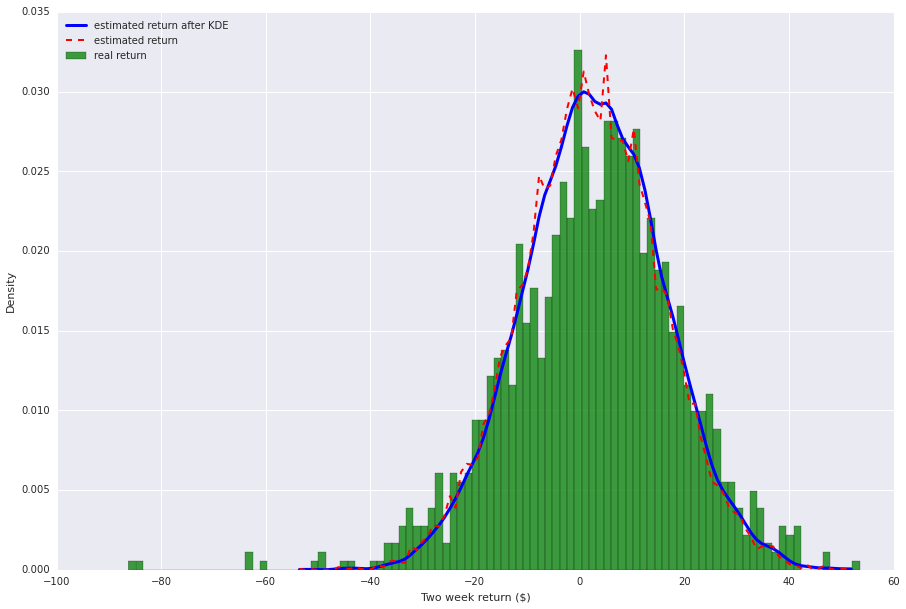

In [31]:
def ReturnOfAllStock(stocksReturns):
    loss = list()
    for i in range(0, len(stocksReturns[0])):
            loss.append(np.sum([x[i] for x in stocksReturns]))
    return loss
def VisualizeAfterModel(samples,stocksReturns):
    [vmin,vmax,stddev] = [min(samples),max(samples),np.std(samples)]
    domain = np.arange(vmin, vmax, (vmax-vmin)/100)
    bandwidth = 1.06 * stddev * pow(len(samples), -.2)
    
    # real loss
    loss = ReturnOfAllStock(stocksReturns)
    
    # estimate return from model
    es_return = plt.hist(samples,bins=100,normed=1)
    plt.clf()
    
    # estimate return using KDE
    kde = KDEUnivariate(samples)
    kde.fit(bw=bandwidth)
    density = kde.evaluate(domain)

    # plot
    plt.figure(figsize=(15,10))
    plt.plot(domain, density,'b-',linewidth=3, label="estimated return after KDE")
    plt.hist(loss,bins = 100,normed=1,label="real return",color='g',alpha=0.75)
    plt.plot(list(es_return[1][0:100]),list(es_return[0]),'r--',linewidth=2, label="estimated return")
    plt.xlabel("Two week return ($)")
    plt.ylabel("Density")
    plt.legend(loc=2)
    plt.show()
VisualizeAfterModel(trials.collect(),stocksReturns)

In [32]:
def Visualize2SampleDistribution(samples1,truesample,dist_name = ''):
    # estimate return from model
    es_return = plt.hist(samples1,bins=100,normed=1)
    plt.cla()
    # constraint the axis
    vmin = min(truesample)
    vmax = max(truesample)
    
    plt.xlim(vmin,vmax)
    # plot
    if (dist_name != ''):
        plt.title("Distribution of the real data and its estimation with " + dist_name + " distribution",fontsize = 20)
    plt.hist(truesample,bins = 100,normed=1,label="real data",color='b',alpha=0.6)
    plt.plot(list(es_return[1][0:100]),list(es_return[0]),'r--',linewidth=4, label="estimation")
    plt.xlabel("Two week return ($)")
    plt.ylabel("Density")
    plt.legend(loc=2)

In [33]:
def VisualALLSTOCK(numTrials,factorMeans,factorCov,stocksReturns,weights,functiona,dist_name,*arg):
    trialReturns = []
    for i in range(0, numTrials):
        # generate sample of factors' returns
        trialFactorReturns = functiona(factorMeans,factorCov,*arg)

        # featurize the factors' returns
        trialFeatures = featurize(trialFactorReturns.tolist())

        # insert weight for intercept term
        trialFeatures.insert(0,1)
        
        trialReturns.append(np.dot(weights,trialFeatures))
    predictions = pd.DataFrame(trialReturns)
    
    nCols = 3
    nRows = int(np.ceil(np.shape(predictions)[1]+2)/nCols)
    f , axarr = plt.subplots(nRows, nCols)
    f.set_figwidth(20)
    f.set_figheight(30)
    f.suptitle("Distribution of the real data and its estimation with " + dist_name + " distribution",fontsize = 20)
    for idx, stock in enumerate(stocksReturns):
        # Simulation
        # Plot
        i, j = divmod(idx, nCols)
        plt.axes(axarr[i, j])
        Visualize2SampleDistribution(predictions[idx],stock)
    plt.show()

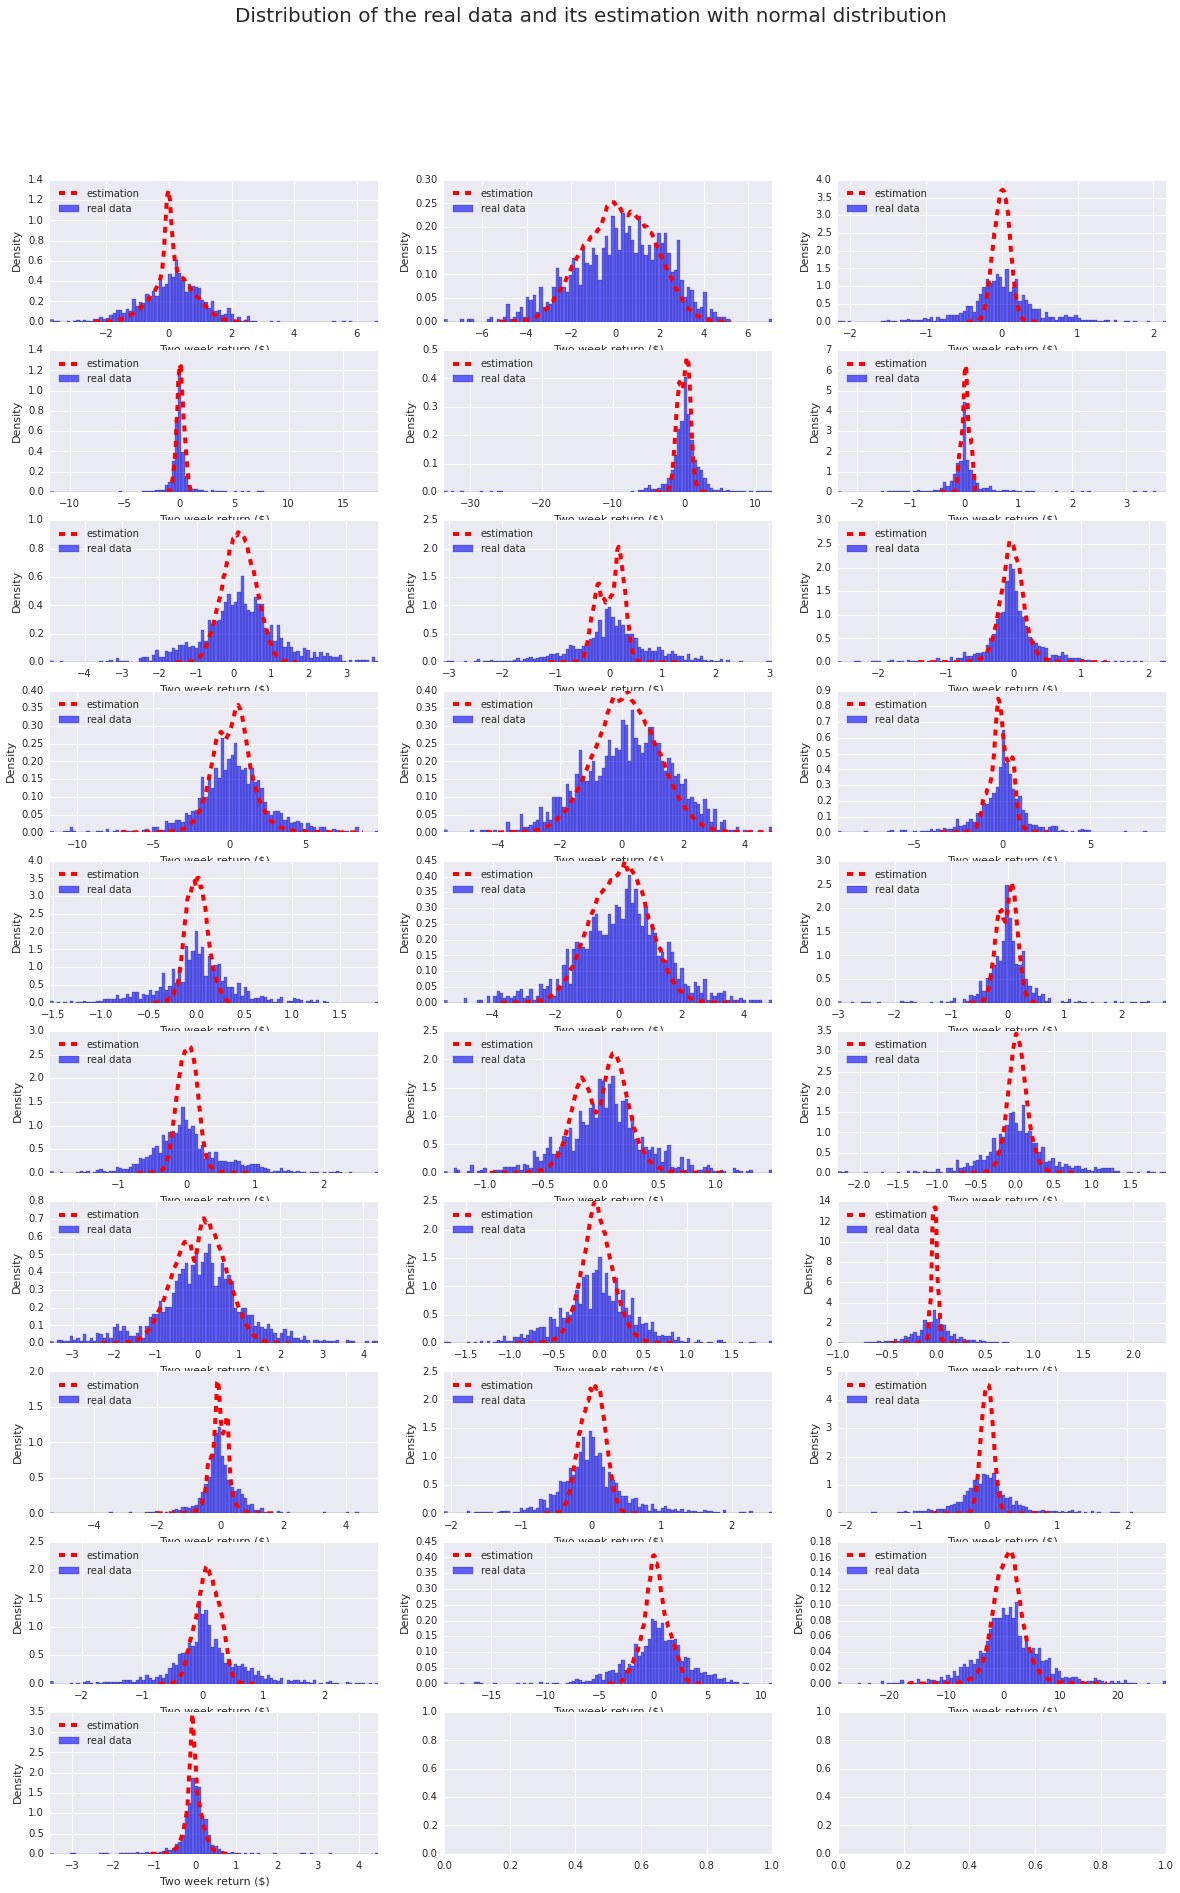

In [34]:
VisualALLSTOCK(150000,factorMeans,factorCov,stocksReturns,weights,np.random.multivariate_normal,'normal')

#### Question 8.3
<div class="alert alert-info">

Discuss the results you have obtained

</div>

<div class="alert alert-warning">
So failure percentage is not close to 5% at all. It will be right if failure is close to 130 ( we have 1295 testing samples). From Kupiec test p-value. It's way below 0.05. So our model is considered very bad. <br><br>

In addition, the figure above shows us the simulation on each stock of first 35 stocks. Some stocks is simulated well but there are some stocks which the linear model have problem when modeling it. From the red estimation line, we can observe that the real data have shorter in mean value and fatter in 2-tails
<br><br>
The first thought reasons for this failure:
<br><il>
<ul>1/ the the model of relations of factors and stocks, it can be quite simple to discribe the relations. We will use more factors and customize themodel
</ul><ul>
2/ samples for modeling factor is not drawn well, since we only approximate them with **normal distributions**</ul>
</il>
</div>

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 9
<div class="alert alert-info">
Assume that we invest in more than 100 stocks. Use the same market factors as for the previous questions to estimate VaR by running MCS, then validate your result.  

What is the main observation you have, once you answer this question? When you plan to invest in more instruments, how is your ability to predict the risk going to be affected?
</div>


In [35]:
def getRawStockData(size):
    # select path of all stock data files in "stock_folder"
    files = [join(stock_folder, f) for f in listdir(stock_folder) if isfile(join(stock_folder, f))]
    # assume that we invest only the first 35 stocks (for faster computation)
    files = files[:size]
    # read each line in each file, convert it into the format: (date, value)
    rawStocks = [process_stock_file(f) for f in files]
    number_of_years = 7
    rawStocks = list(filter(lambda instrument:((instrument[-1][0]-instrument[0][0]).days/365) > 7
                        , rawStocks))
    print("the number of stocks we invest is: ", len(rawStocks))
    return rawStocks

In [36]:
def simulateTrialReturns(numTrials, factorMeans, factorCov, weights, multivariate_func, *arg):
    trialReturns = []
    for i in range(0, numTrials):
        # generate sample of factors' returns
        [trialFactorReturns] = multivariate_func(factorMeans,factorCov,1,*arg)
        # featurize the factors' returns
        trialFeatures = featurize(list(trialFactorReturns))
        # insert weight for intercept term
        trialFeatures.insert(0,1)
        # calculate the return of each instrument
        trialTotalReturn = np.dot(weights,trialFeatures)
        # then calulate the total of return for this trial features
        trialTotalReturn = sum(trialTotalReturn)
        
        trialReturns.append(trialTotalReturn)
    return trialReturns

# OFFLINE VERSION
def MonteCarloGeneralEstimate(newStocksReturns,factorsReturns,numTrials,multivariate_func,*arg):
    # Estimate new weight for linear regression model
    param = FactorParameter(newStocksReturns,factorsReturnsfactorsReturns)
    
    newTrials = simulateTrialReturns(
                    numTrials, 
                    param[0], param[1],
                    param[2],multivariate_func,*arg)
    newValueAtRisk = fivePercentVaROff(newTrials)

    print("New Value at Risk(VaR) 5%:", newValueAtRisk)
    return [newTrials,newValueAtRisk]

In [37]:
def FactorParameter(stocksReturns,factorsReturns):
    # Cov and Mean
    factorCov = np.cov(factorsReturns)
    factorMeans = [sum(x)/len(x) for x in factorsReturns]
    
    # transpose factorsReturns
    factorMat = transpose(factorsReturns)
    # featurize each row of factorMat
    factorFeatures = list(map(featurize,factorMat))
    # OLS require parameter is a numpy array
    factor_columns = np.array(factorFeatures)
    #add a constant - the intercept term for each instrument i.
    factor_columns = sm.add_constant(factor_columns, prepend=True)
    # Estimate new weight for linear regression model
    weights = [estimateParams(stockReturns,factor_columns) for stockReturns in stocksReturns]
    return [factorMeans,factorCov,weights]

def MonteCarloGeneralEstimate(newStocksReturns,factorsReturns,numTrials,multivariate_func,*arg):
    # Estimate new weight for linear regression model
    param = FactorParameter(newStocksReturns,factorsReturns)
    
    #Spark parallel
    parallelism = 12
    trial_indexes = list(range(0, parallelism))
    seedRDD = sc.parallelize(trial_indexes, parallelism)
    bNewFactorWeights = sc.broadcast(param[2])
    
    # Simulation
    newTrials = seedRDD.flatMap(lambda idx: simulateTrialReturns(
                    max(int(numTrials / parallelism), 1),
                    param[0], param[1],
                    bNewFactorWeights.value,multivariate_func,*arg))
    newTrials.cache()
    
    newValueAtRisk = fivePercentVaR(newTrials)
    newConditionalValueAtRisk = fivePercentCVaR(newTrials)

    print("New Value at Risk(VaR) 5%:", newValueAtRisk)
    print ("New Conditional Value at Risk(CVaR) 5%:", newConditionalValueAtRisk)
    return [newTrials,newValueAtRisk]
    

In [38]:
def multivariate_normal(factorMeans,factorCov,n,*arg):
    return [np.random.multivariate_normal(factorMeans,factorCov)]

def fivePercentVaROff(newTrials):
    newTrials.sort(key=lambda x: x)
    return newTrials[round(len(newTrials)/20)]

In [39]:
def HyTestMonteCarlo(trials,stocksReturns,valueAtRisk):
    #varConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentVaR, 100, 0.05)
    #cvarConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentCVaR, 100, .05)
    #print("VaR confidence interval: " , varConfidenceInterval)
    #print("CVaR confidence interval: " , cvarConfidenceInterval)
    print("Kupiec test p-value: " , kupiecTestPValue(stocksReturns, valueAtRisk, 0.05))

In [46]:
newrawStocks = getRawStockData(200)
newStocks = list(map(lambda newStock: fillInHistory_fix(trimToRegion(newStock, start, end)
                ,start, end), newrawStocks))

the number of stocks we invest is:  135


In [47]:
newStocksReturns = list(map(twoWeekReturns, newStocks))

In [48]:
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(newStocksReturns,factorsReturns,100000,multivariate_normal)
HyTestMonteCarlo(newTrials.collect(),newStocksReturns,newValueAtRisk)

(1295, 13)
New Value at Risk(VaR) 5%: -689.169867107
New Conditional Value at Risk(CVaR) 5%: -1109.23992071
num failures: 207 over 1295
Kupiec test p-value:  2.07150662378e-48


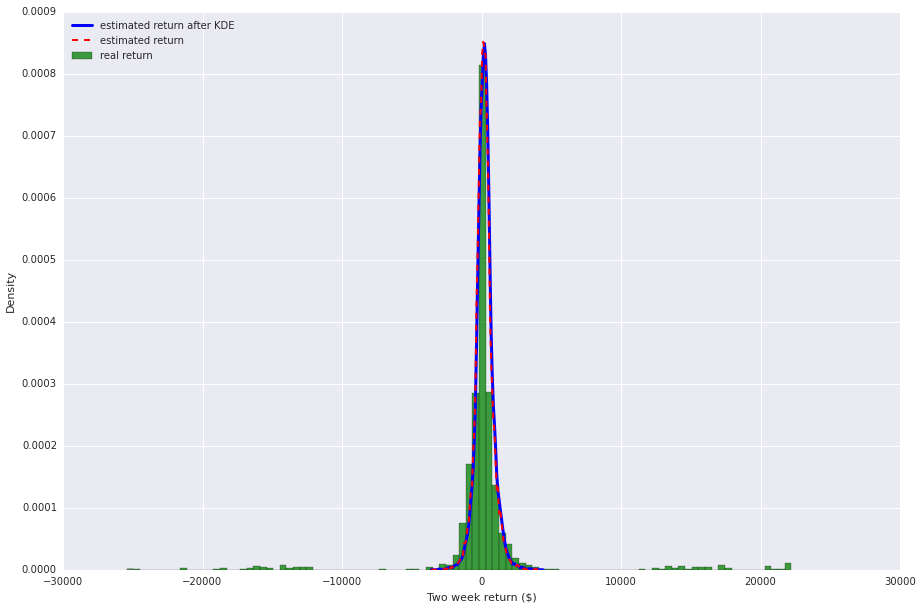

In [70]:
VisualizeAfterModel(newTrials.collect(),newStocksReturns)

<div class="alert alert-warning">
Increasing the number of stocks invested make the result worse. it seems reasonable that more stock we invest, the more value at risk increases. But if we notice, there are some critical value return around -200.000 and 200.000. Something is not right in this case. So let do some statistic on that.
</div>

In [102]:
print("MAXIMUM return on each stock: ")
np.set_printoptions(precision=3,suppress=True)
print(np.sort(np.max(newStocksReturns,axis=1))[::-1])
print("MINIMUM return on each stock: ")
print(np.sort(np.min(newStocksReturns,axis=1)))

MAXIMUM return on each stock: 
[ 22873.469     81.22      29.98      28.58      22.62      18.53      18.23
     15.99      14.35      13.85      13.63      13.46      13.14      12.33
     12.25      12.18      11.05      10.94      10.79       9.79       9.57
      9.46       9.3        9.18       8.9        8.37       8.29       8.01
      7.76       7.73       7.58       7.46       7.43       7.26       7.11
      7.04       6.7        6.67       6.02       5.85       5.78       5.5
      5.43       5.4        5.4        5.2        5.17       5.14       5.11
      5.04       4.97       4.92       4.91       4.88       4.85       4.76
      4.64       4.48       4.36       4.35       4.35       4.31       4.15
      4.12       4.1        4.03       3.97       3.87       3.85       3.75
      3.74       3.7        3.61       3.59       3.56       3.49       3.41
      3.37       3.3        3.26       3.25       3.23       3.22       3.16
      3.07       3.06       2.95       2.9    

<div class="alert alert-warning">
It seems there is something wrong with data of the stock. There is exist a stock which have very high risk return (-25500 loss in 10 days) compared with other stocks (around -50 loss in 10 days). It changes the behavior of all stock return value. <br><br>
In my opinion, we should not invest to those stocks which has very risk. 
</div>

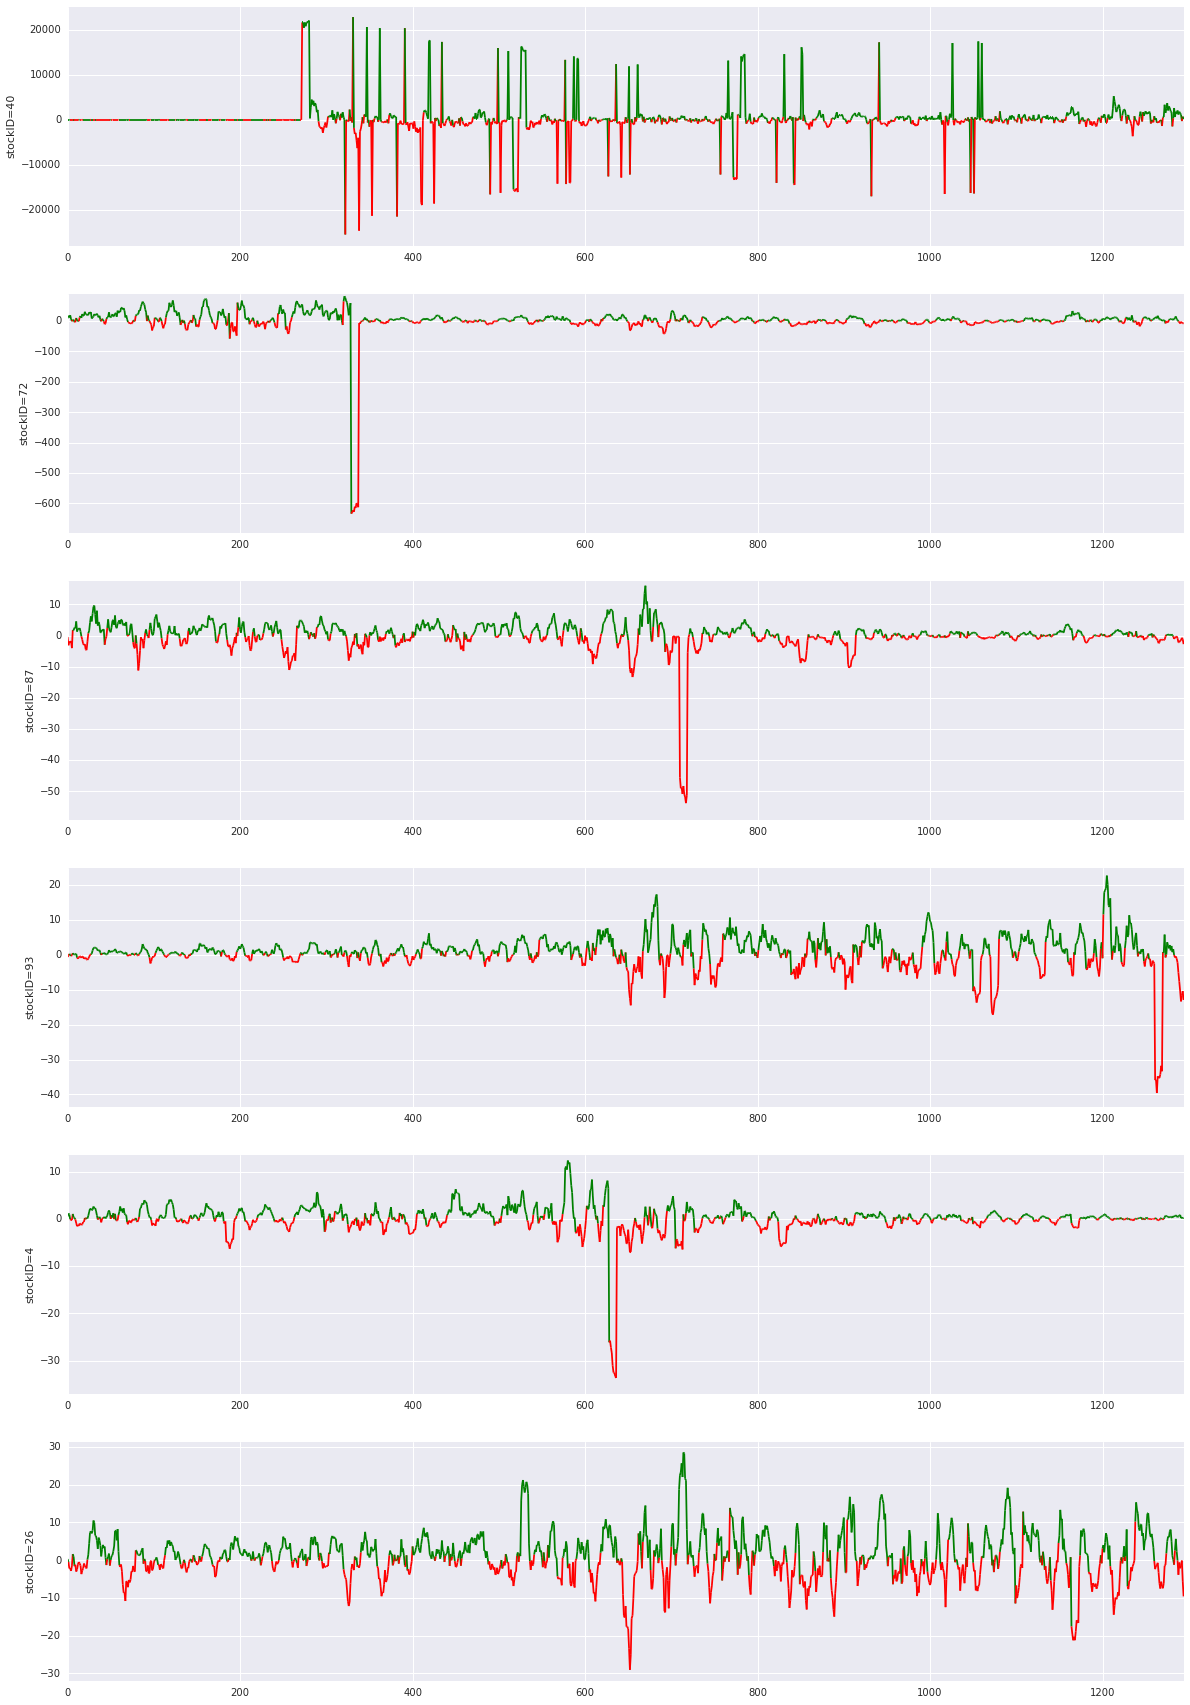

In [119]:
riskylist = np.argsort(np.min(newStocksReturns,axis=1))[0:6]
nRiskyList = len(riskylist)
plt.figure(figsize=(20,30))
for idx,stock in enumerate(riskylist):
    data = newStocksReturns[stock]
    ax=plt.subplot(nRiskyList,1,idx+1)
    threshold_plot(ax,np.arange(len(data)),np.array(data),0,'r','g')
    ax.set_ylabel('stockID='+str(stock))

<div class="alert alert-warning">
I list first 6 stocks have highest risk, it seems only first fluctuate dramatically. It will be better if we don't play that stock. So our strategy is remove the stock that has number of times defined loss greater than threshold. It will avoid the first case
</div>

<div class="alert bg-primary" style="background-color: rgba(4,229,120,0.8)">

<h2> REMOVE HIGH RISK STOCK </h2>
</div>

In [90]:
def RemoveRiskStock(newStocksReturns,lowerbound,upperbound,threshold):
    stock_minreturn = [len(np.where(np.asarray(x)<lowerbound)[0]) for x in newStocksReturns]
    newLowRiskStocksReturns = [newStocksReturns[j] for j, 
                               i in enumerate(stock_minreturn) if i <threshold]
    stock_maxreturn = [len(np.where(np.asarray(x)>upperbound)[0]) for x in newLowRiskStocksReturns]
    newLowRiskStocksReturns = [newLowRiskStocksReturns[j] for j, 
                               i in enumerate(stock_maxreturn) if i <threshold]
    return newLowRiskStocksReturns

In [147]:
newLowRiskStocksReturns = RemoveRiskStock(newStocksReturns,-80,100,8)
print("the number of stock included risky stock is",len(newStocksReturns))
print("the number of stock we invest now is",len(newLowRiskStocksReturns))

the number of stock included risky stock is 135
the number of stock we invest now is 133


In [148]:
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(newLowRiskStocksReturns,factorsReturns,100000,multivariate_normal)
HyTestMonteCarlo(newTrials.collect(),newLowRiskStocksReturns,newValueAtRisk)

New Value at Risk(VaR) 5%: -82.9670614753
New Conditional Value at Risk(CVaR) 5%: -106.30931581
num failures: 83 over 1295
Kupiec test p-value:  0.0254791443177


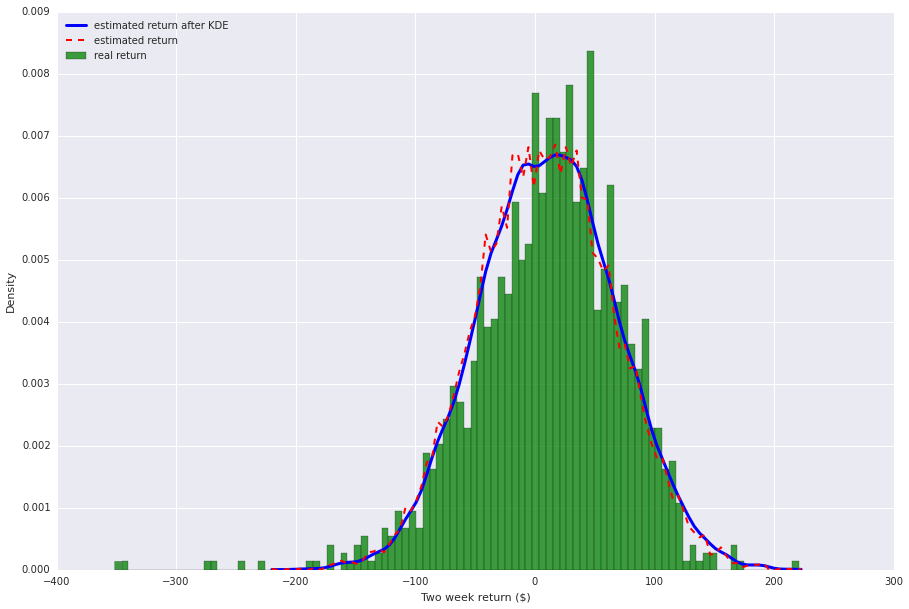

In [150]:
VisualizeAfterModel(newTrials.collect(),newLowRiskStocksReturns)

<div class="alert alert-warning">
The result now is better after we remove some risky stock. Anyway, it still keeps the charasteristic that more stock we play more risk we encounter. In addition, the distribution of our estimation still failed on 2 tails, specially on the left tail
</div>

<div class="alert bg-primary" style="background-color: rgba(4,229,120,0.8)">

<h2> Kolmogorov-Smirnoff Testing + Q-Q plot for visualization </h2>
</div>

The goal of the Monte Carlo simulation that we want to simulate correctly the distribution of the stock return. Then VaR is conducted from simulation distribution. So if we can test the distribution of simulation match with distribution of real data. So we have more confidence to believe VaR from estimation model. 

In addition, we can use it for testing whether the distribution of factor is the prior distribution that we imply before we apply it into regression model. 

Comprehensive Reference I recommend :) : http://www.physics.csbsju.edu/stats/KS-test.html

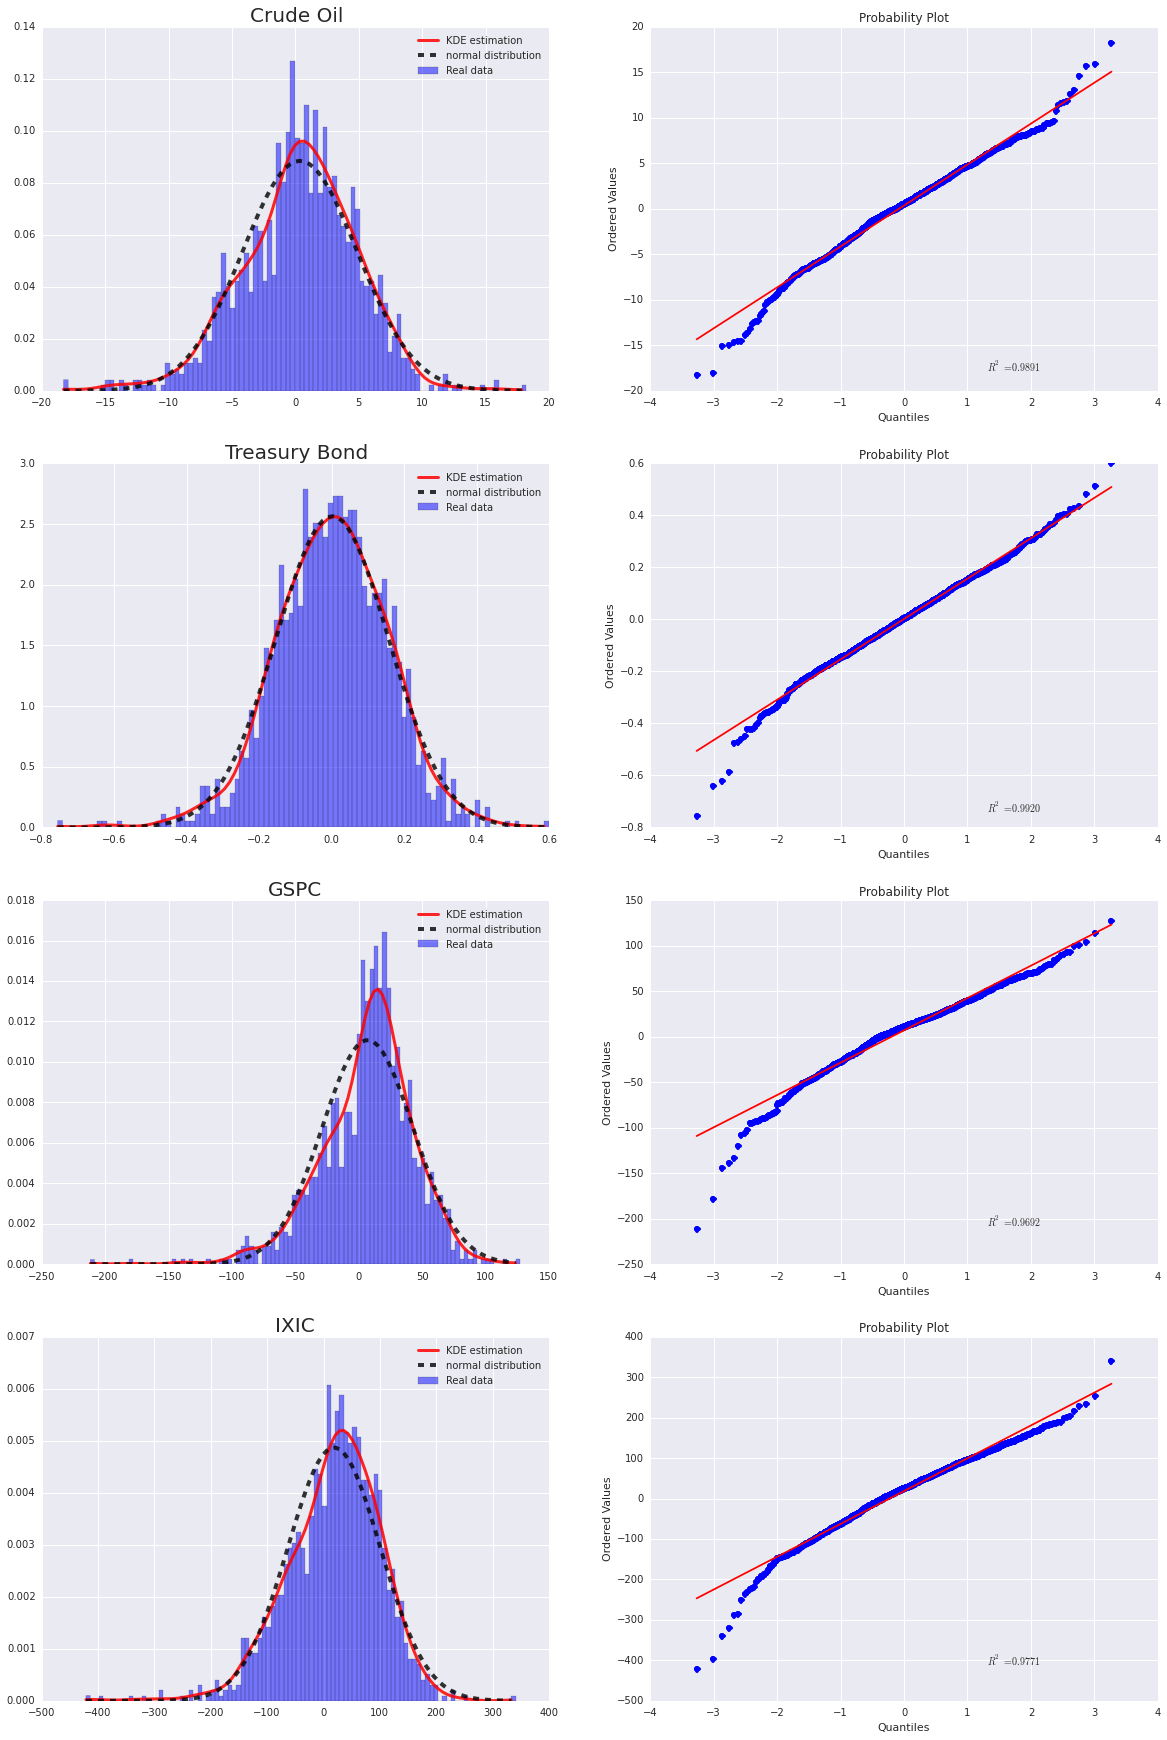

In [151]:
plt.figure(figsize=(20,30))
plt.subplot(4,2,1)
plt.title('Crude Oil',fontsize=20)
plotDistribution(factorsReturns[0])
plt.subplot(4,2,2)
stats.probplot(factorsReturns[0],dist='norm',plot=plt)
plt.subplot(4,2,3)
plt.title('Treasury Bond',fontsize=20)
plotDistribution(factorsReturns[1])
plt.subplot(4,2,4)
stats.probplot(factorsReturns[1],dist='norm',plot=plt)
plt.subplot(4,2,5)
plt.title('GSPC',fontsize=20)
plotDistribution(factorsReturns[2])
plt.subplot(4,2,6)
stats.probplot(factorsReturns[2],dist='norm',plot=plt)
plt.subplot(4,2,7)
plt.title('IXIC',fontsize=20)
plotDistribution(factorsReturns[3])
plt.subplot(4,2,8)
stats.probplot(factorsReturns[3],dist='norm',plot=plt)
plt.show()

In [187]:
def KStestNormal(data):
    return stats.ks_2samp(data,stats.norm.rvs(np.mean(data), np.std(data), 100000))

print("TESTING WHETHER 4 FACTORS DISTRIBUTION IS NORMAL OR NOT")
print("Oil:      p-value=", KStestNormal(factorsReturns[0])[1])
print("Treasury: p-value=", KStestNormal(factorsReturns[1])[1])
print("GSPC:     p-value=", KStestNormal(factorsReturns[2])[1])
print("IXIC:     p-value=", KStestNormal(factorsReturns[3])[1])

TESTING WHETHER 4 FACTORS DISTRIBUTION IS NORMAL OR NOT
Oil:      p-value= 0.00692465204207
Treasury: p-value= 0.706465148996
GSPC:     p-value= 1.4315566657e-06
IXIC:     p-value= 0.010487817197


<div class="alert alert-warning">

From the graph, it is quite clear that the Treasury Distribution is normal because KDE line match concretely with normal distribtion line. And the result from the test is quite good for treasury distribution 
<br><br>
Using the normal to represent oil or IXIC distribution is not really good. However, GSPC distribution is far away from normal distribution with testing result. That means we should find better distribution to present it later.
<br><br>
Q-Q plot is a graphical method to determinine if 2 dataset come from same distribution or not. So if 2 set have similar distribution, the plot will be approximately along the red line. In addition, we can see which part of the data is not have same distribution. As you can see from Q-Q plot, the normal distribution does not mirror well at the tail. That is the important evidence why finance data follow fat-tailed distribution.   
</div>

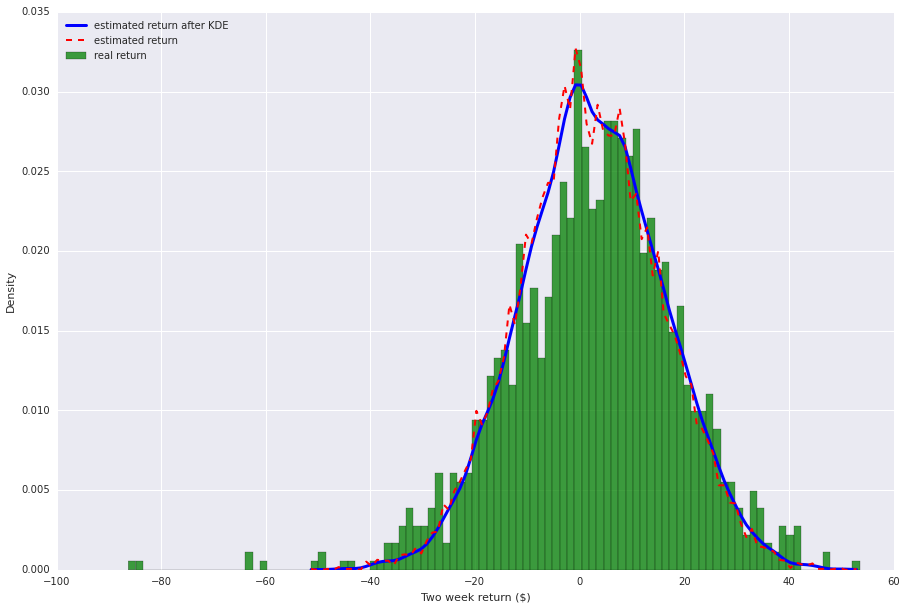

In [153]:
plt.figure
VisualizeAfterModel(trials.collect(),stocksReturns)

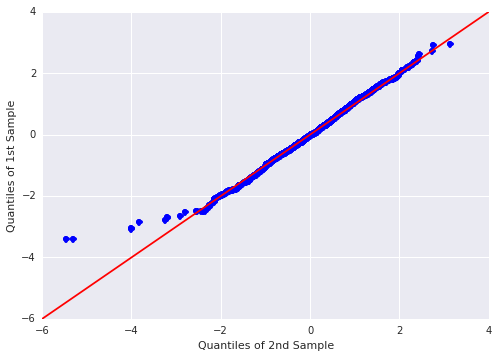

In [154]:
pp_y = sm.ProbPlot(np.array(ReturnOfAllStock(stocksReturns)),fit=True)
pp_x = sm.ProbPlot(np.array(trials.collect())[0:len(np.array(ReturnOfAllStock(stocksReturns)))],fit=True)
fig = pp_x.qqplot(line='45',other=pp_y)
plt.show()

In [155]:
allStocksReturn = ReturnOfAllStock(stocksReturns)
print("Stocks Return from real data vs from our simulation: p-value=", 
      stats.ks_2samp(trials.collect(),allStocksReturn)[1])

Stocks Return from real data vs from our simulation: p-value= 0.012266596988


<div class="alert alert-warning">

The q-q graph above shows that our total stock return is quite similar with normal distribution at the mean but considerably different in 2 tail, especially in left tail, how large distance from the blue point to the light, it shows how bad the result is obtained. It is similar with the comment we mentioned above that we need to find a way to correct the tail-mismatching problem

</div>

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 10
<div class="alert alert-info">

In the previous questions, we used the normal distributions to sample the factors returns.  

Try to study how results vary when selecting other probability distributions: our goal is to improve the result of our MCS.
</div>

## Independent Sampling

Now I tried to sample market factors without corellation information between them to see how worse it will

In [156]:
def getIndependentCovMatrix(factorCov):
    indepenetFactorFov = [[0]*4 for i in range(0,4)]
    for i in range(4):
        indepenetFactorFov[i][i] = factorCov[i][i]
    return indepenetFactorFov
print(*('[{0:.4f}  {1:.4f}  {2:.4f}  {3:.4f}]'.format(*r) for r in getIndependentCovMatrix(factorCov)), sep='\n')

[20.3712  0.0000  0.0000  0.0000]
[0.0000  0.0242  0.0000  0.0000]
[0.0000  0.0000  1296.7251  0.0000]
[0.0000  0.0000  0.0000  6709.3474]


New Value at Risk(VaR) 5%: -14.5517343542
New Conditional Value at Risk(CVaR) 5%: -18.5076755911
num failures: 180 over 1295
Kupiec test p-value:  3.29701790747e-34


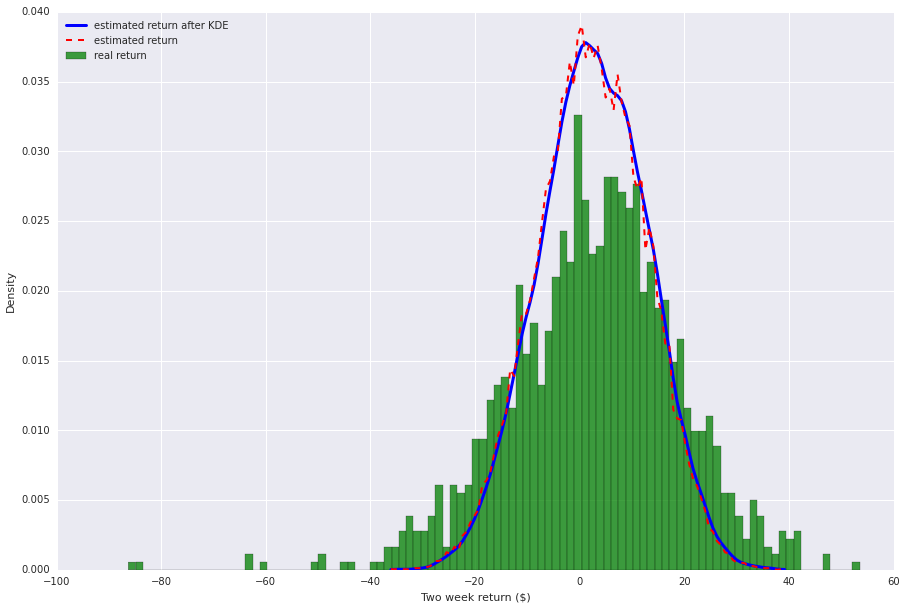

In [160]:
def MonteCarloRemoveDependentEstimate(newStocksReturns,factorsReturns,numTrials,multivariate_func,*arg):
    # Estimate new weight for linear regression model
    param = FactorParameter(newStocksReturns,factorsReturns)
    
    parallelism = 12
    trial_indexes = list(range(0, parallelism))
    seedRDD = sc.parallelize(trial_indexes, parallelism)
    bNewFactorWeights = sc.broadcast(param[2])
    
    # Simulation
    newTrials = seedRDD.flatMap(lambda idx: simulateTrialReturns(
                    max(int(numTrials / parallelism), 1),
                    param[0], getIndependentCovMatrix(param[1]),
                    bNewFactorWeights.value,multivariate_func,*arg))
    newTrials.cache()
    
    newValueAtRisk = fivePercentVaR(newTrials)
    newConditionalValueAtRisk = fivePercentCVaR(newTrials)

    print("New Value at Risk(VaR) 5%:", newValueAtRisk)
    print ("New Conditional Value at Risk(CVaR) 5%:", newConditionalValueAtRisk)
    return [newTrials,newValueAtRisk]

[newTrials,newValueAtRisk] = MonteCarloRemoveDependentEstimate(stocksReturns, factorsReturns,200000,multivariate_normal)
HyTestMonteCarlo(newTrials.collect(),stocksReturns,newValueAtRisk)
VisualizeAfterModel(newTrials.collect(),stocksReturns) 

<div class="alert alert-warning">

The results are worse, that means the correlation of factors are really important. From the graph, you can see the simulation distribution is seperately different with real data. That is quite the result is worse than one with taking count of correlation of factors

</div>

<div class="alert bg-primary" style="background-color: rgba(252,51,47,1)">

<h2>Finding good distribution for factors</h2>
</div>
<div class="alert alert-info">Usually, financial risk is mirrored by a distribution with fatter tails. From the distribution section, we already saw that normal distribution does not do well for these factors. That affects to our regression model. A list below contains over 70 popular distribution. We will try to find out which one is good for our factors </div>


![](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)

In [150]:
# all support distribution
dist_names = [ 'alpha', 'beta', 'betaprime', 'burr', 'chi', 'chi2', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 
              'fatiguelife', 'fisk', 'genlogistic', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma',
              'gompertz', 'gumbel_r', 'gumbel_l', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 
              'ksone', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 
              'nakagami', 'norm', 'pareto', 'pearson3', 'powerlognorm', 'powernorm', 'reciprocal', 'rayleigh', 
              'rice', 'recipinvgauss', 't',  'tukeylambda', 'wald', 'weibull_min']

<div class="alert alert-warning">
I already chose good distribution for representing stock return from nearly 100 distributions which are supported by scipy by looking the shape of each distribution **manually** to reduce workload of finding good distribution.
</div>

In [151]:
def VisualizeKGoodDistribution(samples,dist_names):
    vmin = min(samples)
    vmax = max(samples)
    stddev = np.std(samples)
    mu = np.mean(samples)
    domain = np.arange(vmin, vmax, (vmax-vmin)/100)
    
    # a simple heuristic to select bandwidth
    bandwidth = 1.06 * stddev * pow(len(samples), -.2) 
    
    # estimate density
    kde = KDEUnivariate(samples)
    kde.fit(bw=bandwidth)
    density = kde.evaluate(domain) 
    
    # plot
    plt.figure(figsize=(20,10))
    plt.plot(domain, density,'r--',lw=5,alpha = 0.85, label= 'KDE estimation')

    for dist_name in dist_names:
        # get distribution
        dist = getattr(stats, dist_name)
        
        # finding the best parameter
        param = dist.fit(samples)
        # retrieve data from pdf function and plot
        pdf_fitted = dist.pdf(domain, *param[:-2], loc=param[-2], scale=param[-1])
        plt.plot(domain,pdf_fitted, label=dist_name,lw=3)
        
    plt.legend(loc='upper right')
    plt.show()

In [148]:
# Find the best distribution
def FindGoodDistribution(samples,dist_names,topk):
    pvalueList = list()
    for dist_name in dist_names:
        # get distribution
        dist = getattr(stats, dist_name)
        
        # find parameter
        param = dist.fit(samples)
        # sample from distribution
        estimateSamples = dist.rvs(*param,size=10000)
        
        # do KS test
        pvalueList.append([dist_name,stats.ks_2samp(samples,estimateSamples)[1]])
        # sort by p-value
        pvalueList.sort(key=lambda x: -x[1])
    return pvalueList[:topk]

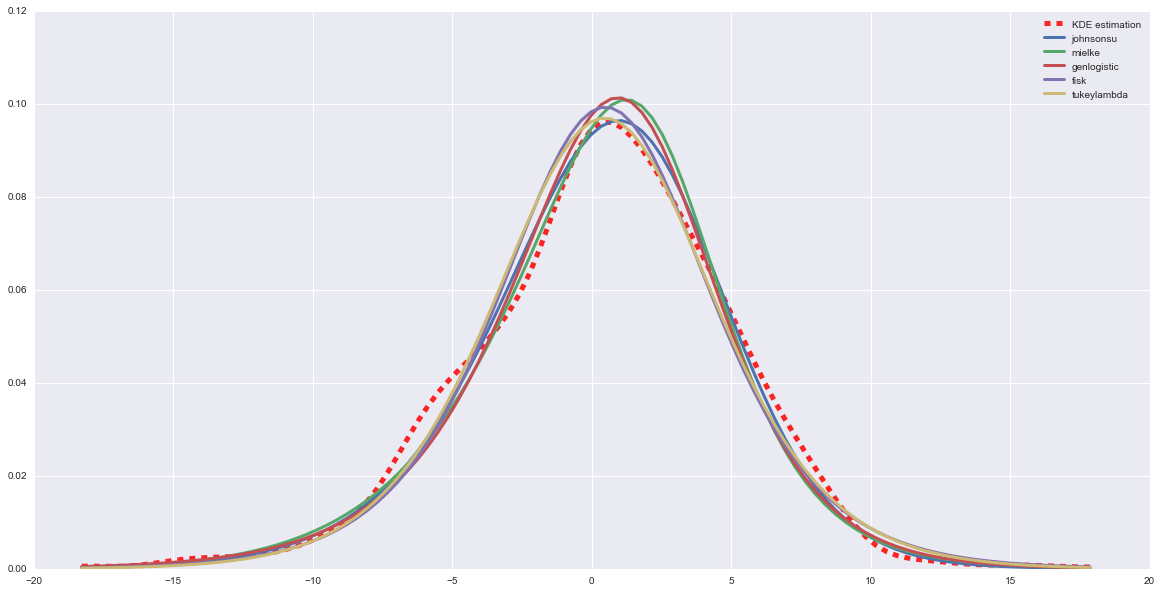

In [38]:
topPvalueList = FindGoodDistribution(factorsReturns[0],dist_names,10)
print(topPvalueList)
VisualizeKGoodDistribution(factorsReturns[0],[i[0] for i in topPvalueList][:5])

[['t', 0.96867067842097965], ['gengamma', 0.92909216329800004], ['johnsonsu', 0.85849630179438818], ['fisk', 0.84921398491626221], ['rice', 0.83496638633887155], ['pearson3', 0.82292950976235546], ['exponweib', 0.81175990025485079], ['powernorm', 0.80486546641703194], ['norm', 0.75656736212445985], ['rdist', 0.75325905750656208]]


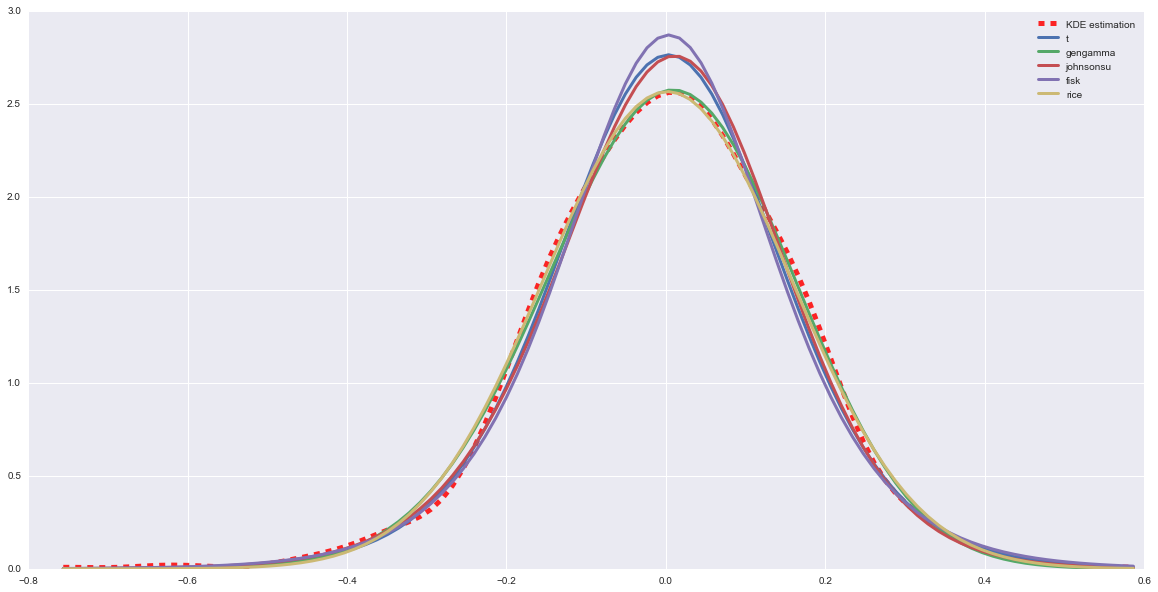

In [39]:
topPvalueList = FindGoodDistribution(factorsReturns[1],dist_names,10)
print(topPvalueList)
VisualizeKGoodDistribution(factorsReturns[1],[i[0] for i in topPvalueList][:5])

[['genlogistic', 0.58061644654646316], ['johnsonsu', 0.30929207133835596], ['hypsecant', 0.13975832434170984], ['loggamma', 0.055178408894736998], ['tukeylambda', 0.050594672140156421], ['logistic', 0.018980541248251912], ['t', 0.014148790784733236], ['johnsonsb', 0.011837208136446915], ['powernorm', 0.0087839570692493079], ['pearson3', 0.006033694794340491]]


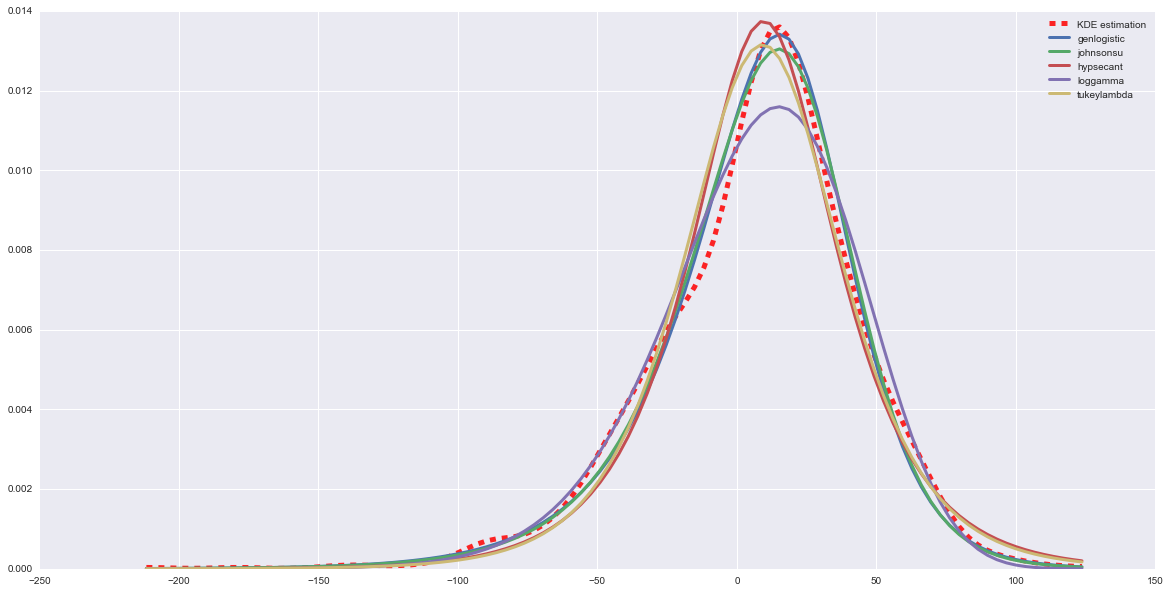

In [40]:
topPvalueList = FindGoodDistribution(factorsReturns[2],dist_names,10)
print(topPvalueList)
VisualizeKGoodDistribution(factorsReturns[2],[i[0] for i in topPvalueList][:5])

[['loggamma', 0.86405522443062988], ['powernorm', 0.84077339457467992], ['johnsonsu', 0.58268630660617038], ['genlogistic', 0.43525270554606171], ['tukeylambda', 0.35700014001988767], ['t', 0.34853665663372219], ['johnsonsb', 0.31084378269665935], ['pearson3', 0.30617403327143067], ['beta', 0.25152300181261011], ['logistic', 0.17268167533777032]]


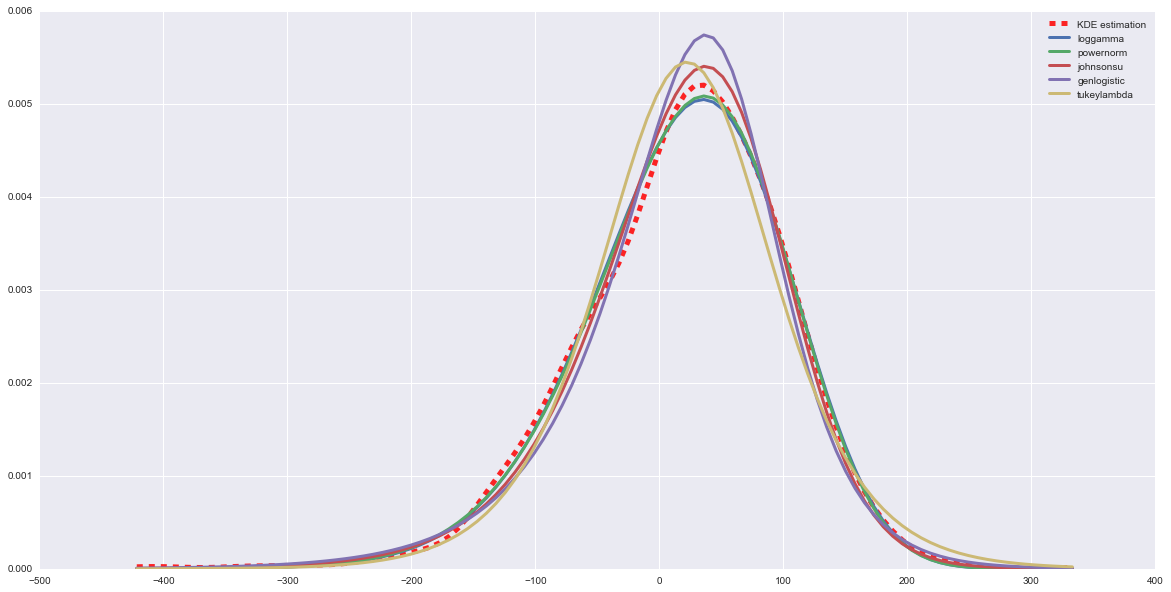

In [41]:
topPvalueList = FindGoodDistribution(factorsReturns[3],dist_names,10)
print(topPvalueList)
VisualizeKGoodDistribution(factorsReturns[3],[i[0] for i in topPvalueList][:5])

![p-value of good distribtion for each factors](https://raw.githubusercontent.com/thanthanhan93/ImageForNotebook/master/AML%20lab7%2B8/statistic.png)

<div class="alert alert-warning">

From the result, we can conclude that there is exist a distribution that match with our data. Now the probem is risen, we cannot sample each factor seperately because there is correlated between them. But it is hard to sample from multivariate multiple distribution (each of factor belongs different distribution). 
<br><br>
Instead, I use the distribution that represent well enough for 4 factors. From the table, above we can there some distribution appear in almost 4 tables. That includes "t-distribution", "johnson su-distribution, "generalized logistic-distribution", "Tukey-lambda distribution", "power normal-distribution"
</div>

<div class="alert bg-primary" style="background-color: rgba(252,51,47,1)">

<h2>Multivariate T-distribution - Market Factors</h2>
</div>

In [44]:
#written by Enzo Michelangeli, style changes by josef-pktd
# Student's T random variable
def multivariate_t_rvs(m, S, n=1, df=np.inf):
    '''generate random variables of multivariate t distribution
    Parameters
    ----------
    m : array_like
        mean of random variable, length determines dimension of random variable
    S : array_like
        square array of covariance  matrix
    df : int or float
        degrees of freedom
    n : int
        number of observations, return random array will be (n, len(m))
    Returns
    -------
    rvs : ndarray, (n, len(m))
        each row is an independent draw of a multivariate t distributed
        random variable
    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n)/df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]   # same output format as random.multivariate_normal

def FindParameterDistribution(samples,dist_name):
    dist = getattr(stats, dist_name)
    # find parameter
    param = dist.fit(samples)
    return param  

In [162]:
bestParameterT = list()
for i in range(0,4):
    bestParameterT.append(FindParameterDistribution(factorsReturns[i],'t'))

df_bpTdistribution = pd.DataFrame(bestParameterT,columns=['df','mean','variance'])
df_bpTdistribution['label'] = ['Oil','Treasury','GSPCS','IXIC']
df_bpTdistribution = df_bpTdistribution.set_index('label')
df_bpTdistribution.index.name = None
df_bpTdistribution

df       mean   variance
Oil       10.656789   0.452628   4.065795
Treasury  11.614783   0.003343   0.141282
GSPCS      6.252367   9.007935  29.746860
IXIC       9.410982  21.807284  72.367864

<div class="alert alert-warning">

In this session, I used the multivariate t-distribution to sample market factor, t-distrubtion is fat-tail or heavy tail distribution, it is widely used in finance to represent the stock return. <br><br>

The table above shows you optimized parameter for each factors. As you can see, degree of freedoom of each factors are different. But we can only use 1 df for our multivariate model. We will show how to find optimize later. I will use df = 6 for this experiment

</div>

In [267]:
[newTrials,newValueAtRisk] =  MonteCarloGeneralEstimate(stocksReturns,factorsReturns,200000,multivariate_t_rvs,6)
HyTestMonteCarlo(newTrials,stocksReturns,newValueAtRisk)

New Value at Risk(VaR) 5%: -24.4812135527
New Conditional Value at Risk(CVaR) 5%: -35.8823752266
num failures: 61 over 1295
Kupiec test p-value:  0.629367855656


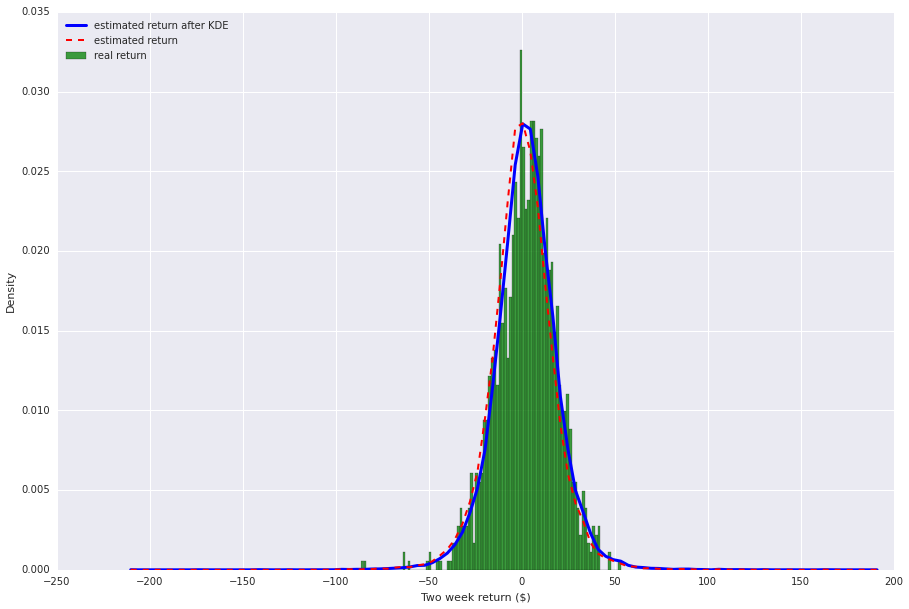

In [268]:
VisualizeAfterModel(newTrials.collect(),stocksReturns)

<div class="alert alert-warning">

It seems the t-distribution work really well, specially on 2 tail, you can see the red line (our data estimated by KDE) and blue line (our linear model) matchs concretely. It is so impressive that the model has been improved greatly by using t-distribution. 61 fail counts, which is very close to the true error (65 times) and the curve is created by our linear model is much close to total stock return data.
<br><br>
However, we still have 1 hyperparameter need to clarify that is **degree of freedom**. We will validate the best df later

</div>

In [167]:
def VisualALLSTOCK(numTrials,stocksReturns,factorsReturns,functiona,*arg):
    trialReturns = []
    param = FactorParameter(stocksReturns,factorsReturns)
    for i in range(0, numTrials):
        # generate sample of factors' returns
        trialFactorReturns = functiona(param[0],param[1],1,*arg)[0]
        # featurize the factors' returns
        trialFeatures = featurize(trialFactorReturns.tolist())
        # insert weight for intercept term
        trialFeatures.insert(0,1)
        
        trialReturns.append(np.dot(param[2],trialFeatures))
    predictions = pd.DataFrame(trialReturns)

    nCols = 3
    nRows = int(np.ceil(np.shape(predictions)[1]+2)/nCols)
    f , axarr = plt.subplots(nRows, nCols)
    f.suptitle("Variations distributions of all stocks return",fontsize=24)
    f.set_figwidth(20)
    f.set_figheight(30)

    for idx, stock in enumerate(stocksReturns):
        # Simulation
        # Plot
        i, j = divmod(idx, nCols)
        plt.axes(axarr[i, j])
        Visualize2SampleDistribution(predictions[idx],stock)
    plt.show()

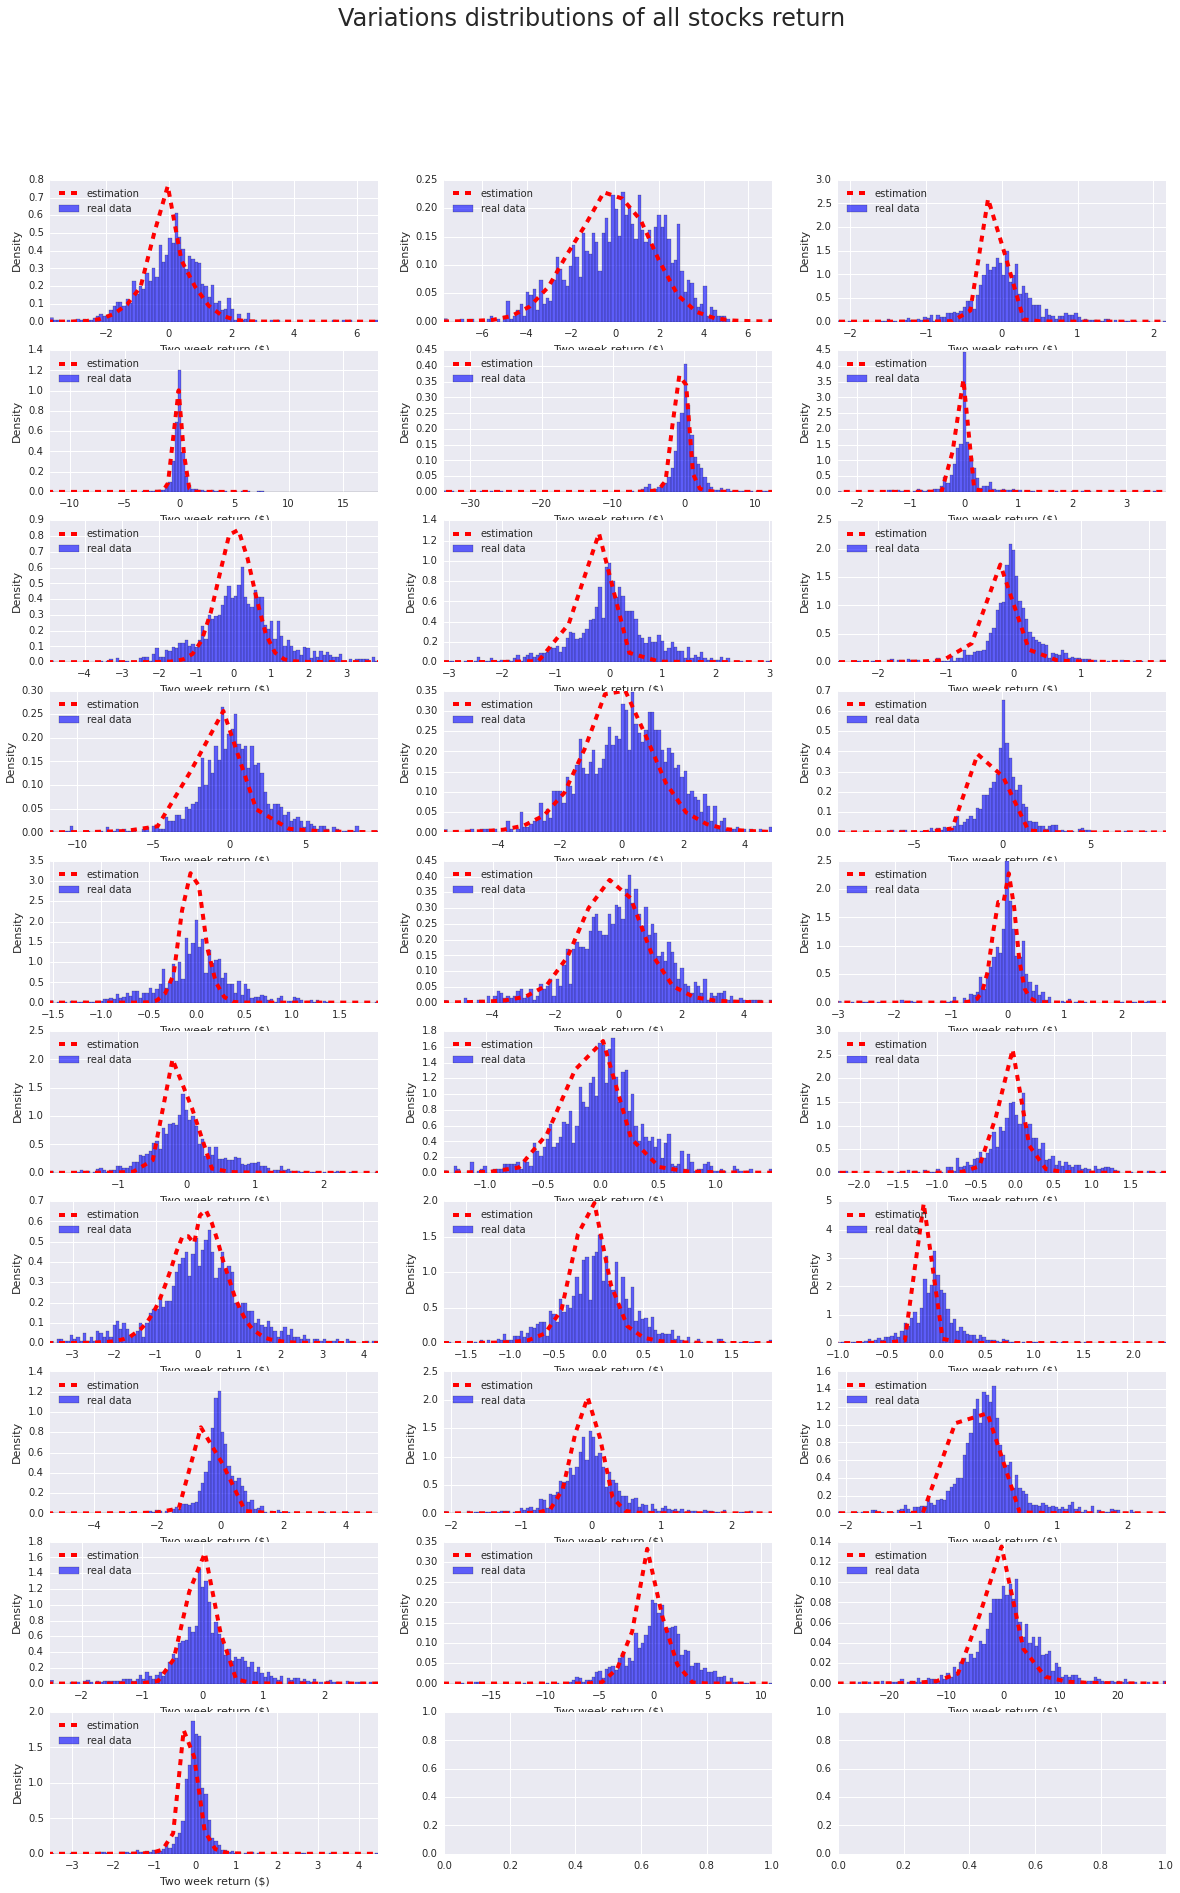

In [168]:
VisualALLSTOCK(150000,stocksReturns,factorsReturns,multivariate_t_rvs,6)

<div class="alert alert-warning">

I showed the grid graph so show you how good the linear model is, it is quite good in some case and bad in some case. It seems t-distribution help estimation of stock return better on the tail. The left side of the distribution, there are exist some areas which does not match with the prediction (stock return)

</div>

### Finding the good degree of freedom

New Value at Risk(VaR) 5%: -30.6995783137
New Conditional Value at Risk(CVaR) 5%: -59.6396960167
num failures: 32 over 1295
df= 3.0 Kupiec test p-value:  4.01613482742e-06
New Value at Risk(VaR) 5%: -28.2890248653
New Conditional Value at Risk(CVaR) 5%: -47.5164770658
num failures: 43 over 1295
df= 3.5 Kupiec test p-value:  0.00321793199436
New Value at Risk(VaR) 5%: -27.1958079484
New Conditional Value at Risk(CVaR) 5%: -44.4423285217
num failures: 50 over 1295
df= 4.0 Kupiec test p-value:  0.0504911763076
New Value at Risk(VaR) 5%: -26.4789025332
New Conditional Value at Risk(CVaR) 5%: -40.7224289937
num failures: 57 over 1295
df= 4.5 Kupiec test p-value:  0.313535952412
New Value at Risk(VaR) 5%: -24.5926953752
New Conditional Value at Risk(CVaR) 5%: -37.6382378782
num failures: 61 over 1295
df= 5.0 Kupiec test p-value:  0.629367855656
New Value at Risk(VaR) 5%: -24.3062577606
New Conditional Value at Risk(CVaR) 5%: -36.3065624231
num failures: 64 over 1295
df= 5.5 Kupiec test p-val

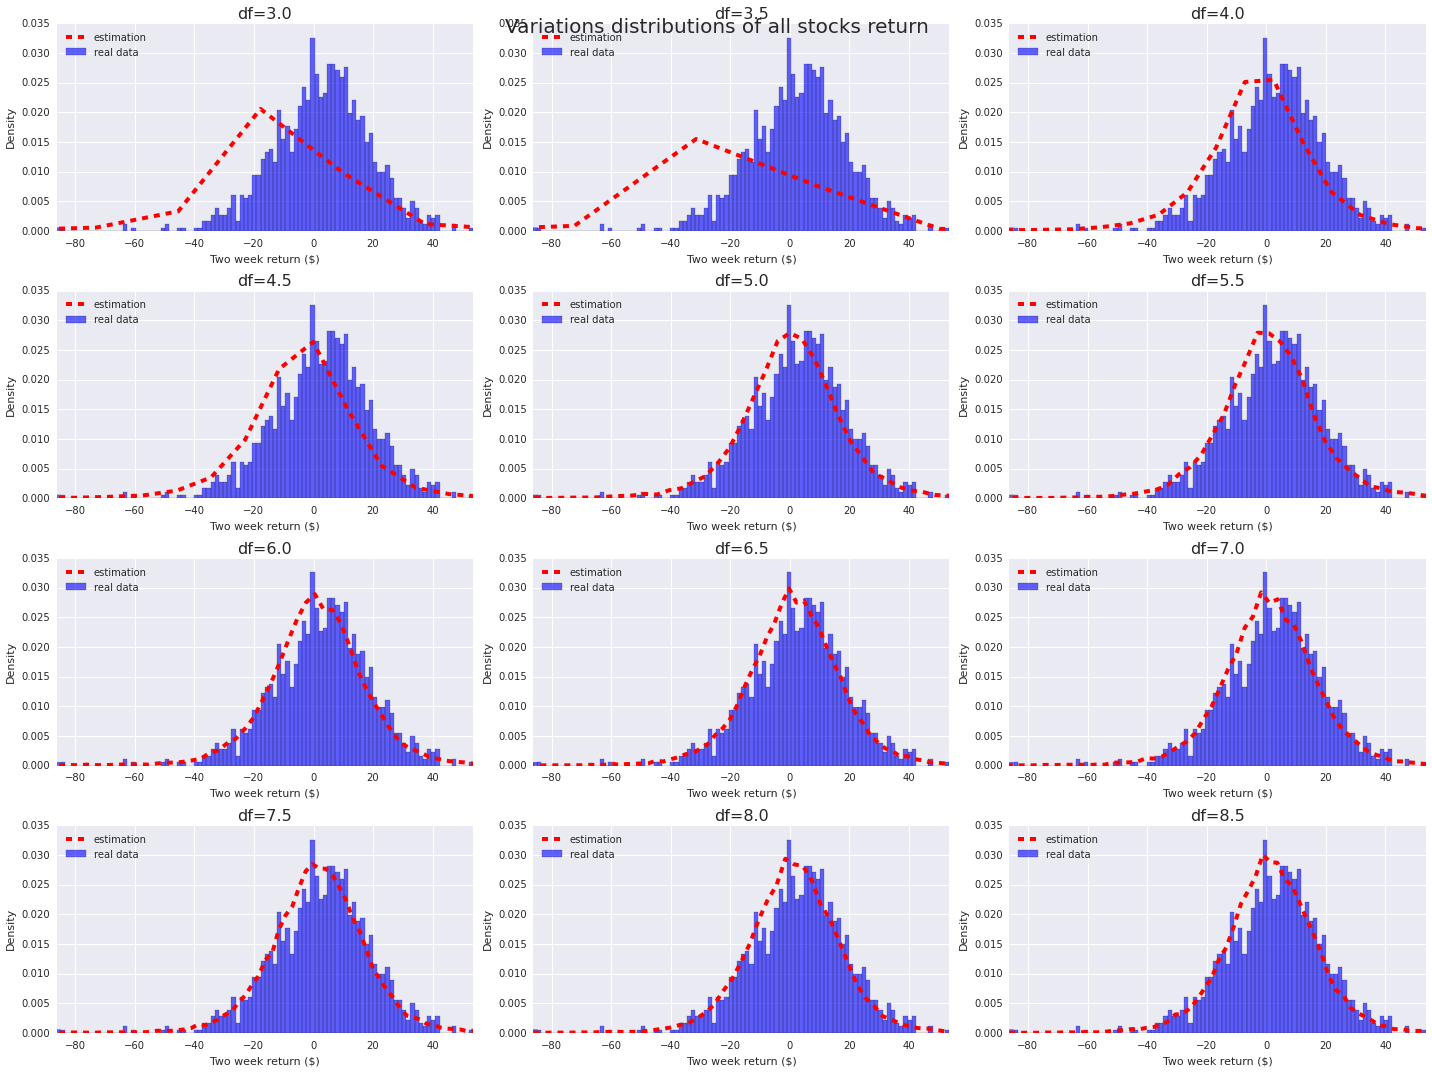

In [224]:
df = np.arange(3,9,0.5)
nCols = 3
nRows = int(np.ceil(len(df))/nCols)

f , axarr = plt.subplots(nRows, nCols)
f.suptitle("Variations distributions of all stocks return", fontsize=20)
f.set_figwidth(20)
f.set_figheight(15)

for idx, dfvalue in enumerate(df):
    # Simulation
    [newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(stocksReturns,factorsReturns,150000,multivariate_t_rvs,dfvalue)
    # Test
    print("df=",dfvalue,"Kupiec test p-value: " , kupiecTestPValue(stocksReturns, newValueAtRisk, 0.05))
    # Plot
    i, j = divmod(idx, nCols)
    plt.axes(axarr[i, j])
    Visualize2SampleDistribution(newTrials.collect(),ReturnOfAllStock(stocksReturns))
    plt.title('df='+str(dfvalue),fontsize=16)
f.tight_layout()
plt.show()

<div class="alert alert-warning">

From the grid graph, df increase from left to right and from top to bottom. As you can see, the estimation at the beginning is skew on the left and then move to middle. It reachs to the good estimation with df = 5.5. Then the estimation tends to supress at the body of the distribution that causes the estimation is underlying the data and make more errors.
</div>

<div class="alert bg-primary" style="background-color: rgba(252,51,47,1)">

<h2>Multivariate Johnson Su-distribution - Market Factors</h2>
</div>

<div>
From our experiment, it seems Johnson Su distribution represents very well our factor in the test. So I try to implement multivariate version of it.
<br><br>
From wiki, we can generate random variable of Johnson from normal distribution. Let U be a random variable that is uniformly distributed on the unit interval [0, 1]. Johnson's SU random variables can be generated from U as follows:
<img src="https://raw.githubusercontent.com/thanthanhan93/ImageForNotebook/master/AML%20lab7%2B8/johnson.png" alt="Drawing" style="width: 200px;"/>

where Φ is the cumulative distribution function of the normal distribution.</div>

In [67]:
def sampleJohnsonsu(a,b,mu,sigma,n):
    return sigma*np.sinh((stats.norm.ppf(np.random.uniform(size=n))-a)/b)+mu

In [69]:
# RUN SILMULATION
def multivariate_johnsonsu_rvs(mean,S,n,a,b,mu,sigma):
    d = len(mu)
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    z = z/np.array([np.sqrt(S[i][i]) for i in range(len(S))])
    return (sigma*np.sinh((z-a)/b)+mu).tolist()

def FindParameterForDistribution(factorsReturns,dict_name):
    param = []
    for i in range (0,len(factorsReturns)):
        param.append(FindParameterDistribution(factorsReturns[i],dict_name))
    return np.array(param).T

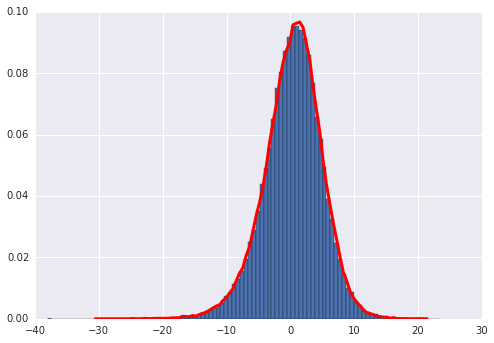

In [73]:
param =FindParameterDistribution(factorsReturns[0],'johnsonsu')
# from our convert
plt.hist(sampleJohnsonsu(*param,100000),bins=100,normed=1)
# from library stats
y,binEdges=np.histogram(stats.johnsonsu.rvs(*param,100000),bins=100,normed=1)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'r-',lw=3)
plt.show()

<div class="alert alert-warning">

The experiement shows how different our formula we use and the one supported by library. It seems we simulate well the johnson distribution by normal distribution

</div>

In [ ]:
def MonteCarloGeneralEstimate(newStocksReturns,factorsReturns,numTrials,multivariate_func,*arg):
    # Estimate new weight for linear regression model
    param = FactorParameter(newStocksReturns,factorsReturns)

    # run parallel
    parallelism = 12
    trial_indexes = list(range(0, parallelism))
    seedRDD = sc.parallelize(trial_indexes, parallelism)
    bNewFactorWeights = sc.broadcast(param[2])
    newTrials = seedRDD.flatMap(lambda idx: simulateTrialReturns(
                    max(int(numTrials / parallelism), 1), 
                    param[0], param[1],
                    bNewFactorWeights.value,multivariate_func,*arg))
    newTrials.cache()
    newValueAtRisk = fivePercentVaR(newTrials)
    newConditionalValueAtRisk = fivePercentCVaR(newTrials)

    print("New Value at Risk(VaR) 5%:", newValueAtRisk)
    print ("New Conditional Value at Risk(CVaR) 5%:", newConditionalValueAtRisk)
    return [newTrials,newValueAtRisk]

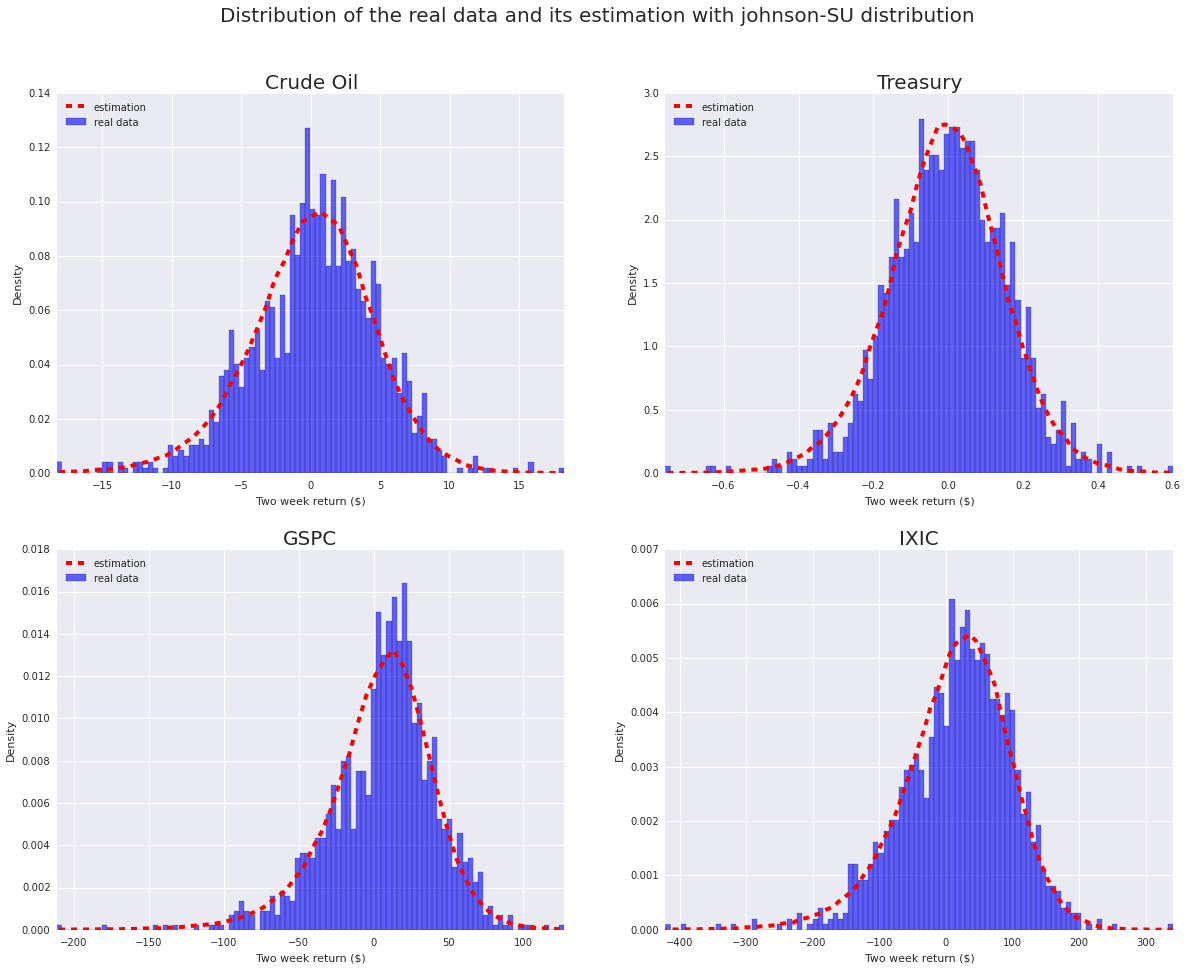

In [74]:
# Optimise parameter 
arg =FindParameterForDistribution(factorsReturns,'johnsonsu')

# Sample
sample = multivariate_johnsonsu_rvs(factorMeans,factorCov,200000,*arg)
sample = pd.DataFrame(sample)

titleList = ['Crude Oil','Treasury','GSPC','IXIC']
# plot 
nCols = 2
nRow = 2
f , axarr = plt.subplots(2, 2)
f.suptitle("Distribution of the real data and its estimation with johnson-SU distribution",fontsize = 20)
f.set_figwidth(20)
f.set_figheight(15)
    
for idx, stock in enumerate(factorsReturns):
    # Simulation
    # Plot
    i, j = divmod(idx, nCols)
    plt.axes(axarr[i, j])
    Visualize2SampleDistribution(sample[idx],factorsReturns[idx])
    plt.title(titleList[idx],fontsize=20)
plt.show()

<div class="alert alert-warning">

The experiement shows how different our formula we use and the one supported by library. It seems we simulate well the johnson distribution by normal distribution and convert formula

</div>

In [75]:
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(stocksReturns,factorsReturns,
                                        200000,multivariate_johnsonsu_rvs,*arg)
HyTestMonteCarlo(newTrials,stocksReturns,newValueAtRisk)

New Value at Risk(VaR) 5%: -20.6690191663
New Conditional Value at Risk(CVaR) 5%: -29.5779331958
num failures: 93 over 1295
Kupiec test p-value:  0.00069672615601


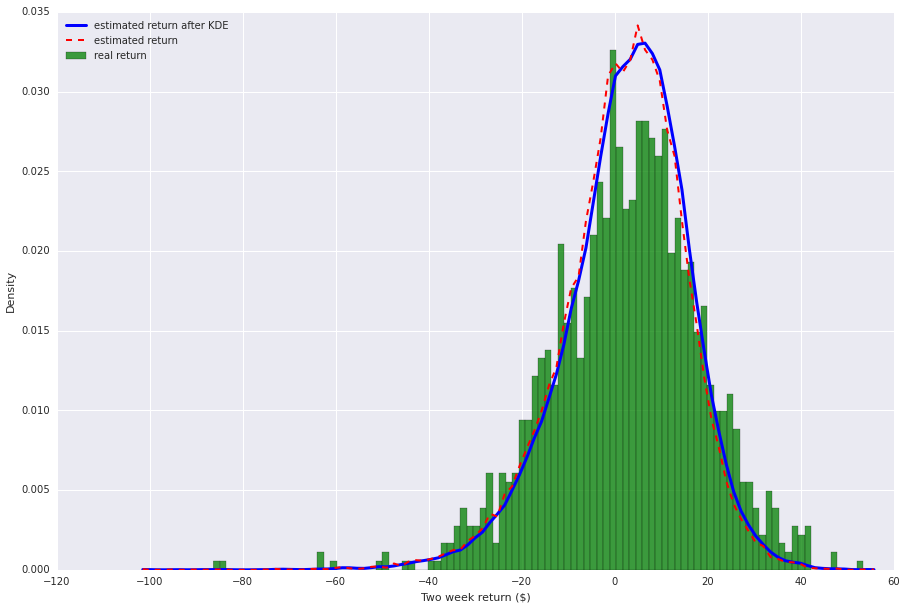

In [76]:
VisualizeAfterModel(newTrials.collect(),stocksReturns)

<div class="alert alert-warning">
I had a trouble when implementing multivariate for Johnson Su distribution because the normal distribution in conversion formulat is $N(0,1)$ but when we sample multivariate using matrix covariance, the value is in diagonal is not equal to 1. After sampling from multivariate normal distribution, we have to normalize it into z value and use it for converting to Johnson SU distribution. 
<br><br>
As you can see from the estimation curve after sampling, it matchs well with real data. But the result is not really good. There are some reason:
<ul>
<li>Linear regression model. As I mentioned before, our factors still do not capture enough information from our stock return. </li>
<li>Our distribution can represent well the shape of distribution but it cannot be capable of fat-tails problem. If you look carefully, it seems the our total stocks returns estimation suffered at the part between body and tail. In my opinion, that is the reason which cause this kind of error. From the reading http://fooledbyrandomness.com/masquerade.pdf , it shows the list of test which are suffered from detect fat-tailed distribution.</li></ul>
</div>

> Kolmogorov_Smirnov test is an option but it is more sensitive to deviations in the center than in the tails. Anderson Darling test statistic puts more weight in the tails than the KS-test.

<div class="alert bg-primary" style="background-color: rgba(252,51,47,1)">

<h2>Multivariate Log normal - Market Factors</h2>
</div>

random variable $X$ is log-normally distributed, then $Y = ln ⁡ ( X )$ has a normal distribution. Likewise, if $Y$ has a normal distribution. Log-normal has one main characteristic that this distribution is skewed to the right and has long tail. So that is why it is usually used in finance. To implement multivariate follow the formula 
<p style="text-align:center"> $X=e^{\mu +\sigma Z}$ </p>
with $Z$ a standard normal variable. $\mu$ and $\sigma$ in here are parameters of normal distribution and we can estimate it by using the log value of our factor data. Because log normal has a lower bound of zero so we have to shift data to the right and reverse back after we sampling.

In [46]:
# RUN SILMULATION
def multivariate_lognorm_rvs(mean,var,n,posi=0,*arg):
    z = np.random.multivariate_normal(mean,var,(n,))
    return (np.exp(z)+np.array(posi)).tolist()

In [47]:
# RUN SILMULATION
def multivariate_lognorm_rvs_v2(mean,var,n,posi,lmean,lvar):
    z = np.random.multivariate_normal(np.zeros(len(mean)),var,(n,))[0]
    z = z/np.array([np.sqrt(var[i][i]) for i in range(len(var))])
    return [(np.exp(np.array([np.sqrt(lvar[i][i]) for i in range(len(lvar))])
                    *z+np.array(lmean))+np.array(posi)).tolist()]

In [50]:
## convert data to positive value
# - lowest value in each factor
posi = list()
# - log value of the factor
logFactorsReturn = list()
# - positive value of the factor 
posvalue=list()

for factor in factorsReturns:
    posi.append(np.min(factor)-1)
    posvalue.append(np.array(factor)-posi[-1])
    logFactorsReturn.append(np.log(np.array(factor)-posi[-1]))

# - mean and variance of log-norm distribution
logFactorsMean = [np.mean(i) for i in logFactorsReturn]
logFactorsVar = np.cov(logFactorsReturn)
factorsMean = [np.mean(i) for i in posvalue]
factorsVar = np.cov(posvalue)

# - sampling 1e6 samples
trials = list()
for i in range(int(3e5)):
    [trial] = multivariate_lognorm_rvs(logFactorsMean,logFactorsVar,1,posi)
    trials.append(trial)
trials = np.transpose(trials)

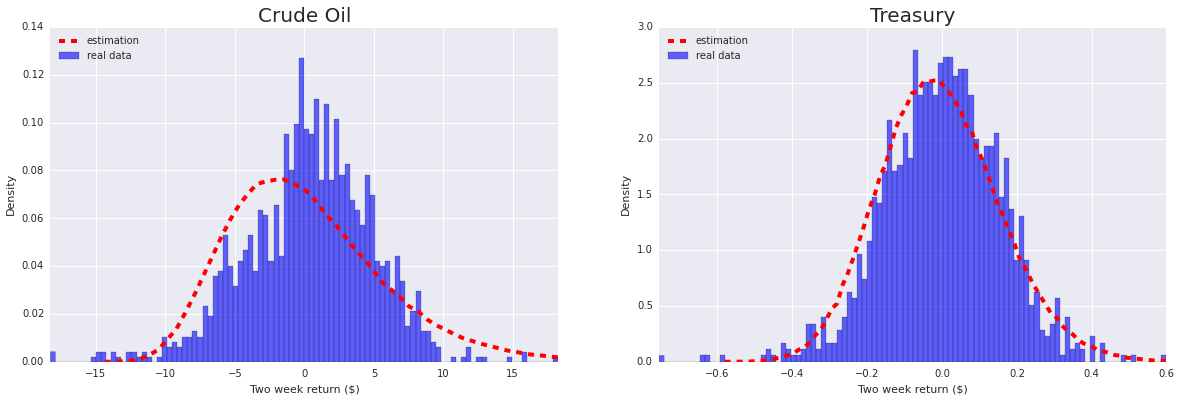

In [51]:
plt.figure(figsize=(20,6))
ax = plt.subplot(1,2,1)
Visualize2SampleDistribution(trials[0],factorsReturns[0])
ax.set_title('Crude Oil',fontsize=20)
ax = plt.subplot(1,2,2)
Visualize2SampleDistribution(trials[1],factorsReturns[1])
ax.set_title('Treasury',fontsize=20)

plt.suptitle('',fontsize =20)

<div class="alert alert-warning">It seem the log-norm distribution does not match with our data. After spending time checking the idea, we think we are wrong when multivariate sampling. The covariance matrix computed by using data after logarithm is wrong because we may change the how relationship between data.
</div>

In [52]:
trials = list()
for i in range(int(3e5)):
    [trial] = multivariate_lognorm_rvs_v2(factorsMean,factorsVar,1,posi,logFactorsMean,logFactorsVar)
    trials.append(trial)
trials = np.transpose(trials)

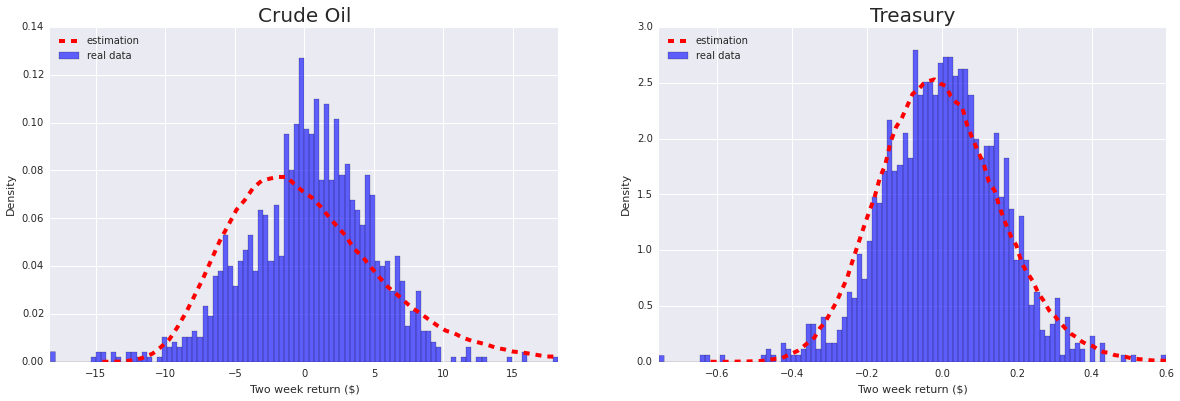

In [53]:
plt.figure(figsize=(20,6))
ax = plt.subplot(1,2,1)
Visualize2SampleDistribution(trials[0],factorsReturns[0])
ax.set_title('Crude Oil',fontsize=20)
ax = plt.subplot(1,2,2)
Visualize2SampleDistribution(trials[1],factorsReturns[1])
ax.set_title('Treasury',fontsize=20)

<div class="alert alert-warning">
We did 2nd version of this distribution, it is quite reasonable than frist version but it seems the result is similar with 1st one. In addition, the log-norm distribution does not work well in this case, specially on Crude Oil data. We will see why in next picture.
</div>

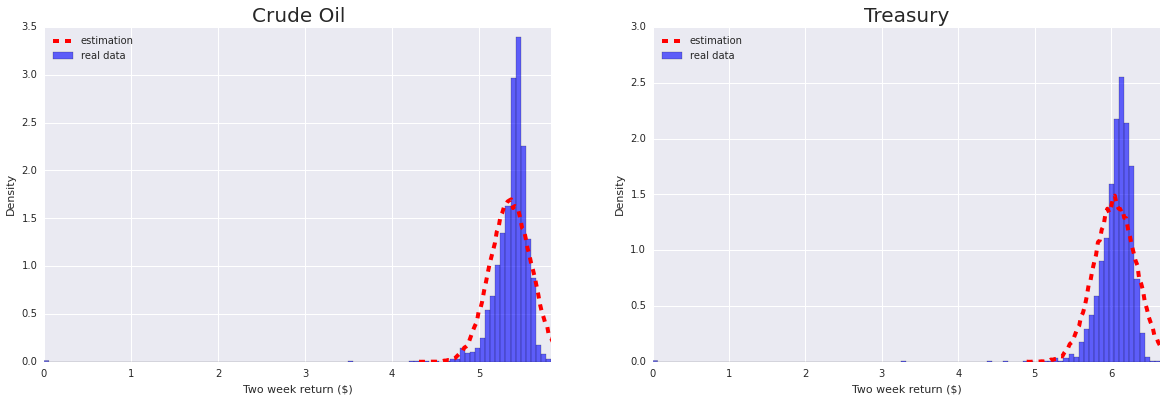

In [54]:
trials = list()
for i in range(int(1e5)):
    [trial] = multivariate_normal(logFactorsMean,logFactorsVar,1)
    trials.append(trial)
trials = np.transpose(trials)

plt.figure(figsize=(20,6))
ax = plt.subplot(1,2,1)
Visualize2SampleDistribution(trials[2],logFactorsReturn[2])
ax.set_title('Crude Oil',fontsize=20)
ax = plt.subplot(1,2,2)
Visualize2SampleDistribution(trials[3],logFactorsReturn[3])
ax.set_title('Treasury',fontsize=20)

plt.suptitle('',fontsize =20)

In [63]:
param = [posi,logFactorsMean,logFactorsVar]
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(stocksReturns,factorsReturns,
                                        200000,multivariate_lognorm_rvs_v2,*param)
HyTestMonteCarlo(newTrials,stocksReturns,newValueAtRisk)

New Value at Risk(VaR) 5%: -24.2505156528
New Conditional Value at Risk(CVaR) 5%: -28.83762327
num failures: 64 over 1295
Kupiec test p-value:  0.923677398232


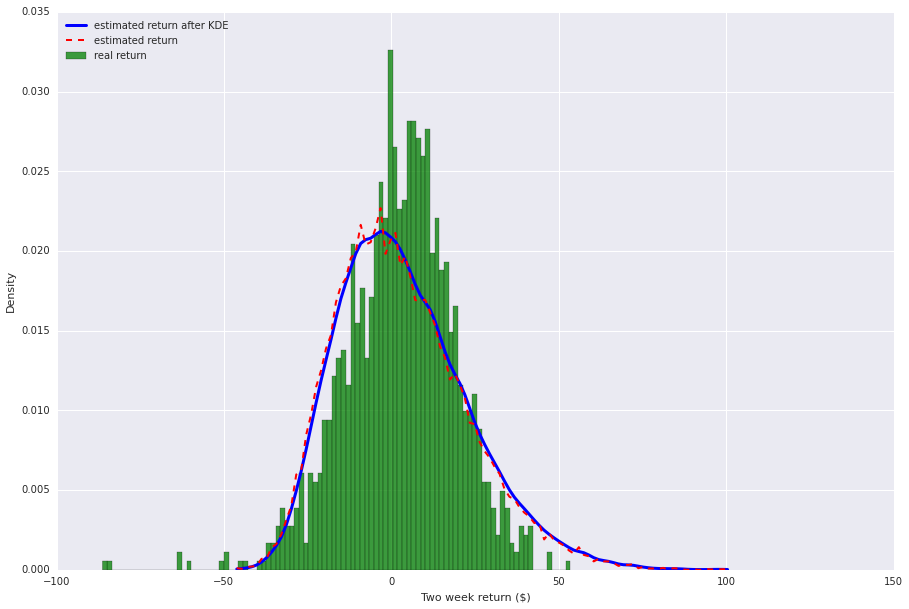

In [64]:
VisualizeAfterModel(newTrials.collect(),stocksReturns)

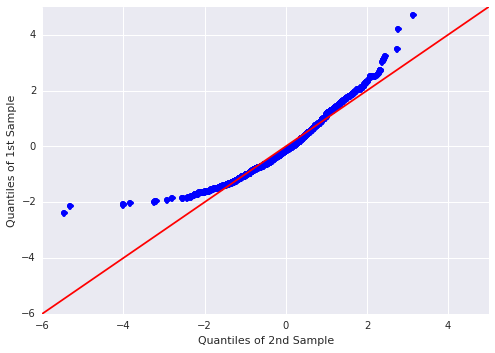

Stocks Return from real data vs from our simulation: p-value= 7.76034257502e-08


In [66]:
pp_y = sm.ProbPlot(np.array(ReturnOfAllStock(stocksReturns)),fit=True)
pp_x = sm.ProbPlot(np.array(newTrials.collect())[0:len(np.array(ReturnOfAllStock(stocksReturns)))],fit=True)
fig = pp_x.qqplot(line='45',other=pp_y)
plt.show()
allStocksReturn = ReturnOfAllStock(stocksReturns)
print("Stocks Return from real data vs from our simulation: p-value=", 
      stats.ks_2samp(newTrials.collect(),allStocksReturn)[1])

<div class="alert alert-warning">
The figure shows the distribution of data after logarithm. The log data does not look like normal distribution so that it is hard to use log-normal to represent this market factors. <br><br>

This session is the last part in our experiment. Because of comprehensive layout, we put it in here. As can be seen from the result, even the final estimation does not match with our total stock return but VaR value is still good to pass the test. **Something is so strange in here** that we do not need the good distribution for representing our market factors, if we can find distribution have fat-tail that can approximate the shape of factor, the result will be good.
<br><br>
I already showed you the way to find good distribution that matches with your factor. Later, I use PCA to reduce dependencies between factors and sample it indenpendently but the result is not good as the expect. Furthermore, in previous session we use Johnson-SU which is so close the factors but the result is still bad. So I just give the hypothesis and explaination for future work.
<ul>
<li>First, Because the time-series data is noisy, so the distribution of real data may not show the charasteristic of the factor. So we have to find a way to split noise and our market factors return value and model both of them. It will help our monte carlo simulation </li>
<br>
<li>Second, is Kupiec test good for this case? because it is only test based on prediction of VaR and does not take a count in distribution of the total stock return. The test only focus on the value of VaR so it is tough to use it to evaluate our model. The model can give you good VaR now but how can we know whether it will be good in near future (if the Monte Carlo Simulation does not simulate well total stock return but still giving good VaR in this case)</li><br>
<li>Lastly, if the distribution does not match with the factor, so it will be hard to improve our regression model because the distribution we draw variable is not same as the real data is. We just incidently discover the good result this problem. In my opinion, we should split the model into 2 part for improvement: distribution and linear regression and test them seperately. </li></ul>
</div>

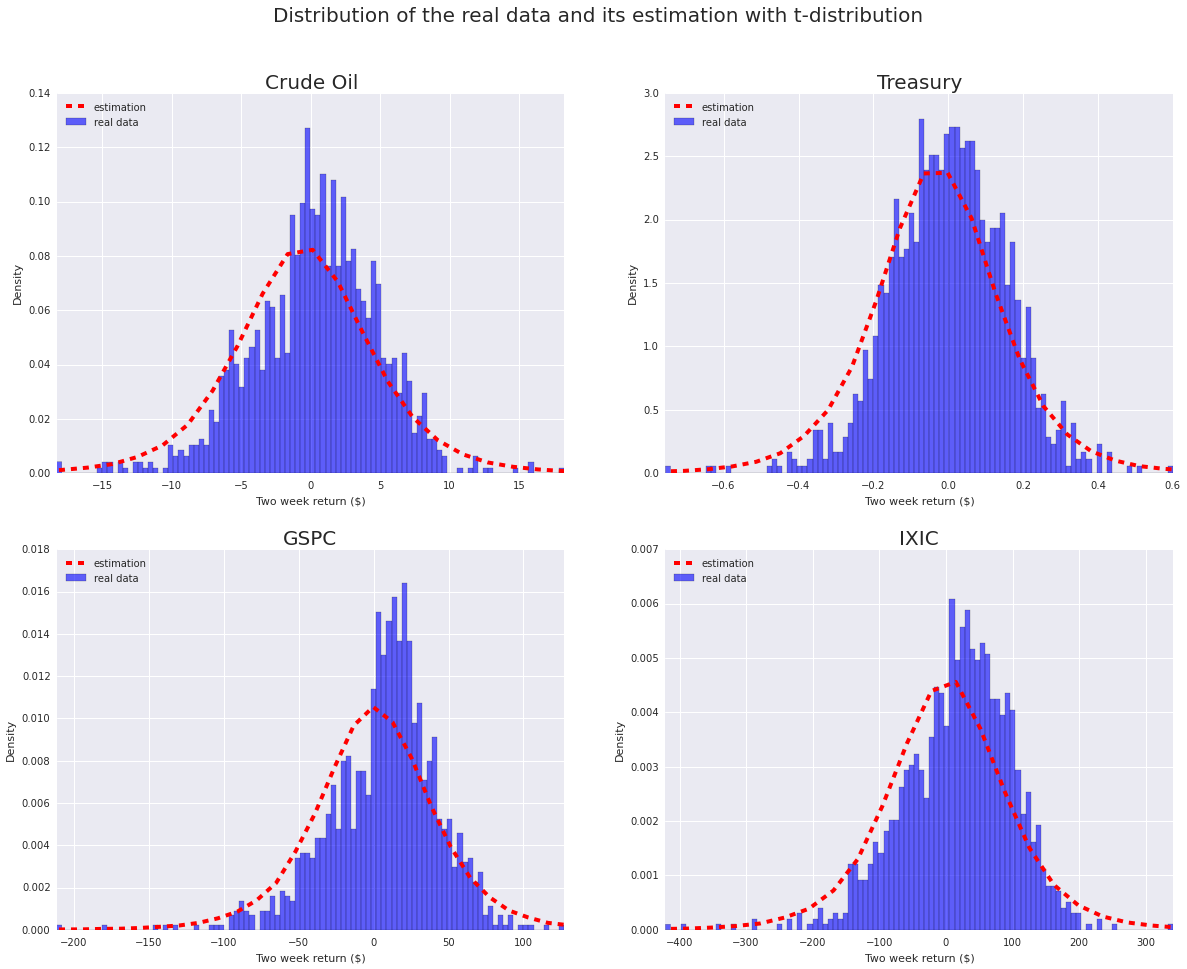

In [86]:
# Sample
sample = multivariate_t_rvs(factorMeans,factorCov,200000,5.5)
sample = pd.DataFrame(sample)

titleList = ['Crude Oil','Treasury','GSPC','IXIC'] 
nCols = 2
nRow = 2

f , axarr = plt.subplots(2, 2)
f.suptitle("Distribution of the real data and its estimation with t-distribution",fontsize = 20)
f.set_figwidth(20)
f.set_figheight(15)
    
for idx, stock in enumerate(factorsReturns):
    i, j = divmod(idx, nCols)
    plt.axes(axarr[i, j])
    Visualize2SampleDistribution(sample[idx],factorsReturns[idx])
    plt.title(titleList[idx],fontsize=20)
plt.show()

<div class="alert alert-warning">
While doing experienment with t-distribution, I didn't try to visualize the distribution estimation for each factor because I saw that the final (all stocks return) distribution matched with our estimation. The red lines in picture above shows you estimation distribution of multivariate t-distribution with df = 5.5 which gave us the best result. As can be seen that, it seems not match with our real factor data and they are skewed on left side. 
</div>

<div class="alert alert-danger">

Because of time, we only try on T-distribution, JohnsonSu distribution and Log-normal distribution. However, there is exist a formula to convert multivariate non-normal distribution to multivariate normal distribution. If you have strong background about statistic, you can find a way to do that. 
</div>

<div class="alert bg-primary" style="background-color: rgba(28,180,204,0.8)">
<h2>Component Principle Analysis removing correlation between factors </h2>
</div>

<div class="alert alert-warning">One of the problem we encounter is correlation between factors. That makes us so difficult when sampling. What happen if one of the factor is not normal distribution. So we can't not use multivariate normal distribution for sampling. The idea, we want to transform data into PCA dimension and reduce dimension if possible to remove the relationship between factors. After that, we can sample seperately. :)</div>

In [52]:
PCA_model = PCA(np.asarray(factorsReturns).T)

In [53]:
# project(x, minfrac=0.0) : project new data into new dimension
factorsReturn_PCA = PCA_model.Y.T
correlation = np.corrcoef(factorsReturn_PCA)
np.set_printoptions(precision=2)
print(correlation)

[[  1.00e+00  -5.15e-16   2.87e-18   3.40e-16]
 [ -5.15e-16   1.00e+00   7.59e-17   1.04e-16]
 [  2.87e-18   7.59e-17   1.00e+00   1.91e-16]
 [  3.40e-16   1.04e-16   1.91e-16   1.00e+00]]


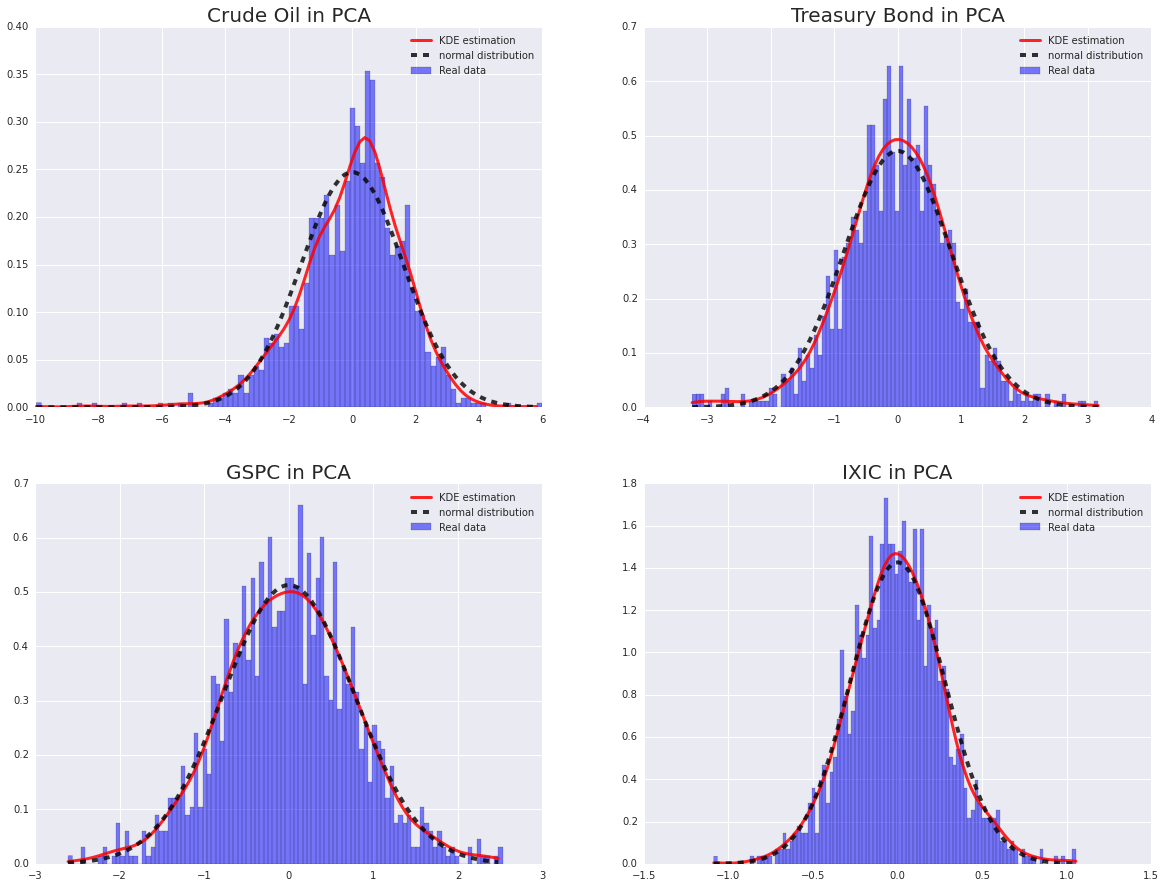

In [54]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Crude Oil in PCA',fontsize=20)
plotDistribution(factorsReturn_PCA[0])
plt.subplot(2,2,2)
plt.title('Treasury Bond in PCA',fontsize=20)
plotDistribution(factorsReturn_PCA[1])
plt.subplot(2,2,3)
plt.title('GSPC in PCA',fontsize=20)
plotDistribution(factorsReturn_PCA[2])
plt.subplot(2,2,4)
plt.title('IXIC in PCA',fontsize=20)
plotDistribution(factorsReturn_PCA[3])
plt.show()

<div class="alert alert-warning">

It seems the distribution of factors or the shape of the factor's distribution changes little. If you look the GSPC distribution, you see that now it is close to normal distribution than before. It seems the distribution is rougher (the distribution go up and down at many points).
</div>

In [57]:
newrawStocks = getRawStockData(35)
newStocks = list(map(lambda newStock: fillInHistory_fix(trimToRegion(newStock, start, end)
                ,start, end), newrawStocks))
newStocksReturns = list(map(twoWeekReturns, newStocks))

the number of stocks we invest is:  28


New Value at Risk(VaR) 5%: -19.2385551658
New Conditional Value at Risk(CVaR) 5%: -25.0239444191
num failures: 110 over 1295
Kupiec test p-value:  1.36388342446e-07


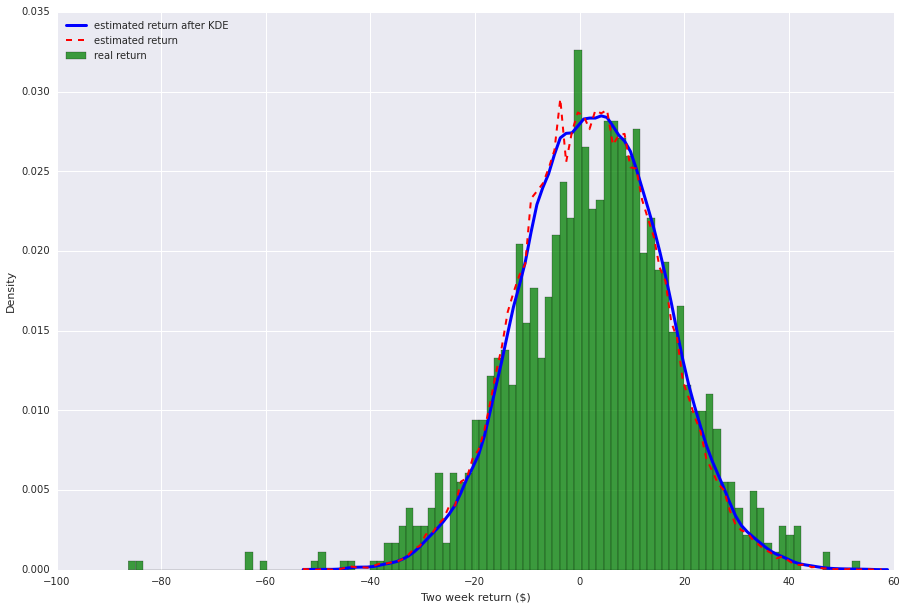

In [93]:
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(newStocksReturns,factorsReturn_PCA,200000,multivariate_normal)
print("Kupiec test p-value: " , kupiecTestPValue(newStocksReturns, newValueAtRisk, 0.05))
VisualizeAfterModel(newTrials.collect(),newStocksReturns) #.collect()

<div class="alert alert-warning">

Wow, it works quite well, one of the problem we can see in here is the distribution of factors changes a little bit so the result can be worse. That means now we will try to test whether we can sample seperately so that we can apply any distribution for each factor. 

</div>

### Independent sampling
In this part, we try to sample independently each variables so check whether it is good as using multivariate sampling as above

In [58]:
def multipleSamplingParameter(factorsReturns,*distlist):
    samplingParam = list()
    for idx in range(len(factorsReturns)):
        param =FindParameterDistribution(factorsReturns[idx],distlist[idx])
        samplingParam.append(param)
    return samplingParam

def samplingIndependentGeneral(numTrials, distName, *distParam):
    dist = getattr(stats, distName)
    return dist.rvs(*distParam,size=1)[0]

In [199]:
def simulateIndependentTrialReturns(numTrials, weights, numFactors, *distlist):
    trialReturns = []
    for i in range(0, numTrials):
        # generate sample of factors' returns
        trialFactorReturns = list()
        for idx in np.arange(numFactors):
            trialFactorReturns.append(samplingIndependentGeneral(1,distlist[idx],*distlist[numFactors+idx]).tolist())
        # featurize the factors' returns
        trialFeatures = featurize(list(trialFactorReturns))
        # insert weight for intercept term
        trialFeatures.insert(0,1)
        # calculate the return of each instrument
        trialTotalReturn = np.dot(weights,trialFeatures)
        # then calulate the total of return for this trial features
        trialTotalReturn = sum(trialTotalReturn)
        
        trialReturns.append(trialTotalReturn)
    return trialReturns

def MonteCarloIndependentEstimate(newStocksReturns,factorsReturns,numTrials,*distlist):
    # Estimate new weight for linear regression model
    param = FactorParameter(newStocksReturns,factorsReturns)
    # Find distribution parameter for input factor
    distParam = multipleSamplingParameter(factorsReturns,*distlist)
    #print(distParam)
    
    # run parallel
    parallelism = 12
    trial_indexes = list(range(0, parallelism))
    seedRDD = sc.parallelize(trial_indexes, parallelism)
    bNewFactorWeights = sc.broadcast(param[2])
    newTrials = seedRDD.flatMap(lambda idx: simulateIndependentTrialReturns(
                    max(int(numTrials / parallelism), 1), 
                    bNewFactorWeights.value,len(factorsReturns),*distlist,*distParam))
    newTrials.cache()
    newValueAtRisk = fivePercentVaR(newTrials)
    newConditionalValueAtRisk = fivePercentCVaR(newTrials)

    print("New Value at Risk(VaR) 5%:", newValueAtRisk)
    print ("New Conditional Value at Risk(CVaR) 5%:", newConditionalValueAtRisk)
    return [newTrials,newValueAtRisk]
    

New Value at Risk(VaR) 5%: -19.1036296015
New Conditional Value at Risk(CVaR) 5%: -24.9667286242
num failures: 113 over 1295
Kupiec test p-value:  2.24914210088e-08


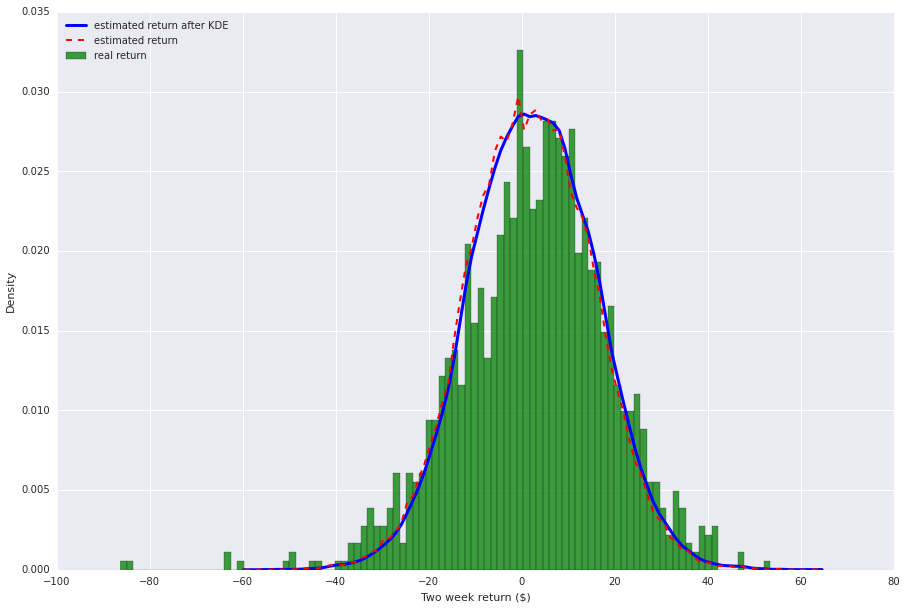

In [99]:
distList = ['norm','norm','norm','norm']
[newTrials,newValueAtRisk] = MonteCarloIndependentEstimate(newStocksReturns,factorsReturn_PCA,300000,*distList)
HyTestMonteCarlo(newTrials,newStocksReturns,newValueAtRisk)
VisualizeAfterModel(newTrials.collect(),newStocksReturns)

![](https://raw.githubusercontent.com/thanthanhan93/ImageForNotebook/master/AML%20lab7%2B8/PCA_test1.png)

<div class="alert alert-warning">
From the result we obtained the table above, it shows that the result does not change too much after we use PCA. It is a good new.
<br><br>
In ** simulateIndependentTrialReturns**, now I draw sample independently and the result is equally same as we draw from multivariate distribution because the factors now are independent. Combining the **Finding Good Ditribution for Factor** section, I believe that we can improve the result significant. 
</div>

### Sampling with different distribution - t-distribution with different df

In [111]:
bestParameterT = list()
for i in range(0,4):
    bestParameterT.append(FindParameterDistribution(factorsReturn_PCA[i],'t'))

df_bpTdistribution = pd.DataFrame(bestParameterT,columns=['df','mean','variance'])
df_bpTdistribution['label'] = ['Oil_PCA','Treasury_PCA','GSPC_PCA','IXIC_PCA']
df_bpTdistribution = df_bpTdistribution.set_index('label')
df_bpTdistribution.index.name = None
df_bpTdistribution

df          mean  variance
Oil_PCA        7.639094  1.453611e-16  1.374557
Treasury_PCA   7.583205 -1.496243e-16  0.726973
GSPC_PCA      21.937923  1.432547e-16  0.741540
IXIC_PCA      13.413270  4.847225e-17  0.258085

New Value at Risk(VaR) 5%: -18.7641423391
New Conditional Value at Risk(CVaR) 5%: -26.4605999176
num failures: 115 over 1295
Kupiec test p-value:  6.45441864333e-09


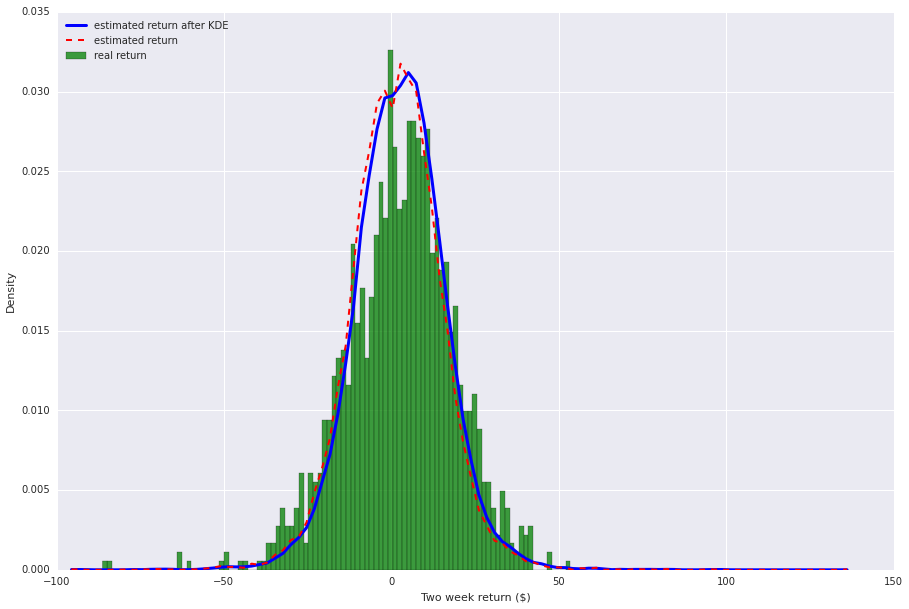

In [115]:
distList = ['t','t','t','t']
[newTrials,newValueAtRisk] = MonteCarloIndependentEstimate(newStocksReturns,factorsReturn_PCA,100000,*distList)
print("Kupiec test p-value: " , kupiecTestPValue(newStocksReturns, newValueAtRisk, 0.05))
VisualizeAfterModel(newTrials.collect(),newStocksReturns)

<div class="alert alert-warning">
The result is worse than using normal. As we mentioned above, the distribution of market factors change that make t-distribution may does't work on this case.
</div>

### Sampling with different distribution - best distribution from testing

<div class="alert alert-warning">
As we shows you above that distribution of the factor after using PCA are changed so we have to run the test again to find the best distribution for each factors
</div>

[['johnsonsu', 0.73265557309767748], ['johnsonsb', 0.34675946806908114], ['gengamma', 0.30520606887653001], ['loggamma', 0.30520606887653001], ['mielke', 0.30361283293621105], ['beta', 0.22961030161481988], ['fisk', 0.16346421494496169], ['powerlognorm', 0.14810855822863986], ['pearson3', 0.062281849879765531], ['genlogistic', 0.025968409053900948]]


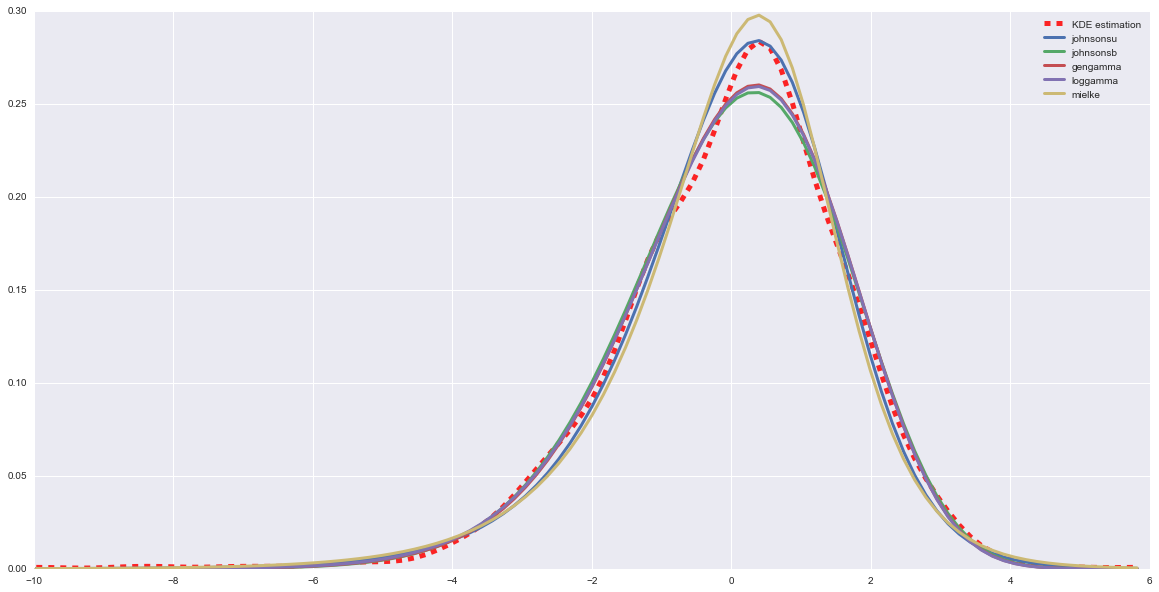

In [169]:
topPvalueList = FindGoodDistribution(factorsReturn_PCA[0],dist_names,10)
print(topPvalueList)
VisualizeKGoodDistribution(factorsReturn_PCA[0],[i[0] for i in topPvalueList][:5])

[['genlogistic', 0.98735276600092159], ['johnsonsu', 0.88676686116009962], ['logistic', 0.74276283450162728], ['t', 0.55550909580671748], ['johnsonsb', 0.4664801254817969], ['gengamma', 0.41771946141180705], ['tukeylambda', 0.40614367387341188], ['rice', 0.40405789090917998], ['norm', 0.39899035505025382], ['exponweib', 0.39740094085344468]]


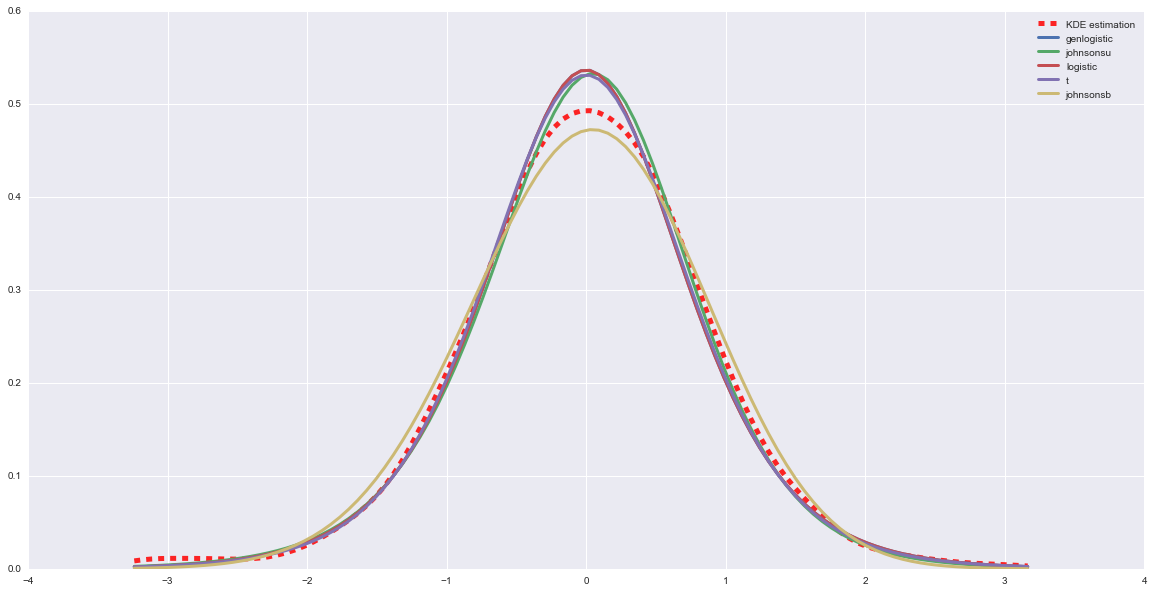

In [170]:
topPvalueList = FindGoodDistribution(factorsReturn_PCA[1],dist_names,10)
print(topPvalueList)
VisualizeKGoodDistribution(factorsReturn_PCA[1],[i[0] for i in topPvalueList][:5])

[['t', 0.99948430551743905], ['johnsonsu', 0.97394631956858246], ['fatiguelife', 0.97386473550585329], ['tukeylambda', 0.95726767179201255], ['norm', 0.94950693804479214], ['exponweib', 0.94678718342077528], ['johnsonsb', 0.9439823058373471], ['nakagami', 0.87970183216969799], ['gamma', 0.87535189546222181], ['rice', 0.86189200619751538]]


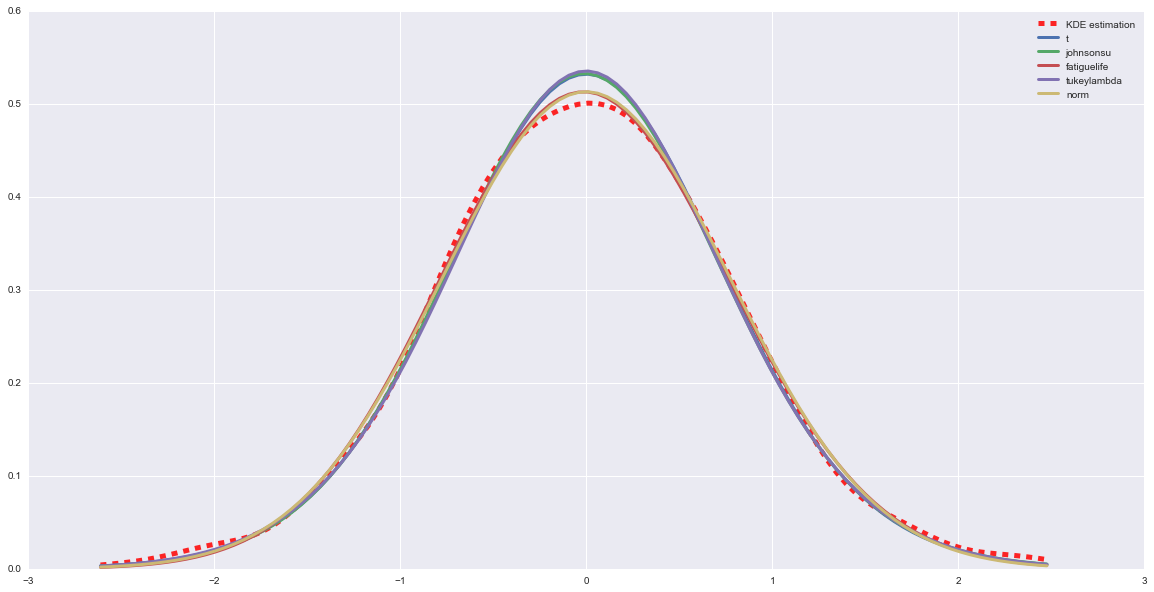

In [162]:
topPvalueList = FindGoodDistribution(factorsReturn_PCA[2],dist_names,10)
print(topPvalueList)
VisualizeKGoodDistribution(factorsReturn_PCA[2],[i[0] for i in topPvalueList][:5])

[['t', 0.99676419199516542], ['rice', 0.9743382530500444], ['johnsonsu', 0.93362502681971471], ['fisk', 0.91569356275043556], ['logistic', 0.91569356275043556], ['mielke', 0.89866779879403691], ['nakagami', 0.8175006446310471], ['pearson3', 0.80480568381464535], ['tukeylambda', 0.80446680551047622], ['norm', 0.68374782263809741]]


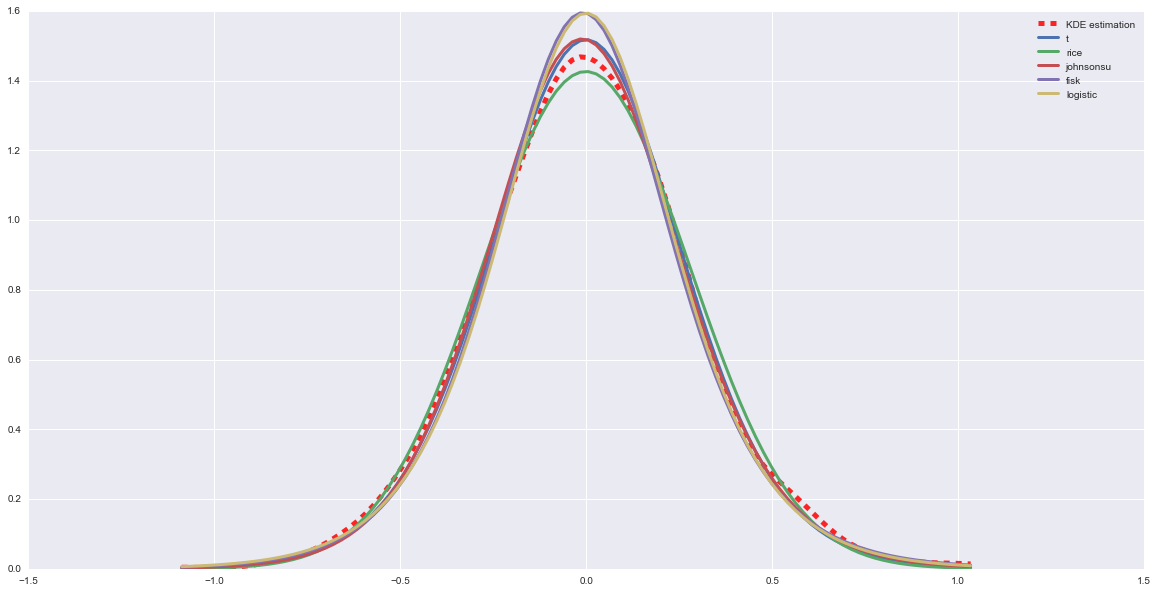

In [163]:
topPvalueList = FindGoodDistribution(factorsReturn_PCA[3],dist_names,10)
print(topPvalueList)
VisualizeKGoodDistribution(factorsReturn_PCA[3],[i[0] for i in topPvalueList][:5])

New Value at Risk(VaR) 5%: -20.3572225947
New Conditional Value at Risk(CVaR) 5%: -27.6067789637
num failures: 95 over 1295
Kupiec test p-value:  0.000297641109894


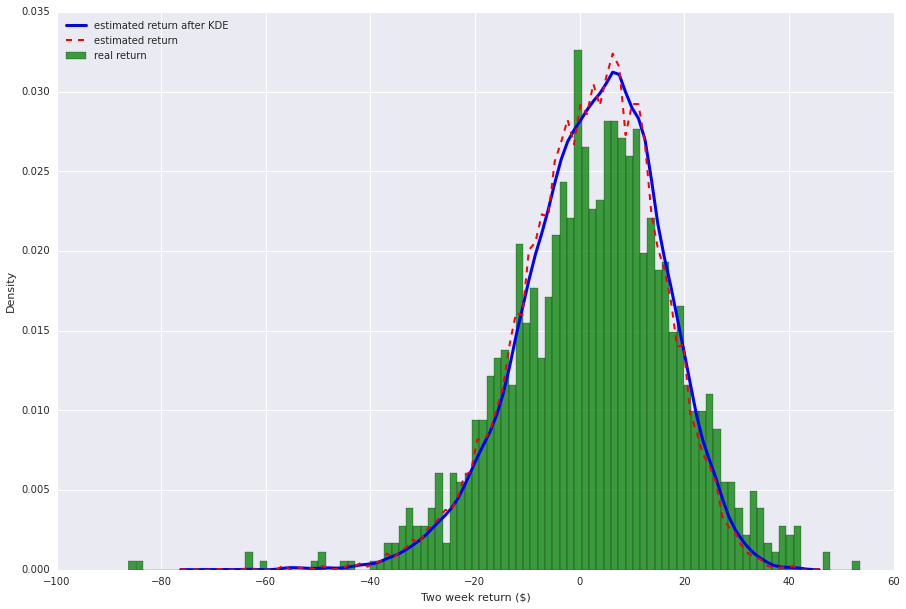

In [116]:
distList = ['gengamma','genlogistic','t','logistic']
[newTrials,newValueAtRisk] = MonteCarloIndependentEstimate(newStocksReturns,factorsReturn_PCA,100000,*distList)
print("Kupiec test p-value: " , kupiecTestPValue(newStocksReturns, newValueAtRisk, 0.05))
VisualizeAfterModel(newTrials.collect(),newStocksReturns)

<div class="alert alert-warning">
The result is better than using normal but p-value still quite low compared with using multivariate t-distribution on original data. <br><br>

it is a big question. We already found the good distribution for each factor but it doesn't work well. So let see how the linear model change before and after PCA
</div>

In [47]:
def FindParamRegression(factorsReturns,stocksReturns):
    # transpose factorsReturns
    factorMat = transpose(factorsReturns)
    # featurize each row of factorMat
    factorFeatures = list(map(featurize,factorMat))
    # OLS require parameter is a numpy array
    factor_columns = np.array(factorFeatures)
    #add a constant - the intercept term for each instrument i.
    factor_columns = sm.add_constant(factor_columns, prepend=True)
    # Estimate new weight for linear regression model
    weights = [estimateParams(stockReturns,factor_columns) for stockReturns in stocksReturns]
    return [factor_columns,weights]

In [49]:
def CompareMSEbyFeature(stocksReturns,feature1,feature2):
    #get prediction origin
    [factor_columns,weights] = FindParamRegression(feature1[1],stocksReturns)
    weights = np.array(weights).T
    prediction = np.dot(factor_columns,weights).T

    # get prediction PCA
    [factor_columns,weights] = FindParamRegression(feature2[1],stocksReturns)
    weights = np.array(weights).T
    prediction_PCA = np.dot(factor_columns,weights).T


    # compute MSE 
    MSE = np.sum((prediction-np.array(stocksReturns))**2,axis=1)/len(stocksReturns[0])
    MSE_n = np.sum((prediction_PCA-np.array(stocksReturns))**2,axis=1)/len(stocksReturns[0])
    x = np.arange(1,len(MSE)+1)

    # plot data
    #sns.set_context("notebook", font_scale=1.2)
    plt.figure(figsize=(20,6))
    plt.plot(x,-MSE_n+MSE,'b-o',linewidth=1, label="Amount of MSE reduces compared with ORIGIN",alpha=0.75)
    plt.bar(x,MSE,0.8, color='c',label="MSE-"+feature1[0], alpha = 1,align='center')
    plt.bar(x,MSE_n,0.8,color='r', label="MSE-"+feature2[0],alpha=0.5,align='center')
    plt.xlabel("Stock ID")
    plt.ylabel("Mean Square Error")
    plt.legend(loc=0,fontsize = 15)
    plt.show()

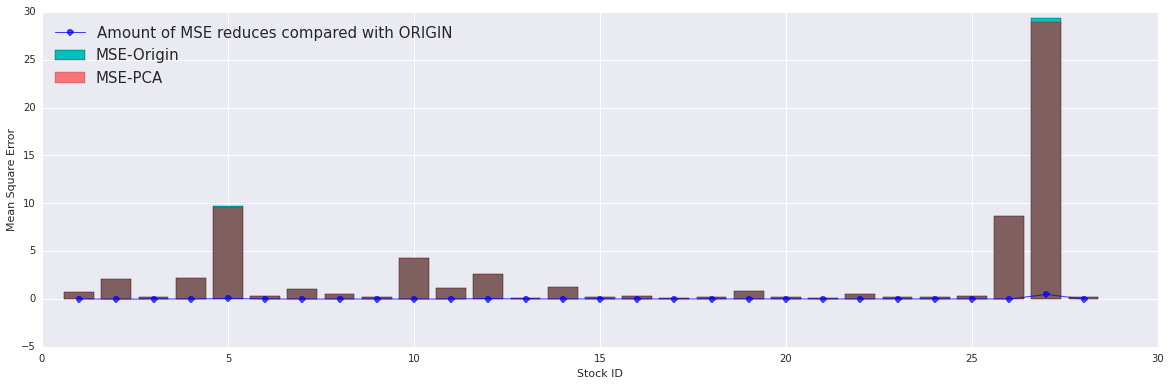

In [59]:
CompareMSEbyFeature(stocksReturns,("Origin",factorsReturns),("PCA",factorsReturn_PCA))

<div class="alert alert-warning">
The linear model still works same as before using PCA. So we conclude the problem is from distribution of factors after using PCA. <br><br>
From our experiment, we conclude that PCA may change distribution the factor so obtained factors from PCA can be more complex so that affects to our final result. In addition, the problem and explaination in log-normal session also contribute to this method that we will do more experiments to evalulate it in near future. 
</div>

<div class="alert bg-primary" style="background-color: rgba(4,229,120,0.8)">

<h2> Using market factor percentage</h2>
</div> 

<div class="alert alert-warning">
Instead of using market factor return, we tried with return percentage, which is ratio between returns of 2 weeks over the first stock price in the window. 
</div>

In [41]:
def calculateReturnPercentage(window):
    # return the change of value after two weeks
    return (window[-1][1] - window[0][1])/float(window[0][1])

def twoWeekReturns(history,ReturnFunction):
    # we use 10 instead of 14 to define the window
    # because financial data does not include weekends
    return [ReturnFunction(entry) for entry in buildWindow(history, 10)]

stocksReturnsPercent= list(map(lambda x:twoWeekReturns(x,calculateReturnPercentage), stocks))
factorsReturnsPercent = list(map(lambda x:twoWeekReturns(x,calculateReturnPercentage), factors))

In [42]:
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(stocksReturnsPercent,factorsReturnsPercent,200000,multivariate_normal)
HyTestMonteCarlo(newTrials,stocksReturnsPercent,newValueAtRisk)

New Value at Risk(VaR) 5%: -0.822130206809
New Conditional Value at Risk(CVaR) 5%: -1.12284972862
num failures: 169 over 1295
Kupiec test p-value:  5.46130769818e-29


In [45]:
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(stocksReturnsPercent,factorsReturnsPercent,200000,multivariate_t_rvs,4)
HyTestMonteCarlo(newTrials,stocksReturnsPercent,newValueAtRisk)

New Value at Risk(VaR) 5%: -1.15337528131
New Conditional Value at Risk(CVaR) 5%: -2.80592706334
num failures: 99 over 1295
Kupiec test p-value:  4.78725846165e-05


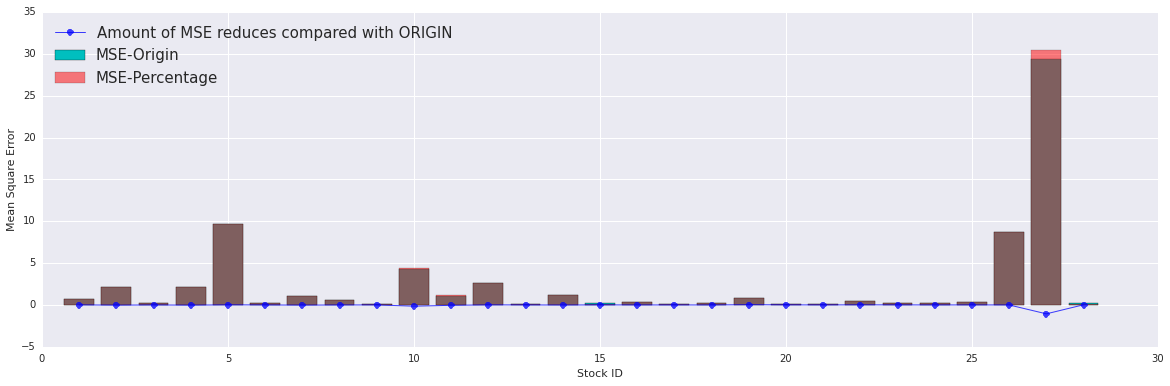

In [51]:
CompareMSEbyFeature(stocksReturns,("Origin",factorsReturns),("Percentage",factorsReturnsPercent))

<div class="alert alert-warning">
Using return percentage does not give us better outcome even we used t-distribution. As we can see that the regression model using return percentage is little worse than original data. 
</div>

<div class="alert bg-primary" style="background-color: rgba(28,180,204,0.8)">
<h2> Autocorrelation  </h2>
</div>

<div class="alert alert-warning"> The idea is about relationship between current stock return and previous stock return. In our opinion, it can be used for regression model so we will do a test to check it first and implement it if the test's result is acceptable.
<br><br> Ljung and Box test, https://www.value-at-risk.net/testing-for-autocorrelations/</div>

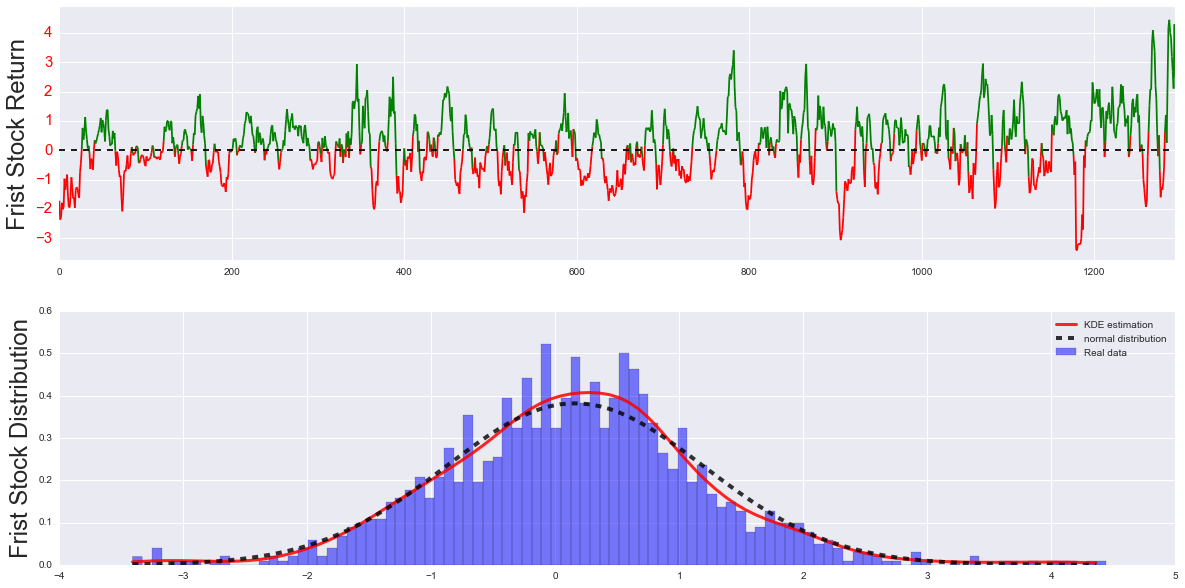

In [44]:
plt.figure(figsize=(20,10))
ind = np.arange(len(stocksReturns[0]))
ax1 = plt.subplot(2,1,1)
data = np.array(stocksReturns[0])
lc1 = threshold_plot(ax1, ind, data, 0, 'r', 'g')
ax1.axhline(0, color='k', ls='--')
ax1.tick_params(axis='y', colors='red',labelsize=15)
ax1.set_ylabel('Frist Stock Return',fontsize=24)

ax2 = plt.subplot(2,1,2)
plotDistribution(stocksReturns[0])
ax2.set_ylabel('Frist Stock Distribution',fontsize=24)
plt.show()

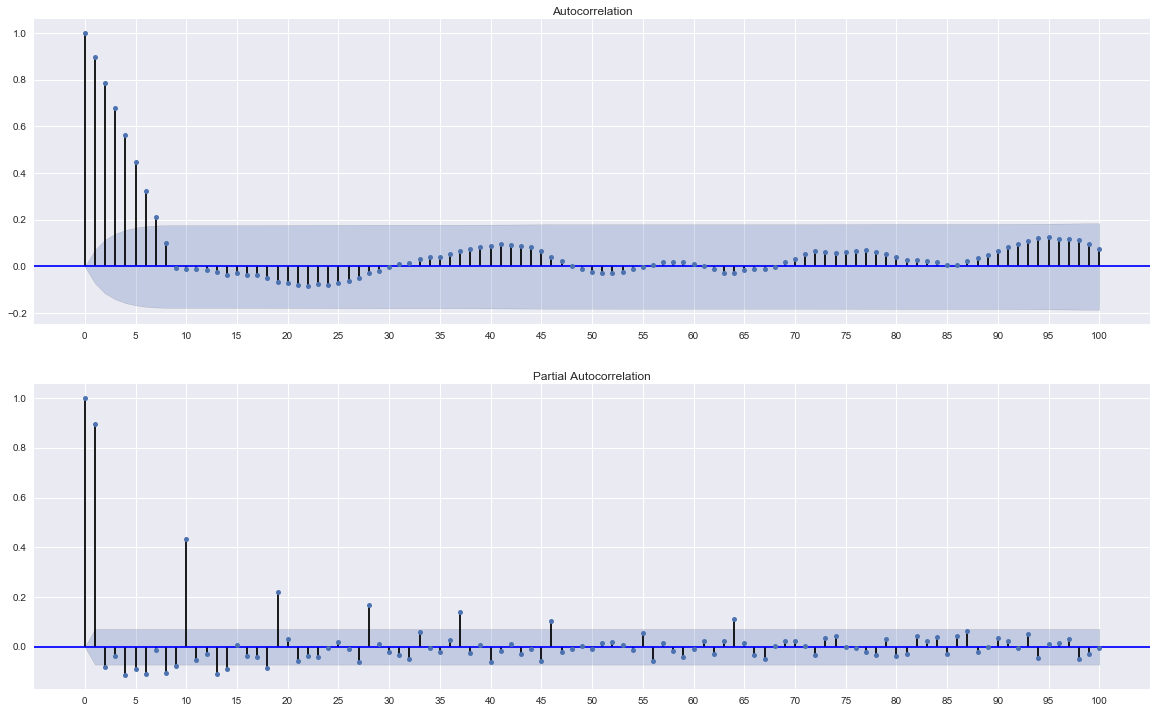

In [46]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2,1,1)
fig = taplot.plot_acf(stocksReturns[0],lags=100,ax=ax1,alpha=0.01)
ax1.set_xticks(np.arange(0, 105, 5))
ax2 = fig.add_subplot(2,1,2)
fig = taplot.plot_pacf(stocksReturns[0],lags=100,ax=ax2,alpha=0.01)
ax2.set_xticks(np.arange(0, 105, 5))
plt.show()

<div class="alert alert-warning"> ACF show you correlation between our stocks return at time t and its lag (t-1, t-2, t-3). From ACF above, our current stock return have strong correlated with return stock at lag 1 to 7 that means it is possible to use that to predict the near futre. The blue region is confidence intervals that all value inside this region will not affect to our regression.
<br><br>
However, PACF give you clearly the autocorrelation between $x_{t}$ and $x_{t+h}$ without the contribution of $x_{t+1}$,$x_{t+2}$,....,$x_{t+h}$. From this, you can see our stock return is truthly autocorrelated with lag 1 and 10. </div>

In [175]:
model_fit = sm.tsa.ARIMA(stocksReturns[0], (1,0,8)).fit(disp=1)
modelSummary = model_fit.summary()
print(modelSummary.tables[0],'\n',modelSummary.tables[1])

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1295
Model:                     ARMA(1, 8)   Log Likelihood                -452.041
Method:                       css-mle   S.D. of innovations              0.338
Date:                Wed, 12 Apr 2017   AIC                            926.082
Time:                        22:35:04   BIC                            982.911
Sample:                             0   HQIC                           947.409
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1627      0.084      1.930      0.054        -0.003     0.328
ar.L1.y        0.0058      0.028      0.207      0.836        -0.049     0.061
ma.L1.y        0.9908      0.007    142.450      0.0

<div class="alert alert-warning"> ARMA = (1,8) is the best parameter we find after many try in ARIMA fiting model. That quite match with the one we analyse that the stock return is strongly correlated with lag 1 and its error can be modeled with MA of order 8. Now we model the stock return with a new feature, 1st oder stock return (1 preceding values in the series)</div>

In [73]:
def ARDataExtract(stocksReturns,factorsReturns,lag):
    stockReturn1lag = list()
    for i in range(lag,0,-1):
        stockReturn1lag.append([stock[lag-i:-i] for stock in stocksReturns])
    newStockReturn = [stock[lag:] for stock in stocksReturns]
    newFactor = [factor[lag:] for factor in factorsReturns]
    return [newStockReturn,newFactor,stockReturn1lag]

In [97]:
def FindParamAutoRegression(factorsReturns,stockReturns,stockReturnKlag,flag=0):
    # transpose factorsReturns
    factorMat = transpose(factorsReturns)
    # featurize each row of factorMat
    factorFeatures = list(map(featurize,factorMat))
    # OLS require parameter is a numpy array
    factor_columns = np.array(factorFeatures)
    #add a constant - the intercept term for each instrument i.
    factor_columns = sm.add_constant(factor_columns, prepend=True)
    # Estimate new weight for linear regression model
    
    new_factor_columns = list()
    weights = list()
    for ind,stock in enumerate(stockReturns):
        
        if (flag ==0):
            # AR case
            extra_factor = np.asarray(GetKLagFactor(stockReturnKlag,ind)).T
        else:
            # MA case
            extra_factor = np.asarray(stockReturnKlag[ind])[:, None]
        
        # add to factor columns
        new_factor_column = np.append(factor_columns,extra_factor,axis=1)
        
        new_factor_columns.append(new_factor_column)
        # fit with regression model
        weights.append(estimateParams(stock,new_factor_column))
        
    return [np.asanyarray(new_factor_columns),weights]

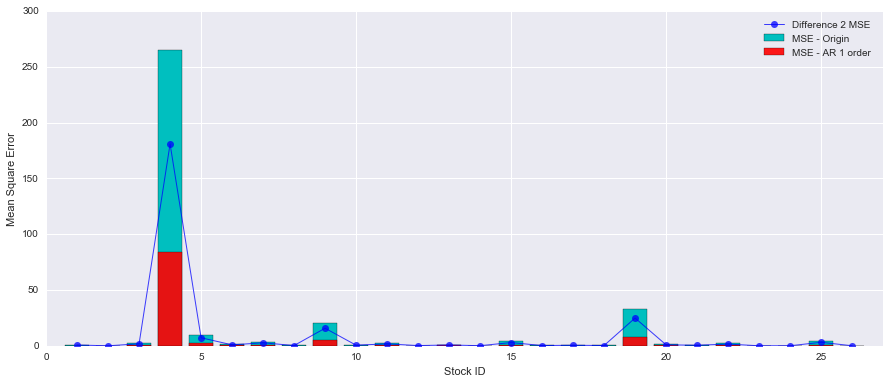

In [315]:
#get prediction 
[factor_columns,weights] = FindParamRegression(factorsReturns,stocksReturns)
weights = np.array(weights).T
prediction = np.dot(factor_columns,weights).T

# get prediction new 
[newStockReturn,newFactor,stockReturn1lag] = ARDataExtract(stocksReturns,factorsReturns,1)
[factor_columns,weights] = FindParamAutoRegression(newFactor,newStockReturn,stockReturn1lag)
weights = np.array(weights)
# predict for each stock
prediction_n = list()
for ind,stock1lag in enumerate(stockReturn1lag[0]):
        # add to factor columns
        prediction_n.append(np.dot(factor_columns[ind],weights[ind]).T.tolist())
        
# compute MSE 
MSE = np.sum((prediction-np.array(stocksReturns))**2,axis=1)/len(stocksReturns[0])
MSE_n = np.sum((prediction_n-np.array(newStockReturn))**2,axis=1)/len(newStockReturn[0])
x = np.arange(1,len(MSE)+1)

# plot data
#sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(15,6))
plt.plot(x,-MSE_n+MSE,'b-o',linewidth=1, label="Difference 2 MSE",alpha=0.75)
plt.bar(x,MSE,0.8, color='c',label="MSE - Origin", alpha = 1,align='center')
plt.bar(x,MSE_n,0.8,color='r', label="MSE - AR 1 order ",alpha=0.9,align='center')
plt.xlim(0,len(weights)+1)
plt.xlabel("Stock ID")
plt.ylabel("Mean Square Error")
plt.legend(loc=1)
plt.show()

<div class="alert alert-warning"> The graph above shows that 1st order stock return contribute effiecient to the model. The mean square error reduces over the half</div>

<div class="alert alert-info"> Now we try with more lag to see how MSE fluctuate. Following the statistic test PACF, our best orders are 1,10,18 because it above the confidence line. </div>

In [99]:
def GetKLagFactor(stockReturnLag,stockIdx):
    re = list()
    for stock in stockReturnLag:
        re.append(stock[stockIdx])
    return re

def ARPrediction(weights,stockReturnKlag, new_factor_columns):
    prediction_n = list()
    for ind,weight in enumerate(weights):
        # get stock factor
        ARfactor = GetKLagFactor(stockReturnKlag,ind)
        # fit with regression model
        prediction_n.append(np.dot(new_factor_columns[ind],weight).T.tolist())
    return prediction_n

In [177]:
np.set_printoptions(precision=2)

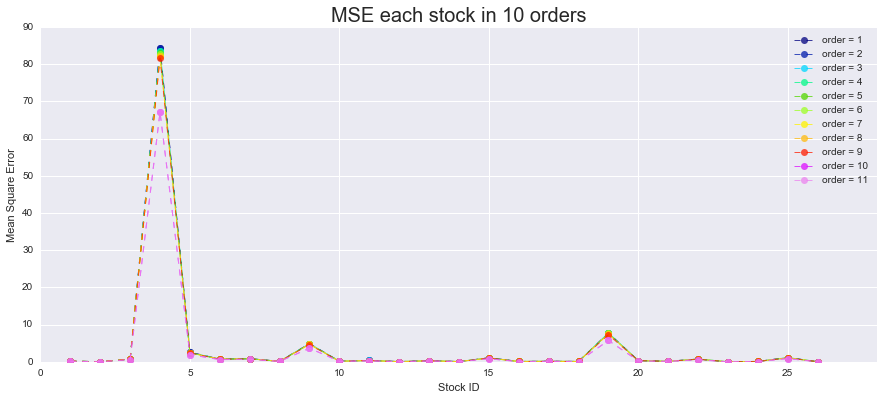

In [204]:
num_plots = 11
plt.figure(figsize=(15,6))
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])
x = np.arange(1,len(weights)+1)
# get prediction new 
for lag in range(1,num_plots+1):
    # get data
    [newStockReturn,newFactor,stockReturnKlag] = ARDataExtract(stocksReturns,factorsReturns,lag)
    
    # find parameter
    [factor_columns,weights] = FindParamAutoRegression(newFactor,newStockReturn,stockReturnKlag)
    weights = np.array(weights)
    # prediction
    prediction = ARPrediction(weights,stockReturnKlag,factor_columns)
    
    MSE_n = np.sum((prediction-np.array(newStockReturn))**2,axis=1)/len(newStockReturn[0])
    
    #plot 
    plt.plot(x,MSE_n,'--o',linewidth=1, label="order = {i}".format(i=lag),alpha=0.75)

plt.xlim(0,len(weights)+2)
plt.xlabel("Stock ID")
plt.ylabel("Mean Square Error")
plt.title("MSE each stock in 10 orders",fontsize=20)
plt.legend(loc=1)
plt.show()

<div class="alert alert-warning"> The graph shows that only order 1 and 10 contributes to our model and others are redundant that we should not put it into the model.

<br><br>
Now the big problem is risen. How can we apply this into our Monte Carlo Simulation? Our new linear regression model follows as:
<p style="text-align:center">$y_{t}=β_0+β_1y_{t−1}+β_2factor_1+β_3factor_2+β_4factor_3+β_5factor_4 $</p>
<br>Unfortunately, after spending lots of time about it I recognize that we shouldn't use this factor in our model. This is some reason.
<il><ul>1. it is intuitive to notice that distribution $y_{t−1}$ is same as $y_{t}$. That means we want to draw the sample in a distribution that we want to predict. That does not make sense</ul>
<ul>2. in case we can find the best distribution to represent our $y_{t}$ so why do we need Monte Carlo simulation? </ul>
<ul>3. in case we assume that we use the best distribution to draw the sample, it still leads to another problem that our prediction is only correct if we can sample approxiamately correctly from distribution of variables. So it is a hug problem if we accept our assumption.</ul></il>

<br> The last statement let me think that Moving Average can work in this case. Bacause the data point now is an average of stock price over time. Our curve now is smoothed and we hopefully can find the good distribution for representing it
</div>





<div class="alert bg-primary" style="background-color: rgba(28,180,204,0.8)">
<h2> Moving Average </h2>
</div>

In [293]:
def MADataExtract(stocksReturns,factorsReturns,lag):
    stockReturn1lag = list()
    for stock in stocksReturns:
        stockReturn1lag.append([np.average(stock[i-lag:i]) for i in range(lag,len(stocksReturns[0]))])
        
    newStockReturn = [stock[lag:] for stock in stocksReturns]
    newFactor = [factor[lag:] for factor in factorsReturns]

    return [newStockReturn,newFactor,stockReturn1lag]

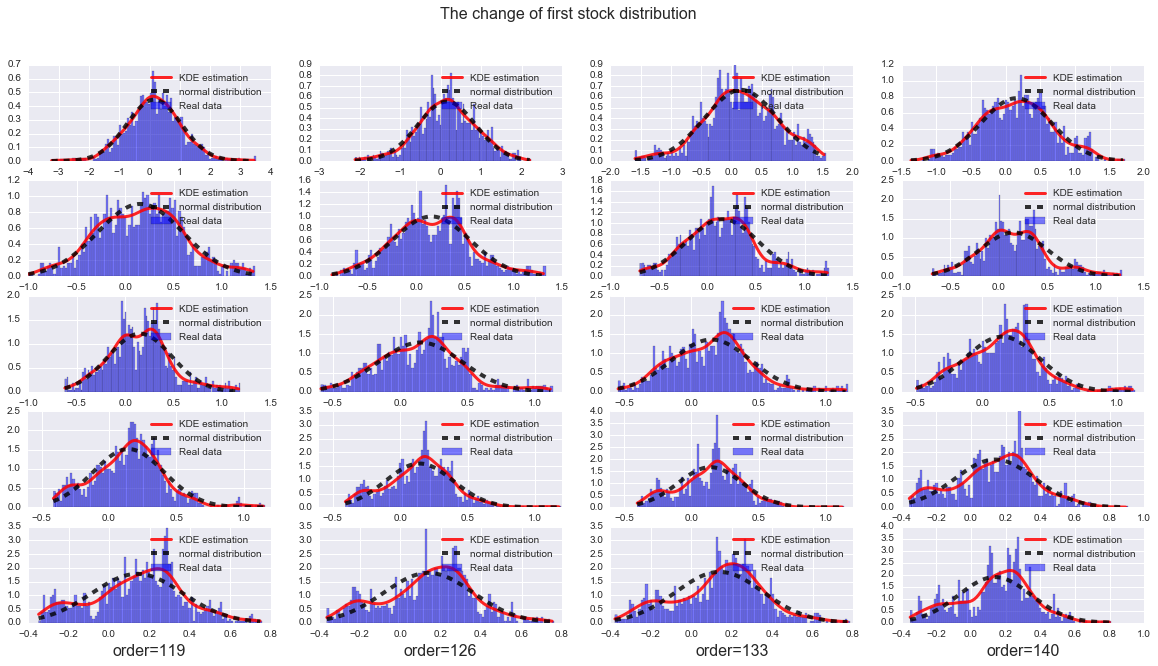

In [381]:
fig, ax = plt.subplots(5,4,figsize=(20,10))
fig.suptitle("The change of first stock distribution",fontsize = 16)
for i in range (1,21):
    plt.subplot(5,4,i)
    [newStocksReturn,newFactors,stocksReturnlag] = MADataExtract(stocksReturns,factorsReturns,i*7)
    plotDistribution(stocksReturnlag[0])
    plt.xlabel('order={}'.format(i*7),fontsize=16)
plt.show()

<div class="alert alert-warning"> 
Using moving average not only does not helps us obtaining simplier the distribution (rougher) but also change the shape over the order. So it is not good to use this feaature for building new model. From these analysis, it is not efficient to carry on experiments so I drop out this idea.
</div>





<div class="alert bg-primary" style="background-color: rgba(28,180,204,0.8)">
<h2> Heteroscedasticity problem and Breush-Pagan Lagrange Multiplier test </h2>
</div>

## Heteroscedasticity

homoskedastic | heteroscedasticity
- | - 
![alt](https://static1.squarespace.com/static/4f5694c424aca8d4f8e69194/t/51e9f5c7e4b002e3d8f53e58/1374287304298/Rplot.income.jpg?format=500w) | ![alt](https://static1.squarespace.com/static/4f5694c424aca8d4f8e69194/t/51e9f5d6e4b07ef008368d84/1374287319317/Rplot.income.cone.jpg?format=500w)

<div class="alert alert-info">
Heteroscedasticity happens regularily in time series data. In linear regression, if our samples are drawn from identical distribution across every X, then the error terms are homoskedastic, which means the errors have the same scatter. When the scatter of the errors is different, it can depend on others varibles, the error terms are heteroskedastic. 
<br><br>
Figure on the right shows the same model with heteroskedasticity, The vertical spread of the data around the predicted line is clearly increasing as X increase.


</div>

## Breusch–Pagan test

<div class="alert alert-info">
As I mentions, the main reason of heteroskedasticity is $variance$ varies based on the independent variables. The idea of the Breushch Pagan test is came from it. Given the null hypothesis $H_0$ that their $variance$ does not depend on the independent variables, then alternative hypothesis $H_1$ we can model our variance. Estimation of this variance can be obtained from the average of the squared values of the residuals. 
<br>
<p style="text-align:center">$Var(ϵ|x_i)=E[ϵ^2|x_i]−(E[ϵ|x_i])^2$</p>
<br>

With OLS constrains, their mean is 0, $(E[ϵ|x_i])^2=0$. So $Var(ϵ|x_i))=E[ϵ^2|x_i]$, the residuals ${\displaystyle {\hat {u}}}^2$, obtained from linear model and so, we have regression equation of the form

<br>
<p style="text-align:center">${\hat {u}}^{2}=\gamma _{0}+\gamma _{1}x+v.\,$</p>
<br>
<p > so now we can define again our null hypothesis $H_0$ that $\gamma_1 = \gamma_2 = ... = 0$, alternative hypothesis $H_1$ $\gamma_1 \ne 0, \gamma_2 \ne 0 |...$</p>
</div>



In [94]:
def getKColumnVar(factor_columns,nVarTest):
    return factor_columns[:,0:nVarTest]
def BreuschPaganTest(prediction,newStockReturn,factor_columns,nVarTest=0):
    residual = prediction-np.array(newStockReturn)
    residual_all = np.sum((prediction-np.array(newStockReturn))**2,axis=0)/len(newStockReturn[0])
    #residual_all = np.sum((prediction_n-np.array(newStockReturn))**2,axis=0)/len(newStockReturn[0])
    factor_column_all = getKColumnVar(factor_columns[0],nVarTest) if len(np.shape(factor_columns))!=2 else factor_columns
        
    print('{}'.format(''.join(['#']*100))
          ,'\nBreusch–Pagan test on Residuals of first 35 stock with p-value='
          , tsd.het_breushpagan(residual_all,factor_column_all)[3],
         '\n{}'.format(''.join(['#']*100)))
    
    # RESIDUAL TEST on residual of each stock    
    pvalueList = list()
    for i in range(1,len(residual)+1):
        # check whether
        if (len(np.shape(factor_columns))==2):
            pvalueList.append(tsd.het_breushpagan(residual[i-1],factor_columns)[3])
        else:
            pvalueList.append(tsd.het_breushpagan(residual[i-1],factor_columns[i-1])[3])
        print('Breusch–Pagan test on Residuals of stock {} with p-value={}'.format(i , pvalueList[-1]))
    return pvalueList

In [103]:
# MODEL WITH FIRST 35 STOCKS - 4 FACTOR AFTER FACTORIZE
[factor_columns,weights] = FindParamRegression(factorsReturns,stocksReturns)
weights = np.array(weights).T
prediction = np.dot(factor_columns,weights).T
pvalueStocks_o = BreuschPaganTest(prediction,stocksReturns,factor_columns)

#################################################################################################### 
Breusch–Pagan test on Residuals of first 35 stock with p-value= 0.00698423497401 
####################################################################################################
Breusch–Pagan test on Residuals of stock 1 with p-value=0.00018483799294328335
Breusch–Pagan test on Residuals of stock 2 with p-value=0.0088445885217067
Breusch–Pagan test on Residuals of stock 3 with p-value=0.0012075834816196922
Breusch–Pagan test on Residuals of stock 4 with p-value=0.03064025677097601
Breusch–Pagan test on Residuals of stock 5 with p-value=0.00026885642966015206
Breusch–Pagan test on Residuals of stock 6 with p-value=0.027867905838338775
Breusch–Pagan test on Residuals of stock 7 with p-value=0.3024260353995923
Breusch–Pagan test on Residuals of stock 8 with p-value=6.799725191106726e-05
Breusch–Pagan test on Residuals of stock 9 with p-value=0.0003532758158218891
Breusch–Pagan test o

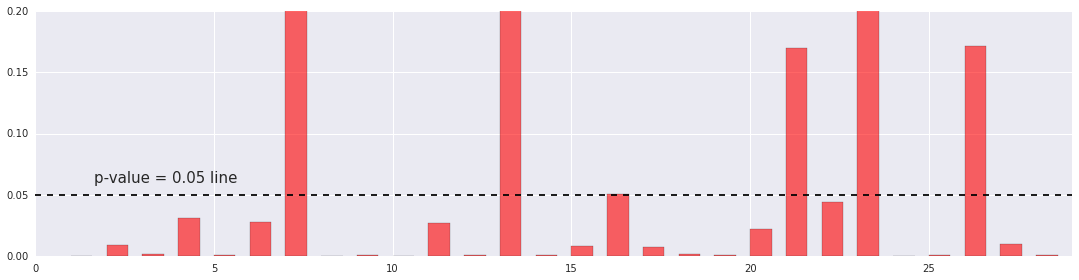

In [113]:
fig =plt.figure(figsize=(15,4))
x = np.arange(1,len(stocksReturns)+1)


plt.bar(x,np.array(pvalueStocks_o),width=0.6,color='r', label="p-value - lag = {i}".format(i=lag),alpha=0.6,)
plt.axhline(0.05, color='k', ls='--')
plt.text(1.65, 0.06, r'p-value = 0.05 line', fontsize=15)
plt.xlim(0,len(stocksReturns)+1)
plt.tight_layout()
plt.ylim(0,0.2)
plt.show()

<div class="alert alert-warning"> 
The result shows that we reject our null hypothesis that variance does not change by time. Our linear regression model does not really good in case of capturing information of target variable. With linear model with 4 factors, we obtain 5 stocks can pass the test. In next step below, we add first-order data, which give us better results in regression, and obtained 16 stocks passing the test.</div>

In [101]:
lag = 1
# get data
[newStockReturn,newFactor,stockReturnKlag] = ARDataExtract(stocksReturns,factorsReturns,lag)
# find parameter
[factor_columns,weights] = FindParamAutoRegression(newFactor,newStockReturn,stockReturnKlag)
weights = np.array(weights)
# prediction
prediction = ARPrediction(weights,stockReturnKlag,factor_columns)
pvalueStocks = BreuschPaganTest(prediction,newStockReturn,factor_columns,13)


#################################################################################################### 
Breusch–Pagan test on Residuals of first 35 stock with p-value= 0.910850397647 
####################################################################################################
Breusch–Pagan test on Residuals of stock 1 with p-value=0.0011556029973386393
Breusch–Pagan test on Residuals of stock 2 with p-value=0.11966392281081238
Breusch–Pagan test on Residuals of stock 3 with p-value=0.45926633072943635
Breusch–Pagan test on Residuals of stock 4 with p-value=0.12666423569706392
Breusch–Pagan test on Residuals of stock 5 with p-value=3.3868841794688224e-05
Breusch–Pagan test on Residuals of stock 6 with p-value=0.01386495294075903
Breusch–Pagan test on Residuals of stock 7 with p-value=0.3805788891703444
Breusch–Pagan test on Residuals of stock 8 with p-value=0.23073319943401976
Breusch–Pagan test on Residuals of stock 9 with p-value=0.9839981062548726
Breusch–Pagan test on Residual

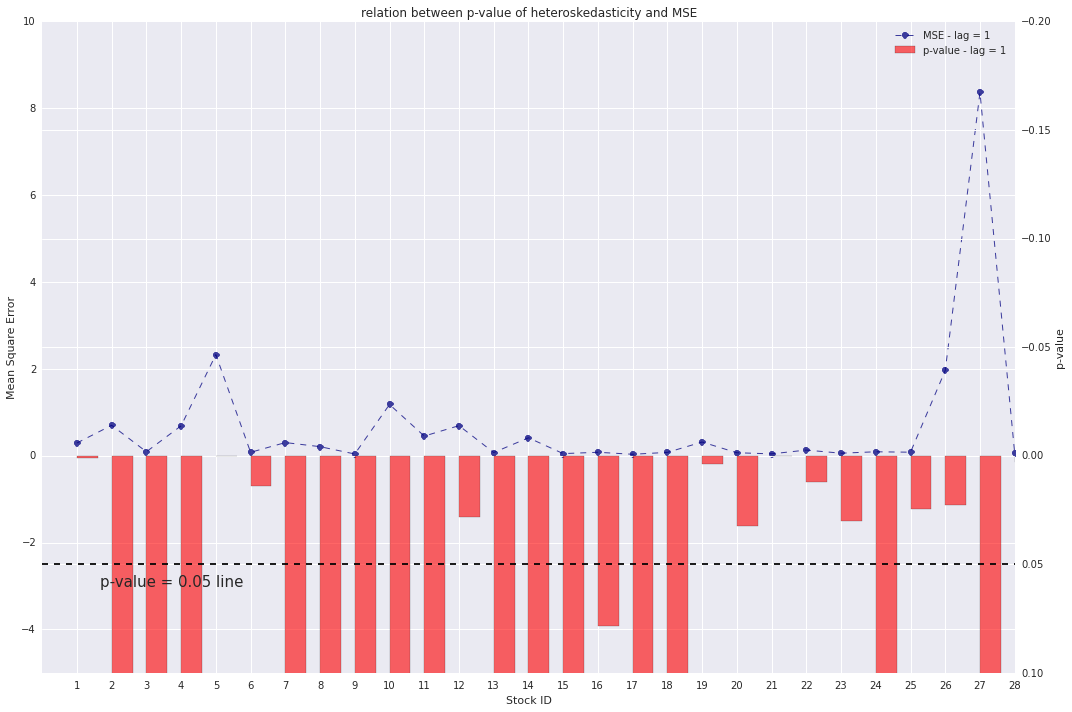

In [102]:
num_plots = 1
fig =plt.figure(figsize=(15,10))
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])
x = np.arange(1,len(weights)+1)
# get prediction new 

ax = fig.add_subplot(1,1,1)
ax.set_xticks(x)
ax2 = ax.twinx()
ax.set_xlabel("Stock ID")
ax.set_ylabel("Mean Square Error")
ax2.set_ylabel("p-value")
ax.set_ylim(-5,10)
ax2.set_ylim(0.1,-0.2,-0.01)
plt.grid(True,which="both",ls="-")
plt.title('relation between p-value of heteroskedasticity and MSE')


for lag in range(1,num_plots+1):
    # get data
    [newStockReturn,newFactor,stockReturnKlag] = ARDataExtract(stocksReturns,factorsReturns,lag)
    
    # find parameter
    [factor_columns,weights] = FindParamAutoRegression(newFactor,newStockReturn,stockReturnKlag)
    weights = np.array(weights)
    
    # prediction
    prediction = ARPrediction(weights,stockReturnKlag,factor_columns)
    MSE_n = np.sum((prediction-np.array(newStockReturn))**2,axis=1)/len(newStockReturn[0])
    
    #plot 
    ax.plot(x,MSE_n,'--o',linewidth=1, label="MSE - lag = {i}".format(i=lag),alpha=0.75)
    ax2.bar(x,np.array(pvalueStocks),width=0.6,color='r', label="p-value - lag = {i}".format(i=lag),alpha=0.6,)
    ax2.axhline(0.05, color='k', ls='--')
    ax2.text(1.65, 0.06, r'p-value = 0.05 line', fontsize=15)
plt.xlim(0,len(weights))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> 
The result after we applied autoregression is much better than just using market factor. Almost linear model remove the Heteroscedasticity affect but there still some stocks are still bad with our regression model.
<br><br>
After doing a test and looking the last graph (MSE and p-value), I notice that MSE value that why it is low but not passing the test that means its residual square's variance is not homoskedastic. I rise an question for myself **"Does heterskedasticity truthly affect to our Monte Carlo Simulation? and how does it affect?"**. After I am stuck for a long time, now I have some explaination and idea for this as:

<il><ul>1. The mean and variance of stock returns are different in each stock. There are some stocks have very high loss or gain returns over 2 weeks (absolute value can be up to 60), others have very low return (it can be around 0.2~0.4). If your regression is bad, mean square error of high return tends to be higher than ones having low return.  </ul>
<ul>2. From my explaination above, we can see that it is hard to say the relation between stock returns' mean square error and value itself. So the heteroskedasticity test p-value shows you that your model does not model target variable well, which make residual variance not stationary. In my opinion, it will somehows affect to monte carlo simulation. I will exlain more in future work </ul>
</il>

</div>

<div class="alert bg-primary" style="background-color: rgba(4,229,120,0.8)">

<h2>Add more market factor to receive more information </h2>
</div> 

In [94]:
def readYahooHistory(fname):
    def process_line(line):
        cols = line.split(',')
        date = datetime.strptime(cols[0], '%d/%m/%Y')
        value = float(cols[1])
        return (date, value)
    
    with open(fname) as f:
        content_w_header = f.readlines()
        # remove the first line 
        # and reverse lines to sort the data by date, in ascending order
        content = content_w_header[-1:0:-1]
        return list(map(process_line , content))

In [46]:
new_factors_folder= "marketFactor/"
new_factor_files = ['DJI.csv','N225.csv','RUT.csv','VIX.csv']
new_factor_files = map(lambda fn: new_factors_folder + fn, new_factor_files)
new_factors = [readYahooHistory(f) for f in new_factor_files]

In [47]:
new_allfactors = allfactors + new_factors
new_factors_ls = list(map( lambda factor:
            fillInHistory_fix(trimToRegion(factor,start,end),start,end), 
            new_allfactors))
new_factorsReturns = list(map(twoWeekReturns, new_factors_ls))

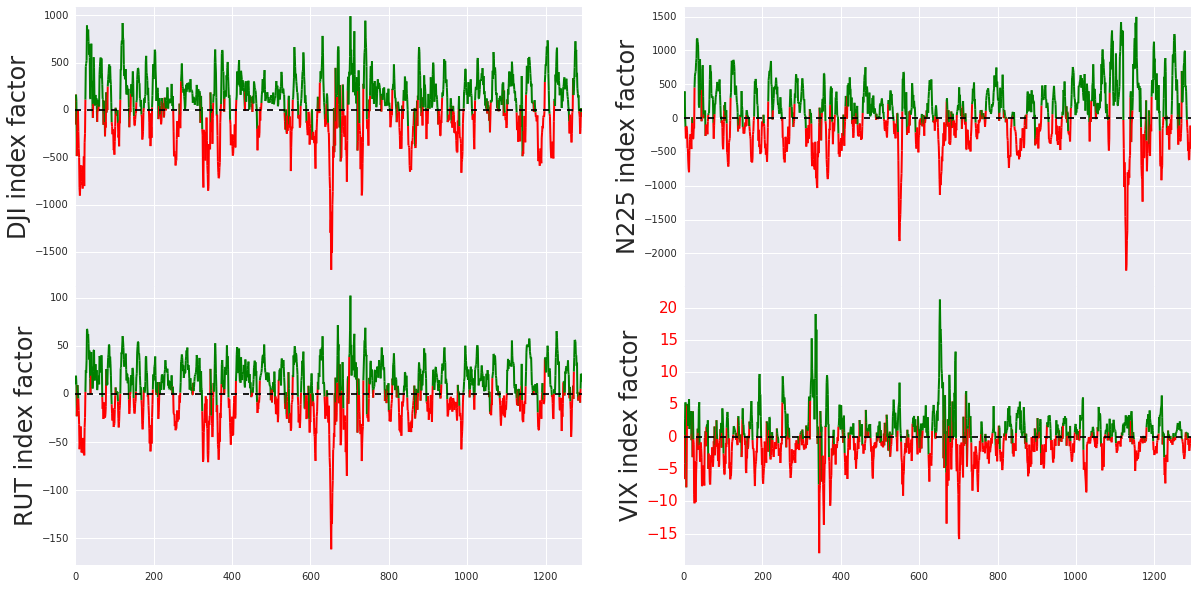

In [48]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0)

ind = np.arange(len(new_factorsReturns[4]))

ax1 = plt.subplot(2,2,1)
data = np.array(new_factorsReturns[4])
lc1 = threshold_plot(ax1, ind, data, 0, 'r', 'g')
ax1.axhline(0, color='k', ls='--')
ax1.set_ylabel('DJI index factor',fontsize=24)

lc1.set_linewidth(2)

ax2 = plt.subplot(2,2,2,sharex=ax1)
data = np.array(new_factorsReturns[5])
lc2 = threshold_plot(ax2, ind, data, 0, 'r', 'g')
ax2.axhline(0, color='k', ls='--')
#ax2.tick_params(axis='y', colors='red',labelsize=15)
lc2.set_linewidth(2)
ax2.set_ylabel('N225 index factor',fontsize=24)


ax3 = plt.subplot(2,2,3,sharex=ax1)
data = np.array(new_factorsReturns[6])
lc3 = threshold_plot(ax3, ind, data, 0, 'r', 'g')
ax3.axhline(0, color='k', ls='--')
lc3.set_linewidth(2)
ax3.set_ylabel('RUT index factor',fontsize=24)


ax4 = plt.subplot(2,2,4,sharex=ax1)
data = np.array(new_factorsReturns[7])
lc4 = threshold_plot(ax4, ind, data, 0, 'r', 'g')
ax4.axhline(0, color='k', ls='--')
lc4.set_linewidth(2)
ax4.set_ylabel('VIX index factor',fontsize=24)
ax4.tick_params(axis='y', colors='red',labelsize=15)

xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.show()

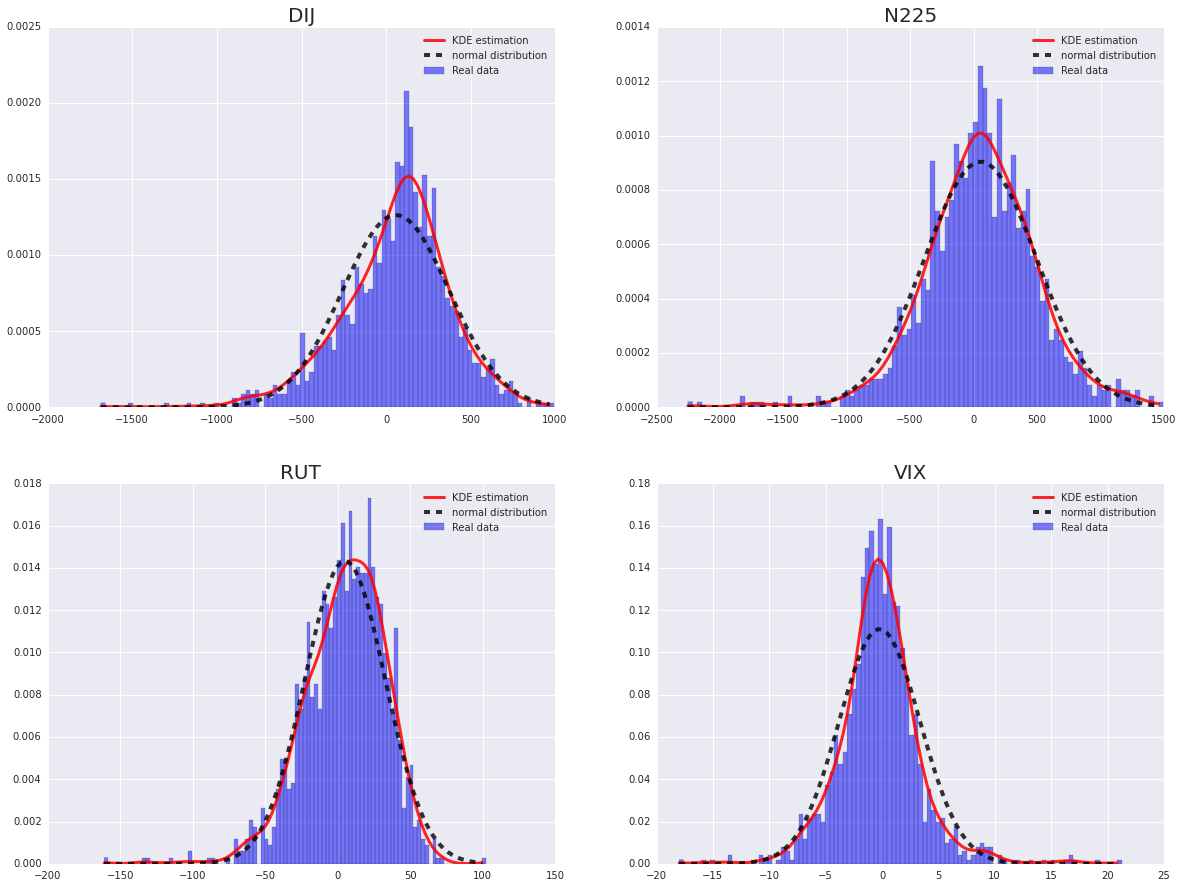

In [49]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('DIJ',fontsize=20)
plotDistribution(new_factorsReturns[4])
plt.subplot(2,2,2)
plt.title('N225',fontsize=20)
plotDistribution(new_factorsReturns[5])
plt.subplot(2,2,3)
plt.title('RUT',fontsize=20)
plotDistribution(new_factorsReturns[6])
plt.subplot(2,2,4)
plt.title('VIX',fontsize=20)
plotDistribution(new_factorsReturns[7])
plt.show()

<div class="alert alert-warning"> 
I just want to show the overview of new factors. The normal distribution seem only match with RUT and N255 factor.
</div>

In [101]:
np.set_printoptions(precision=2)
correlation = np.corrcoef(new_factorsReturns)
print("\tOil\tBond   GSPC   IXIC   DIJ    N225   RUT    VIX")
correlation

	Oil	Bond   GSPC   IXIC   DIJ    N225   RUT    VIX


array([[ 1.  ,  0.39,  0.41,  0.44,  0.38,  0.28,  0.44, -0.42],
       [ 0.39,  1.  ,  0.46,  0.5 ,  0.43,  0.34,  0.47, -0.49],
       [ 0.41,  0.46,  1.  ,  0.92,  0.97,  0.63,  0.93, -0.72],
       [ 0.44,  0.5 ,  0.92,  1.  ,  0.86,  0.58,  0.93, -0.73],
       [ 0.38,  0.43,  0.97,  0.86,  1.  ,  0.62,  0.87, -0.67],
       [ 0.28,  0.34,  0.63,  0.58,  0.62,  1.  ,  0.59, -0.44],
       [ 0.44,  0.47,  0.93,  0.93,  0.87,  0.59,  1.  , -0.7 ],
       [-0.42, -0.49, -0.72, -0.73, -0.67, -0.44, -0.7 ,  1.  ]])

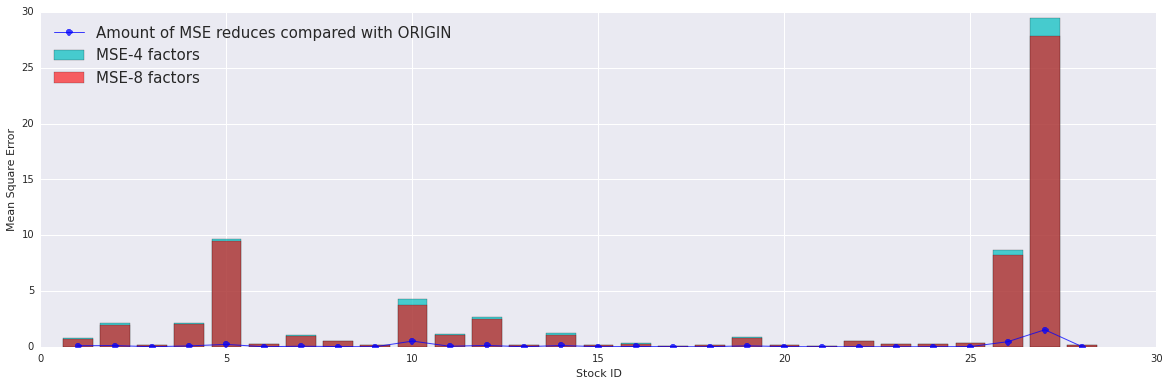

In [103]:
CompareMSEbyFeature(stocksReturns,("4 factors",factorsReturns),("8 factors",new_factorsReturns))

<div class="alert alert-warning"> 
From correlation matrix, we can see that GSPCS, IXIC and DIJ have high correlation with RUT factor, while they are negative correlation with VIX factor. 
<br><br>
In addition, the regression model works well with new factors. Mean square errors decreases on almost stock return regression. We will show you how much the Monte carlo simulation increase in performance in next step.
</div>

In [50]:
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(stocksReturns,new_factorsReturns,150000,multivariate_normal)
HyTestMonteCarlo(newTrials,stocksReturns,newValueAtRisk)

New Value at Risk(VaR) 5%: -21.0552704116
New Conditional Value at Risk(CVaR) 5%: -27.3293573779
num failures: 88 over 1295
Kupiec test p-value:  0.00483662649563


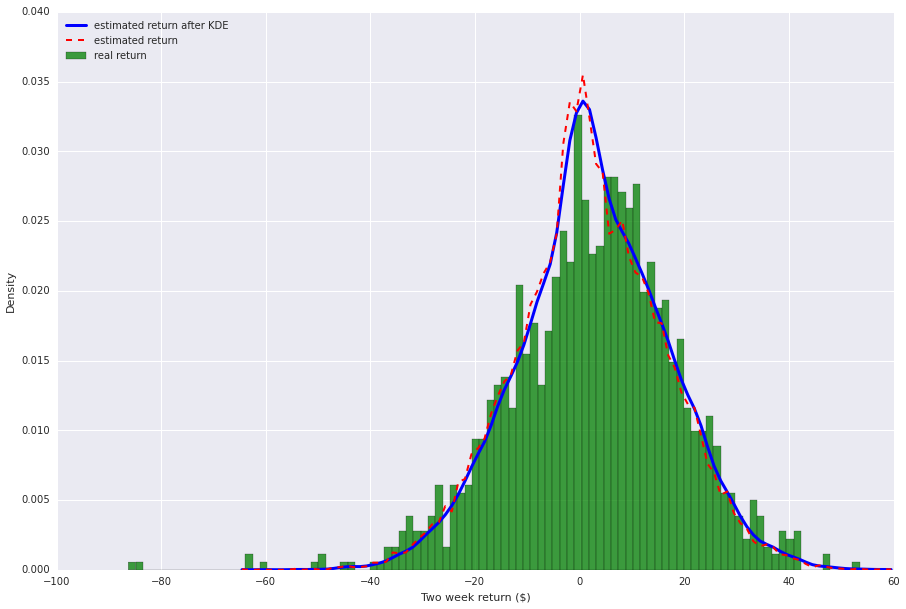

In [51]:
VisualizeAfterModel(newTrials.collect(),stocksReturns) #.collect()

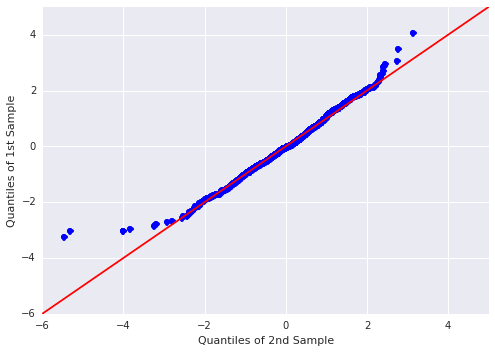

Stocks Return from real data vs from our simulation: p-value= 0.00616576864887


In [52]:
pp_y = sm.ProbPlot(np.array(ReturnOfAllStock(stocksReturns)),fit=True)
pp_x = sm.ProbPlot(np.array(newTrials.collect())[0:len(np.array(ReturnOfAllStock(stocksReturns)))],fit=True)
fig = pp_x.qqplot(line='45',other=pp_y)
plt.show()
allStocksReturn = ReturnOfAllStock(stocksReturns)
print("Stocks Return from real data vs from our simulation: p-value=", 
      stats.ks_2samp(newTrials.collect()
                     ,allStocksReturn)[1])

<div class="alert alert-warning">
Wow the result is improve so much after adding more factors and even use just normal distribution for estimating our factor, compared with 7.59066940728e-08 we obtained without using new factors. That means new factors they contributes well for your stock return prediction. However, our final distribution of total stocks return still do not match with our simulation on the tail of the distribution. 

</div>

In [58]:
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(stocksReturns,new_factorsReturns,150000,multivariate_t_rvs,9)
HyTestMonteCarlo(newTrials,stocksReturns,newValueAtRisk)

New Value at Risk(VaR) 5%: -24.1682986565
New Conditional Value at Risk(CVaR) 5%: -33.1979475323
num failures: 65 over 1295
Kupiec test p-value:  0.974586731683


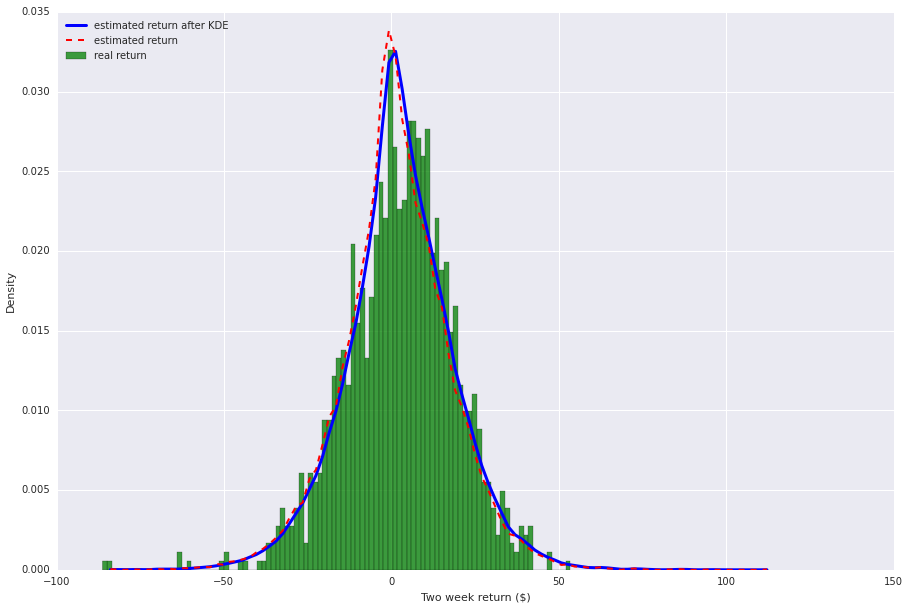

In [59]:
VisualizeAfterModel(newTrials.collect(),stocksReturns) 

<div class="alert alert-warning"> 
Using t-distribution, we obtains the best result with degree of freedom as 9.0. 65 over 1295 failures is equal exactly 95% confidence level over two weeks. 
</div>

<div class="alert bg-primary" style="background-color: rgba(28,180,204,0.8)">
<h2> Feature Selection - Lasso </h2>
</div>

<div class="alert alert-warning">
One of the problem after we add more factors into our model is to make it more complex. There are some unessential features inside our model which can make model's performance worse. In this section, we tried to use L1 Regularization - Lasso to find out which feature is good for our model and remove unneccessary feature.
<br><br>
Regularization is a method for adding **penalty** to a model, with the goal of preventing overfitting and improving generalization. Instead of minimizing a loss function E(X,Y), the loss function to minimize becomes $E(X,Y)+α‖w‖$, where w is the vector of model coefficients, ‖⋅‖ is typically L1 or L2 norm and α is a tunable free parameter, specifying the amount of regularization (so α=0 implies an unregularized model). In this case, I will use L1 regularization, called Lasso
<br><br>
Lasso regularization adds a penalty $α∑_{i=1}^n|w_i|$ to the loss function. Each non-zero coefficient adds to the penalty, it forces weak features to have zero as coefficients. Thus Lasso produces sparse solutions, inherently performing feature selection.
<br><br>
Reference: http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
</div>

In [49]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
from sklearn import preprocessing
  
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

# standardize the data to apply the lasso 
feature = transpose(featurize(new_factorsReturns))
X = preprocessing.scale(feature)
Y = stocksReturns[0]
featureName = ['Oil','Bond', 'GSPC','IXIC','DIJ','N225','RUT','VIX']
names = ['square' + s for s in featureName]+['root'+ s for s in featureName]+featureName

In [50]:
coefAlphaLasso = list()
alphaList = [0.00001,0.0001,0.001,0.01,0.1]
for alpha in alphaList:
    # run lasso fitting
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, Y)
    
    coefAlphaLasso.append(lasso.coef_.tolist())
    
featuresDF = pd.DataFrame(np.transpose(coefAlphaLasso),columns=['1e-5','1e-4','1e-3','1e-2','1e-1'],index=names)
featuresDF[(featuresDF<0.01) & (featuresDF>-0.01)] = -float('Inf')
featuresDF.sort(['1e-1','1e-2','1e-3','1e-4','1e-5'],ascending=False)

1e-5      1e-4      1e-3      1e-2      1e-1
RUT         1.650017  1.648821  1.548908  0.728917  0.509156
rootN225   -0.034779 -0.026367      -inf  0.044199  0.026786
rootBond   -0.041684 -0.034132      -inf  0.052585      -inf
N225        0.185569  0.172686  0.120499  0.043893      -inf
squareVIX   0.016919  0.024407  0.063873  0.043570      -inf
rootGSPC    0.459572  0.426038  0.040973 -0.020165      -inf
squareBond -0.111563 -0.108488 -0.097985 -0.034532      -inf
squareOil       -inf -0.010080 -0.046389 -0.045342      -inf
rootIXIC   -0.439783 -0.411220 -0.196586 -0.126423      -inf
squareGSPC  1.359804  1.311742  0.762147      -inf      -inf
DIJ         1.349342  1.275945  0.433899      -inf      -inf
Bond        0.171597  0.161392  0.117720      -inf      -inf
squareIXIC -0.225701 -0.195481  0.011760      -inf      -inf
squareN225 -0.056370 -0.051088 -0.027396      -inf      -inf
rootVIX    -0.090593 -0.082395 -0.034313      -inf      -inf
rootDIJ    -0.574408 -0.538948 -0.129892      -inf      -inf
rootRUT    -0.452371 -0.449699 -0.384950      -inf      -inf
squareRUT  -0.513948 -0.518092 -0.489262      -inf      -inf
squareDIJ  -1.093795 -1.047625 -0.530455      -inf      -inf
GSPC       -1.486464 -1.412623 -0.560517      -inf      -inf
IXIC        0.436474  0.383938      -inf      -inf      -inf
VIX         0.091000  0.077350      -inf      -inf      -inf
rootOil     0.062061  0.052849      -inf      -inf      -inf
Oil        -0.085516 -0.071099      -inf      -inf      -inf

<div class="alert alert-warning"> 
Because we evaluate significance of features based on coefficience, so we have to standardize factors return at the beginning. In here, I use normalization that means convert our data to zero mean and unit variance. There are exist other ways such as scaling to interval [0,1],binarization,...
<br><br>With larger alpha, that means more coefficience (weights) add to penaty. It forces weak features's coefficence becomes 0 that leads our solution is sparser. From our experiment, RUT and OIL factors contain more information for our model than other factors. 
</div>

In [51]:
def simulateTrialReturnsCustomFeature(numTrials, factorMeans, factorCov, weights, customFeatureList, multivariate_func, *arg):
    trialReturns = []
    for i in range(0, numTrials):
        # generate sample of factors' returns
        [trialFactorReturns] = multivariate_func(factorMeans,factorCov,1,*arg)
        # featurize the factors' returns
        trialFeatures = featurizeCustom(list(trialFactorReturns),customFeatureList)
        # insert weight for intercept term
        trialFeatures.insert(0,1)
        # calculate the return of each instrument
        trialTotalReturn = np.dot(weights,trialFeatures)
        # then calulate the total of return for this trial features
        trialTotalReturn = sum(trialTotalReturn)
        
        trialReturns.append(trialTotalReturn)
    return trialReturns

def featurizeCustom(factorRow,customFeatureList):
    arr = np.array(factorRow)
    featureReturn = list()
    for item in customFeatureList:
        idx = featureName.index(item[0])
        if item[1][0] == 1:
            featureReturn.append(factorRow[idx])
        if item[1][1] == 1:
            featureReturn.append(np.power(factorRow[idx],2)*np.sign(factorRow[idx]))
        if item[1][2] == 1:
            featureReturn.append(np.sqrt(np.abs(factorRow[idx]))*np.sign(factorRow[idx]))
    return featureReturn


def FactorParameterCustomFeature(stocksReturns,factorsReturns,customFeatureList):
    # Cov and Mean
    factorCov = np.cov(factorsReturns)
    factorMeans = [sum(x)/len(x) for x in factorsReturns]
    
    # transpose factorsReturns
    factorMat = transpose(factorsReturns)
    # featurize each row of factorMat
    factorFeatures = list(map(lambda x: featurizeCustom(x,customFeatureList),factorMat))
    # OLS require parameter is a numpy array
    factor_columns = np.array(factorFeatures)
    #add a constant - the intercept term for each instrument i.
    factor_columns = sm.add_constant(factor_columns, prepend=True)
   
    # Estimate new weight for linear regression model
    weights = [estimateParams(stockReturns,factor_columns) for stockReturns in stocksReturns]
    return [factorMeans,factorCov,weights,factor_columns]

# OFFLINE VERSION
def MonteCarloGeneralEstimateCustomFeature(newStocksReturns,factorsReturns,customFeatureList,numTrials,multivariate_func,*arg):
    # Estimate new weight for linear regression model
    param = FactorParameterCustomFeature(newStocksReturns,factorsReturns,customFeatureList)
    
    
    #Spark parallel
    parallelism = 12
    trial_indexes = list(range(0, parallelism))
    seedRDD = sc.parallelize(trial_indexes, parallelism)
    bNewFactorWeights = sc.broadcast(param[2])
    
    # Simulation
    newTrials = seedRDD.flatMap(lambda idx: simulateTrialReturnsCustomFeature(
                    max(int(numTrials / parallelism), 1),
                    param[0], param[1],
                    bNewFactorWeights.value,customFeatureList,multivariate_func,*arg))
    newTrials.cache()
    
    newValueAtRisk = fivePercentVaR(newTrials)
    newConditionalValueAtRisk = fivePercentCVaR(newTrials)

    print("New Value at Risk(VaR) 5%:", newValueAtRisk)
    print ("New Conditional Value at Risk(CVaR) 5%:", newConditionalValueAtRisk)
    return [newTrials,newValueAtRisk]


    #newTrials = simulateTrialReturnsCustomFeature(
    #                numTrials, 
    #                param[0], param[1],
    #                param[2],customFeatureList,multivariate_func,*arg)
    #newValueAtRisk = fivePercentVaROff(newTrials)    

In [114]:
!pip install --upgrade scikit-learn 

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [52]:
from sklearn.model_selection import KFold

In [53]:
#from sklearn.model_selection import KFold
def trainingOLS(stocksReturns,factorsReturns,selectedFeature):
    ##Train
    [a,b,weights,factor_columns] = FactorParameterCustomFeature(
                        stocksReturns,factorsReturns,selectedFeature)
    weights = np.array(weights).T
    return weights
    
def calculateMSE(stocksReturns,factorsReturns,selectedFeature,weights):
    ##Test
    # Featurize test factor
    factorMat = transpose(factorsReturns)
    factorFeatures = list(map(lambda x: featurizeCustom(x,selectedFeature),factorMat))
    factor_columns = np.array(factorFeatures)
    factor_columns = sm.add_constant(factor_columns, prepend=True)
    
    # prediction
    prediction = np.dot(factor_columns,weights).T
        
    #MSE
    #print(np.shape(np.sum((prediction-np.array(stocksReturns))**2,
                # axis=1)),len(stocksReturns[0]),np.shape(prediction-np.array(stocksReturns)))
    
    MSE = np.sum((prediction-np.array(stocksReturns))**2,
                 axis=1)/len(stocksReturns[0])
    
    return np.sum(MSE)/len(MSE)

def getDatafromIndex(data,idx):
    return [list(map(x.__getitem__, idx)) for x in data]

In [54]:
def crossValidateLinearModel(stocksReturns,factorsReturns,selectedFeature,n_kfold):
    
    kf = KFold(n_splits=n_kfold)
    total = 0
    i = 1
    for trainIdx, testIdx in kf.split(stocksReturns[0]):
        foldTrainStocksReturns = getDatafromIndex(stocksReturns,trainIdx)
        foldTrainFactorsReturn = getDatafromIndex(factorsReturns,trainIdx)
        foldTestStocksReturns = getDatafromIndex(stocksReturns,testIdx)
        foldTestFactorsReturn = getDatafromIndex(factorsReturns,testIdx)
    
        weights = trainingOLS(foldTrainStocksReturns,foldTrainFactorsReturn,selectedFeature)
        print("%d-fold: MSE="%(i),calculateMSE(foldTestStocksReturns,foldTestFactorsReturn,selectedFeature,weights))
        i += 1

In [199]:
selectedFeature = [('Oil',[1,1,0]),('Bond',[1,0,0]),('IXIC',[1,1,1])]
crossValidateLinearModel(stocksReturns,new_factorsReturns,selectedFeature,20);

1-fold: MSE= 1.62433366774
2-fold: MSE= 1.7956207473
3-fold: MSE= 1.1841051864
4-fold: MSE= 1.39391456452
5-fold: MSE= 1.84433437714
6-fold: MSE= 1.00574742826
7-fold: MSE= 1.15889056257
8-fold: MSE= 1.12155863722
9-fold: MSE= 3.52841437825
10-fold: MSE= 7.1401226745
11-fold: MSE= 4.71353088611
12-fold: MSE= 2.5035964715
13-fold: MSE= 1.48188927776
14-fold: MSE= 2.48618860527
15-fold: MSE= 2.62946403222
16-fold: MSE= 1.64722614684
17-fold: MSE= 2.96400234372
18-fold: MSE= 3.72849078748
19-fold: MSE= 4.72288681963
20-fold: MSE= 3.8410326854


<div class="alert alert-warning"> 
In this part, I intend to use k-fold cross validation for model selection task. In practice, if we use autoregression or moving average model, you cannot split randomly your data. One of the most important reason is that our data is intrinsically ordered that means we need historical data for training. But we use other market factors to regression stock return in this model. Theoretically, we can use standard cross-validation in this case. <br><br>

From our experiments, we saw that the MSE fluctuate drammatically (from ~1 to ~7.1). It doesn't mean we are in overfiting problem, the reason is stock data contains noise. So we think this standard cross-validation is not really good method because it randomize your test data from dataset. If your testing data have more noise, the performance will be bad. So we move to new evaluation method.
</div>

![](https://i.stack.imgur.com/fXZ6k.png)
<div class="alert alert-warning"> 
The another method for cross-validating time-series data is a rolling basis. Start with a small subset of data for training purpose from the beginning, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted</div>

In [73]:
def crossValidateRollingBasisLinearModel(stocksReturns,factorsReturns,selectedFeature,predictRange,kTest):
    total = 0
    nObs = len(stocksReturns[0])
    for i in np.arange(kTest)[::-1]:
        # Index train-test
        trainIdx = np.arange(0,nObs-(i+1)*predictRange)
        testIdx = np.arange(nObs-(i+1)*predictRange,nObs)
        # get train-test data
        foldTrainStocksReturns = getDatafromIndex(stocksReturns,trainIdx)
        foldTrainFactorsReturn = getDatafromIndex(factorsReturns,trainIdx)
        foldTestStocksReturns = getDatafromIndex(stocksReturns,testIdx)
        foldTestFactorsReturn = getDatafromIndex(factorsReturns,testIdx)
        # training and testing
        weights = trainingOLS(foldTrainStocksReturns,foldTrainFactorsReturn,selectedFeature)
        #print("Test-%d: MSE="%(kTest-i),calculateMSE(foldTestStocksReturns,foldTestFactorsReturn,selectedFeature,weights))
        total += calculateMSE(foldTestStocksReturns,foldTestFactorsReturn,selectedFeature,weights)
    return total/kTest

In [72]:
selectedFeature = [('Oil',[1,1,0]),('Bond',[1,0,0]),('IXIC',[1,1,1])]
crossValidateRollingBasisLinearModel(stocksReturns,new_factorsReturns,selectedFeature,10,10)

Test-1: MSE= 4.12928175973
Test-2: MSE= 4.43979130007
Test-3: MSE= 4.09491725796
Test-4: MSE= 4.08271253922
Test-5: MSE= 3.67010151411
Test-6: MSE= 3.01904444631
Test-7: MSE= 2.97067703306
Test-8: MSE= 3.45396858483
Test-9: MSE= 3.82494928848
Test-10: MSE= 3.95653478874


<div class="alert alert-warning"> 
In this function, **predictRange** is number of test cases in each iteration and **kTest** is number of rolling times. </div>

In [81]:
selectedFeature = [('Oil',[1,1,1]),('Bond',[1,1,1]),('GSPC',[1,1,1]),('IXIC',[1,1,1])
                  ,('DIJ',[1,1,1]),('N225',[1,1,1]),('RUT',[1,1,1]),('VIX',[1,1,1])]

print('Mean Square Error of Linear Regression:',
      crossValidateRollingBasisLinearModel(stocksReturns,new_factorsReturns,selectedFeature,10,10))

[newTrials,newValueAtRisk] = MonteCarloGeneralEstimateCustomFeature(stocksReturns,new_factorsReturns,
                                                                    selectedFeature,200000,multivariate_t_rvs,9.5)
HyTestMonteCarlo(newTrials,stocksReturns,newValueAtRisk)

Mean Square Error of Linear Regression: 3.64234547164
New Value at Risk(VaR) 5%: -24.1413998764
New Conditional Value at Risk(CVaR) 5%: -33.2710865415
num failures: 65 over 1295
Kupiec test p-value:  0.974586731683


In [93]:
selectedFeature = [('Oil',[0,0,0]),('Bond',[0,0,0]),('GSPC',[0,0,0]),('IXIC',[0,0,0])
                  ,('DIJ',[0,0,0]),('N225',[0,0,1]),('RUT',[1,0,0]),('VIX',[0,0,0])]
print('Mean Square Error of Linear Regression:',
      crossValidateRollingBasisLinearModel(stocksReturns,new_factorsReturns,selectedFeature,10,10))

[newTrials,newValueAtRisk] = MonteCarloGeneralEstimateCustomFeature(stocksReturns,new_factorsReturns,
                                                                    selectedFeature,200000,multivariate_t_rvs,6.5)
HyTestMonteCarlo(newTrials,stocksReturns,newValueAtRisk)

Mean Square Error of Linear Regression: 3.75677640287
New Value at Risk(VaR) 5%: -24.3123113998
New Conditional Value at Risk(CVaR) 5%: -34.7773665055
num failures: 64 over 1295
Kupiec test p-value:  0.923677398232


In [122]:
selectedFeature = [('Oil',[0,1,0]),('Bond',[1,1,0]),('GSPC',[1,1,1]),('IXIC',[0,1,1])
                  ,('DIJ',[1,1,1]),('N225',[1,1,0]),('RUT',[1,1,1]),('VIX',[0,1,1])]
print('Mean Square Error of Linear Regression:',
      crossValidateRollingBasisLinearModel(stocksReturns,new_factorsReturns,selectedFeature,10,10))
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimateCustomFeature(stocksReturns,new_factorsReturns,
                                                                    selectedFeature,200000,multivariate_t_rvs,7.3)
HyTestMonteCarlo(newTrials,stocksReturns,newValueAtRisk)

Mean Square Error of Linear Regression: 3.6203366205
New Value at Risk(VaR) 5%: -24.219744356
New Conditional Value at Risk(CVaR) 5%: -34.4728271835
num failures: 64 over 1295
Kupiec test p-value:  0.923677398232


![](https://raw.githubusercontent.com/thanthanhan93/ImageForNotebook/master/AML%20lab7%2B8/LassoTest.png)

<div class="alert alert-warning"> 
After removing some insignificance features, the result is still good enough to accept. With alpha = 0.1, we only need to use 2 dimensions (RUT and rootN225) and 9 dimenstions with alpha = 0.01. <br><br>

Although we use 2 dimensions over 24 dimension but MSE of linear regression and monte carlo simulation are quite good. That means other dimensions are unneccessary in this problem.
</div>

<div class="alert bg-primary" style="background-color: rgba(249, 1, 6, 0.8)">

<h2>Transform non-normality distribution to normal distribution</h2>

</div>


The idea is to apply a smooth, invertible transformation to some **univariate data** so that the distribution of the transformed data is as Gaussian as possible. 

1. A standard pre-processing step is to "whiten" data by subtracting the mean and scaling it to have standard deviation 

2.  Robust statistics / reduce effect of outliers. Lots of real world data exhibits long tails. 

3.  Theoretical benefits. Gaussian distributions are very well studied with many unique properties that you may like to leverage.

https://github.com/gregversteeg/gaussianize

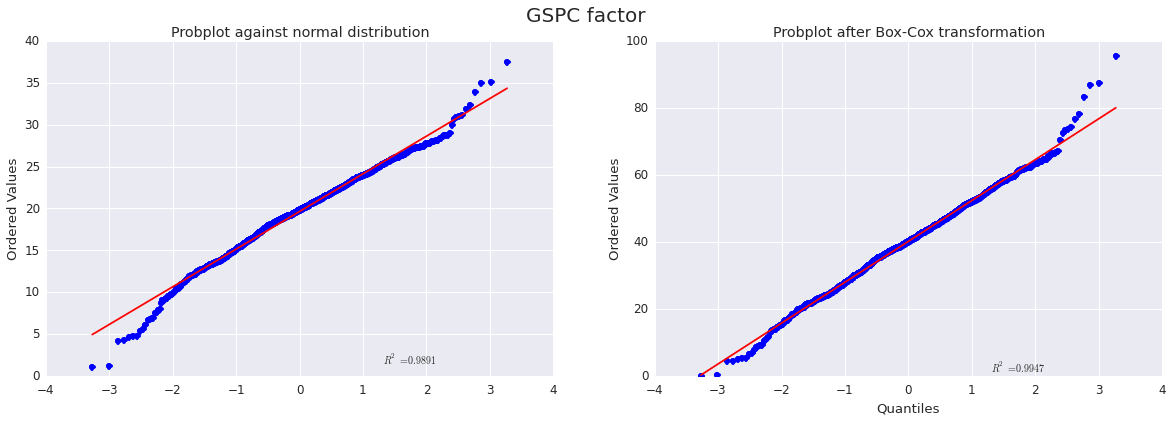

In [184]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
x = np.array(factorsReturns[0]) - (np.min(factorsReturns[0])-1)
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(122)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
fig.suptitle('GSPC factor',fontsize = 20)

In [185]:
def invboxcox(y,ld):
    if ld == 0:
        return(np.exp(y))
    else:
        return(np.power(ld*y+1,1/ld))

In [188]:
factorsReturnsNormalize = list()
lds = list()
posi = list()

for i in range(0,len(factorsReturns)):
    # keep the min value to reverse
    posi.append(np.min(factorsReturns[i])-1)
    # transform
    x = np.array(factorsReturns[i]) - posi[-1] 
    [xt,ld] = stats.boxcox(x)
    lds.append(ld)
    factorsReturnsNormalize.append(xt)

KSresult = list()
KSresult.append(["Oil",KStestNormal(factorsReturns[0])[1], KStestNormal(factorsReturnsNormalize[0])[1]])
KSresult.append(["Treasury",KStestNormal(factorsReturns[1])[1], KStestNormal(factorsReturnsNormalize[1])[1]])
KSresult.append(["GSPC",KStestNormal(factorsReturns[2])[1], KStestNormal(factorsReturnsNormalize[2])[1]])
KSresult.append(["IXIC",KStestNormal(factorsReturns[3])[1], KStestNormal(factorsReturnsNormalize[3])[1]])

pd.DataFrame(KSresult,columns=['factor','before normalize','after normalize'])

factor  before normalize  after normalize
0       Oil      4.313797e-03         0.158629
1  Treasury      8.502350e-01         0.918399
2      GSPC      5.092316e-07         0.013609
3      IXIC      2.596625e-03         0.473559

<div class="alert alert-warning"> 
The table shows that after we normalize factor returns, their distribution is close to normal distribution, all of them past the KS test except GSPC.
</div>

In [190]:
print('Before trasnformation:', factorsReturns[0][0])
print('After transformation:', factorsReturnsNormalize[0][0])
print('Reverse the transformation:',invboxcox(factorsReturnsNormalize[0][0],lds[0])+posi[0])

Before trasnformation: -5.299999999999997
After transformation: 24.8628119606
Reverse the transformation: -5.3


<div class="alert alert-warning"> 
This experiment want to show you that we can convert back to our original data. It will be used after we sample from normal distribution with new transformed data's parameters in order to get sampling of our real factors return. 
</div>

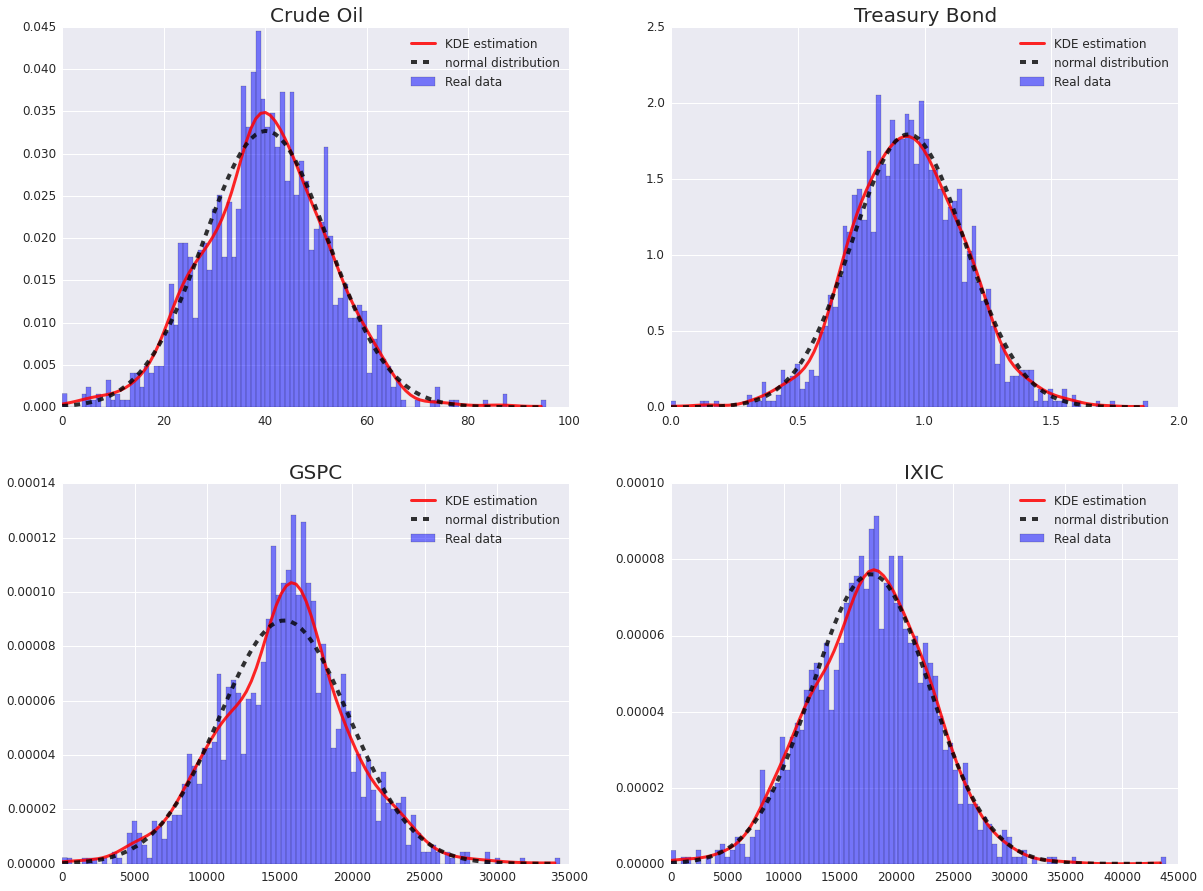

In [191]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Crude Oil',fontsize=20)
plotDistribution(factorsReturnsNormalize[0])
plt.subplot(2,2,2)
plt.title('Treasury Bond',fontsize=20)
plotDistribution(factorsReturnsNormalize[1])
plt.subplot(2,2,3)
plt.title('GSPC',fontsize=20)
plotDistribution(factorsReturnsNormalize[2])
plt.subplot(2,2,4)
plt.title('IXIC',fontsize=20)
plotDistribution(factorsReturnsNormalize[3])
plt.show()

<div class="alert alert-warning">
Our factor distribution now is close to normal distribution. But this transformation still cannot convert data distribution to truely normal distribution. For example, it does not work well with GSPCS factor, p-value increase but still fails the normality test. Now let compare the result with our original model 
</div>

In [192]:
def multivariate_transformednormal_rvs(mean,S,n,lds,posi):
    samples = np.random.multivariate_normal(mean,S,(n,))[0]
    while True:
        reverse_sample = list()
        for idx,sample in enumerate(samples):
            temp = invboxcox(sample,lds[idx])+posi[idx]
            reverse_sample.append(temp)
        
        # NaN problem
        if (len(np.argwhere(np.isnan(reverse_sample))) ==0):
            break
        samples = np.random.multivariate_normal(mean,S,(1,))[0] 
    return [reverse_sample]

In [204]:
def fivePercentVaROff(newTrials):
    newTrials.sort(key=lambda x: x)
    return newTrials[round(len(newTrials)/20)]

def MonteCarloNormalizedEstimate(newStocksReturns,factorsReturns,factorsReturnsNormalize,numTrials,multivariate_func,*arg):
    # Estimate new weight for linear regression model
    param = FactorParameter(newStocksReturns,factorsReturns)
    param1 = FactorParameter(newStocksReturns,factorsReturnsNormalize)
    # run parallel
    parallelism = 12
    trial_indexes = list(range(0, parallelism))
    seedRDD = sc.parallelize(trial_indexes, parallelism)
    bNewFactorWeights = sc.broadcast(param[2])
    
    #newTrials = simulateTrialReturns(
    #                numTrials, 
    #                param1[0],param1[1],
    #                param[2],multivariate_func,*arg)
    #newValueAtRisk = fivePercentVaROff(newTrials)
    
    newTrials = seedRDD.flatMap(lambda idx: simulateTrialReturns(
                   max(int(numTrials / parallelism), 1), 
                   param1[0],param1[1],
                   bNewFactorWeights.value,multivariate_func,*arg))
    newTrials.cache()
    newValueAtRisk = fivePercentVaR(newTrials)
    #newConditionalValueAtRisk = fivePercentCVaR(newTrials)

    print("New Value at Risk(VaR) 5%:", newValueAtRisk)
    return [newTrials,newValueAtRisk]

<div class="alert alert-warning">
One of the problem while I sample the feature vector is NaN appears in our random sample. Because the reverse function is $(λy+1)^{1/λ}$ that means if our y value is less than 0, the error happens. Even we already converted our data into postive value but the domain of distribution from [-inf,inf] that means some rare cases (value <0) can still happen. I deal with problem by re-sample again. In my opinion, it won't affect so much to our real distribution because the incident occurs less than 0.1% 
</div> 

### Normality Transformation

In [205]:
[newTrials,newValueAtRisk] = MonteCarloNormalizedEstimate(stocksReturns,factorsReturns,factorsReturnsNormalize,
                                        300000,multivariate_transformednormal_rvs,lds,posi)

New Value at Risk(VaR) 5%: -20.2336369905


In [206]:
print("Kupiec test p-value: " , kupiecTestPValue(stocksReturns, newValueAtRisk, 0.05))

num failures: 96 over 1295
Kupiec test p-value:  0.000191471419752


In [208]:
def multivariate_normal(factorMeans,factorCov,n,*arg):
    return [np.random.multivariate_normal(factorMeans,factorCov)]

### Without Normality Transformation

In [212]:
[newTrials,newValueAtRisk] = MonteCarloGeneralEstimate(stocksReturns,factorsReturns,200000,multivariate_normal)

New Value at Risk(VaR) 5%: -19.4840290367
New Conditional Value at Risk(CVaR) 5%: -25.0331371665


In [213]:
print("Kupiec test p-value: " , kupiecTestPValue(stocksReturns, newValueAtRisk, 0.05))

num failures: 108 over 1295
Kupiec test p-value:  4.32481037907e-07


<div class="alert alert-warning">
Although we got better result, Normality transformation approach is still worse than using T-distribution or Johnson-Su-distribution. There are many others transformations that can deal with this problem better. It is an interesting approach because gaussian distributions are very well studied with many unique properties so it is better to make your data normality.

<br><br>One of the useful reference for going further in this approach: http://fmwww.bc.edu/repec/bocode/t/transint.html
</div> 


<div class="alert bg-primary" style="background-color: rgba(249, 1, 6, 0.8)">

<h2>Mixture Gaussian Sampling </h2>
</div> 

[]

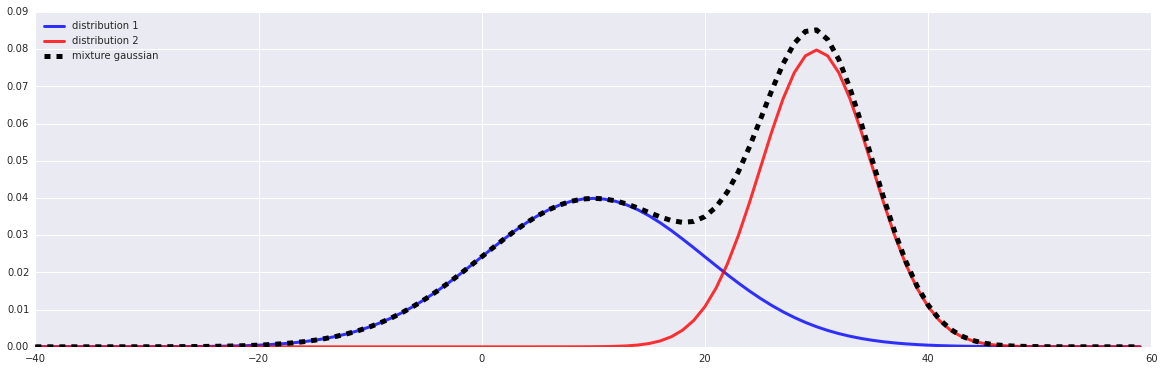

In [82]:
stddev = 10;stddev2=5
mu = 10;mu2=30

domain = np.arange(mu-50,mu+50)
y1 = mlab.normpdf(domain, mu, stddev)
y2 = mlab.normpdf(domain, mu2, stddev2)
# plot
plt.figure(figsize=(20,6))
plt.plot(domain,y1,color='b',alpha = 0.8,lw=3, label = 'distribution 1')
plt.plot(domain,y2,color='r',alpha = 0.8,lw=3, label = 'distribution 2')
plt.plot(domain,y1+y2,'k--',alpha = 1.0,lw=5,label='mixture gaussian')
plt.legend(loc=2)
plt.plot()

<div class="alert alert-warning">
One of the biggest problem is we cannot simulate correctly the distribution of stock return because we use normal distribution for the market factor but it does not really match with practice. Finding better representation is very important. Using Mixture Gaussian, I think we can create more complex distribution and sample from it. 
<br><br>
Because of time, we don't implement and just present our idea. Until now, I still do not know the way to choose number of distribtion need to be used to simulate the desired distribution, called it parameter $x_1$. With defined $x_1$, we can use **Maximum Expectation Method** to estimate mean and standard deviation for each distribution. 
<br><br>
To Sample from it, we use a trick as following: choosely randomly 1 distribtuion with equal probability, then using estimated mean and sd of corresponding distribution to sample data. 

<br><br> Some useful libary for GMM: [PyMix](http://www.pymix.org/pymix/index.php?n=PyMix.Tutorial) or [PyPR](http://pypr.sourceforge.net/)
</div>

<div class="alert bg-primary" style="background-color: rgba(28,180,204,0.8)">
<h2> Delta-gamma Monte Carlo - Future Work  </h2>
</div>

<div class="alert alert-warning">
One of the good approach that I want to use instead of linear regression. Unfortunately, it does not have any package for this model. Even it took me lots of time to understand this but I still do not fully perceive the mathematics thing in the model. In addition, the time does not allow me to implement it and apply into Monte Carlo Simulation so I give a brief explaination about it in case I continue working on this in the future <br><br>

**Delta Approach:** the idea is the change in the returns of an instrument can be approximated by multiplying the change in the returns of the underlying with the corresponding sensitivity of the instrument toward the underlying. In mathematic, we call first-order approximation: 
<br>
<p style="text-align:center">**$f(y+\Delta x)=f(y)+f'(y)\Delta x+\epsilon(1)$**</p>
<br>
This approximation is only good over short period of time because of change of valatility (variance). Furthermore, if stock return jump dramatically so the approximation will be suffered. So it comes up with **Delta-gamme approximation** to incorporate incorporate the next order derivative, which requires the calculation of the second order derivative, gamma:
<br>
<p style="text-align:center">**$f(y+x)=f(y)+f'(y) \Delta x + \frac{1}{2} f''(y) \Delta x^2+ \epsilon(2)$**</p>
<br>
After this approximation, the model can be strenthen by adding other sensitivities such as **Theta** using partial
derivative of the instrument with respect to time, or **vega** for volatility and **rho** for interest rate
<br><br>
At the first thought, you may be relate to Autoregression or Moving Average that I did the test before. But the main point in here they use difference of stock return (change in value) as the new factor instead of using the value of previous day return. And we will see how distribution it is later. I just finish the brief overview about delta-gamma approximation. Now I will do some statistics to analysize the factor created by this model.

<br><br>Reference : http://www.mit.edu/~junpan/ddjpb.pdf, http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.489.6996&rep=rep1&type=pdf
</div>

In [75]:
# get data
[stocksReturnsDG,factorsReturnsDG,stocksReturns1lag] = ARDataExtract(stocksReturns,factorsReturns,1)
stocksReturns1lag = stocksReturns1lag[0]

In [76]:
stocksReturnsDG_1order = np.array(stocksReturnsDG)-np.array(stocksReturns1lag)
stocksReturnsDG_2order = np.square(stocksReturnsDG_1order)

In [77]:
def plotDistribution(samples):
    vmin = min(samples)
    vmax = max(samples)
    stddev = np.std(samples)
    mu = np.mean(samples)
    
    domain = np.arange(vmin, vmax, (vmax-vmin)/100)
    
    # a simple heuristic to select bandwidth
    bandwidth = 1.06 * stddev * pow(len(samples), -.2)
    
    # estimate density
    kde = KDEUnivariate(samples)
    kde.fit(bw=bandwidth)
    density = kde.evaluate(domain)
    
    # plot
    plt.hist(samples,normed=1,bins=100,color='b',alpha = 0.5,label='Real data')
    plt.plot(domain, density,lw=3,color='r',alpha = 0.85, label= 'KDE estimation')
    plt.legend()

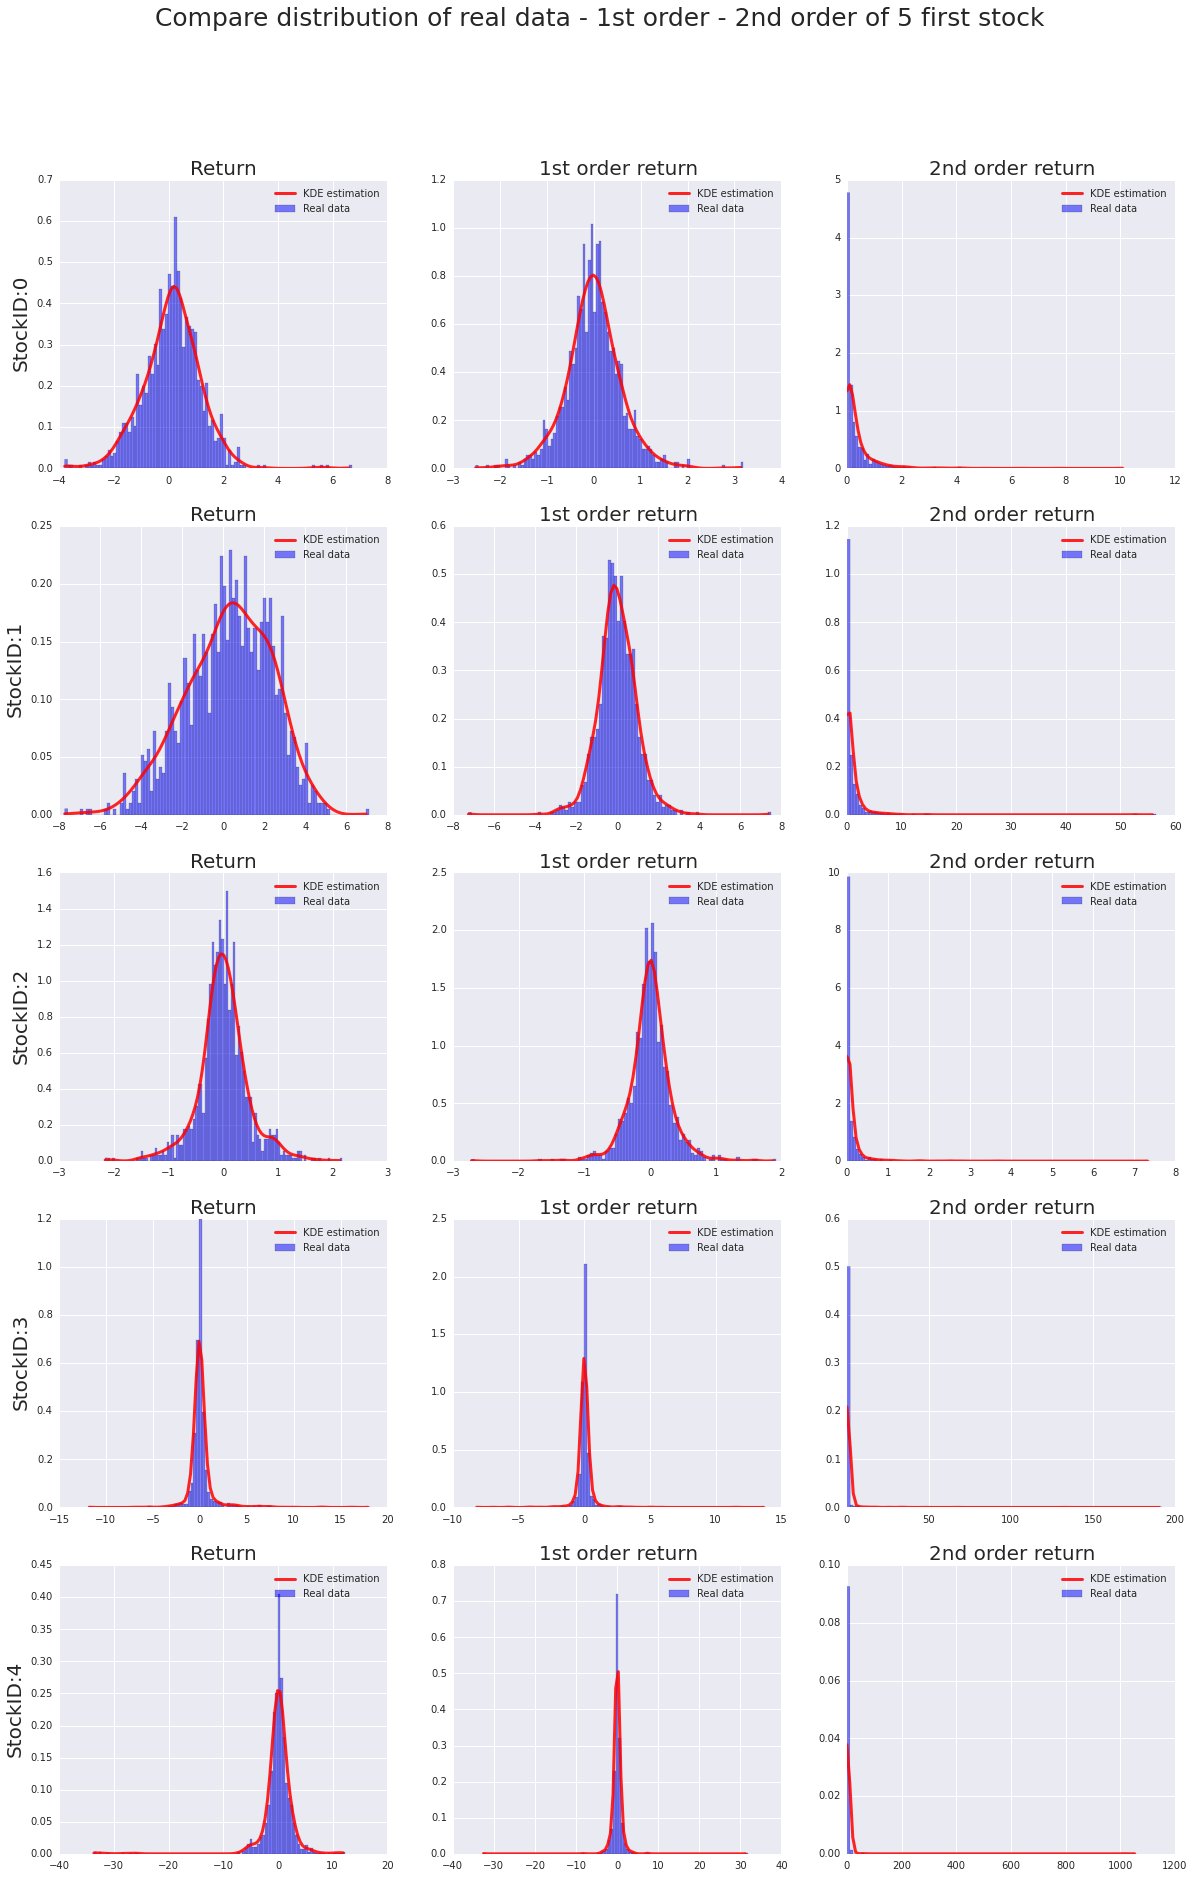

In [78]:
numStock = np.arange(0,5)
nCols = 3
nRows = len(numStock)

f , axarr = plt.subplots(nRows, nCols,figsize=(20,30))
f.suptitle("Compare distribution of real data - 1st order - 2nd order of 5 first stock", fontsize = 25)

for idx in numStock:
    plt.axes(axarr[idx,0])
    plotDistribution(stocksReturnsDG[idx])
    plt.ylabel('StockID:{}'.format(idx),fontsize=20)
    plt.title('Return',fontsize=20)
    plt.axes(axarr[idx,1])
    plotDistribution(stocksReturnsDG_1order[idx])
    plt.title('1st order return',fontsize=20)
    plt.axes(axarr[idx,2])
    plotDistribution(stocksReturnsDG_2order[idx])
    plt.title('2nd order return',fontsize=20)
plt.show()

<div class="alert alert-warning">
As you can observe from the graph, first order is quite smoothy than our stock return data and 2nd order distribution looks likely exponential distribution.<br><br>

Finding parameter and predicting by this model is a little bit more complex than usual, because your observartion in linear regression is changed for each stock. In addition, everytime you samples you have to use different mean vector and covariance matrix. <br><br>

To exploit and apply this model, we need more time to understand carefully each sensitivity factor to find a good distribution representing it. In addition, we can no longer using multivariate of specific distribution because each sensitivity distribution is moderately different. But we can exploit the PCA to reduce the relation between them and sample seperately. 
</div>

In [83]:
def FindParamDeltaGammaModel(stocksReturns,factorsReturns,stockReturns_1order,stockReturns_2order):
    factorMat = transpose(factorsReturns)
    # featurize each row of factorMat
    factorFeatures = list(map(featurize,factorMat))
    # OLS require parameter is a numpy array
    factor_columns = np.array(factorFeatures)
    #add a constant - the intercept term for each instrument i.
    factor_columns = sm.add_constant(factor_columns, prepend=True).T.tolist()
    # Estimate new weight for linear regression model
    new_factor_columns = list()
    weights = list()
    for ind,stock in enumerate(stocksReturns):
        extra_1order = stockReturns_1order[ind]
        extra_2order = stockReturns_2order[ind]
        
        feature_vector = np.asanyarray(factor_columns+[extra_1order,extra_2order]).T
        
        new_factor_columns.append(feature_vector)
        # fit with regression model
        weights.append(estimateParams(stock,feature_vector))
        
    # Cov and Mean
    factorCov = np.cov(factorsReturns)
    factorMeans = [sum(x)/len(x) for x in factorsReturns]

    return [np.asanyarray(new_factor_columns),weights,factorMeans,factorCov]

In [86]:
def MSEwithGammaDeltaModel(factorsReturns,stocksReturns):
    #get prediction 
    [factor_columns,weights] = FindParamRegression(factorsReturns,stocksReturns)
    weights = np.array(weights).T
    prediction = np.dot(factor_columns,weights).T

    # get prediction new 
    [newStocksReturns,newFactor,stockReturn1lag] = ARDataExtract(stocksReturns,factorsReturns,1)
    stockReturn1lag = stockReturn1lag[0]
    newStocksReturn1order = np.array(newStocksReturns)-np.array(stockReturn1lag)
    newStocksReturn2order = np.square(newStocksReturn1order)

    [factor_columns,weights,a,b] = FindParamDeltaGammaModel(newStocksReturns,newFactor,newStocksReturn1order,newStocksReturn2order)
    weights = np.array(weights)
    # predict for each stock
    prediction_n = list()
    for ind,x in enumerate(newStocksReturns):
            prediction_n.append(np.dot(factor_columns[ind],weights[ind]).T.tolist())

    # compute MSE 
    MSE = np.sum((prediction-np.array(stocksReturns))**2,axis=1)/len(stocksReturns[0])
    MSE_n = np.sum((prediction_n-np.array(newStocksReturns))**2,axis=1)/len(newStocksReturns[0])
    x = np.arange(1,len(MSE)+1)

    # plot data
    #sns.set_context("notebook", font_scale=1.2)
    plt.figure(figsize=(15,6))
    plt.plot(x,-MSE_n+MSE,'b-o',linewidth=1, label="Difference between Blue and Red MSE",alpha=0.75)
    plt.bar(x,MSE,0.8, color='c',label="MSE - Origin", alpha = 1,align='center')
    plt.bar(x,MSE_n,0.8,color='r', label="MSE - Gamma-Delta",alpha=0.65,align='center')
    plt.xlim(0,len(weights)+1)
    plt.xlabel("Stock ID")
    plt.ylabel("Mean Square Error")
    plt.legend(loc=0,fontsize=16)
    plt.show()
    

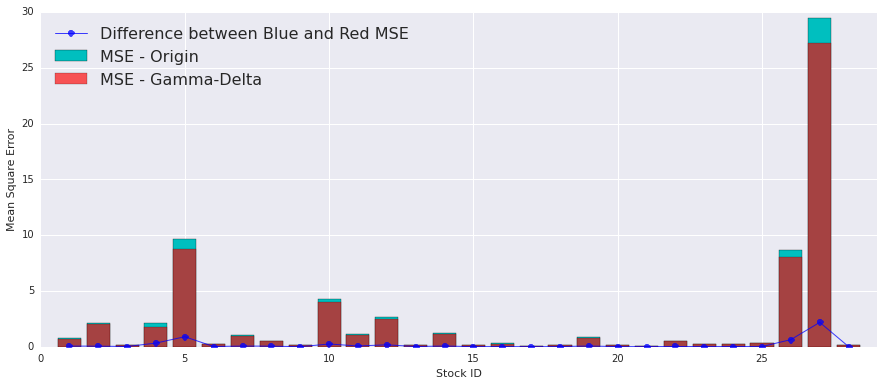

In [87]:
MSEwithGammaDeltaModel(factorsReturns,stocksReturns);

<div class="alert alert-warning">
Our regression model improve after using Delta and Gamma order. To clarify this again, we try to use random 100 stocks to see Delta Gamma performance
</div>

In [88]:
def getRandomRawStockData(size):
    # select path of all stock data files in "stock_folder"
    files = [join(stock_folder, f) for f in listdir(stock_folder) if isfile(join(stock_folder, f))]
    # assume that we invest only the first 35 stocks (for faster computation)
    files = random.sample(files, len(files))
    files = files[:size]
    # read each line in each file, convert it into the format: (date, value)
    rawStocks = [process_stock_file(f) for f in files]
    number_of_years = 7
    rawStocks = list(filter(lambda instrument:((instrument[-1][0]-instrument[0][0]).days/365) > 7
                        , rawStocks))
    return rawStocks

In [91]:
newrawStocks = getRandomRawStockData(100)
newStocks = list(map(lambda newStock: fillInHistory_fix(trimToRegion(newStock, start, end)
                ,start, end), newrawStocks))
newStocksReturns = list(map(twoWeekReturns, newStocks))
newLowRiskStocksReturns = RemoveRiskStock(newStocksReturns,-80,100,8)
print("the number of stock included risky stock is",len(newStocksReturns))
print("the number of stock we invest now is",len(newLowRiskStocksReturns))

the number of stock included risky stock is 69
the number of stock we invest now is 69


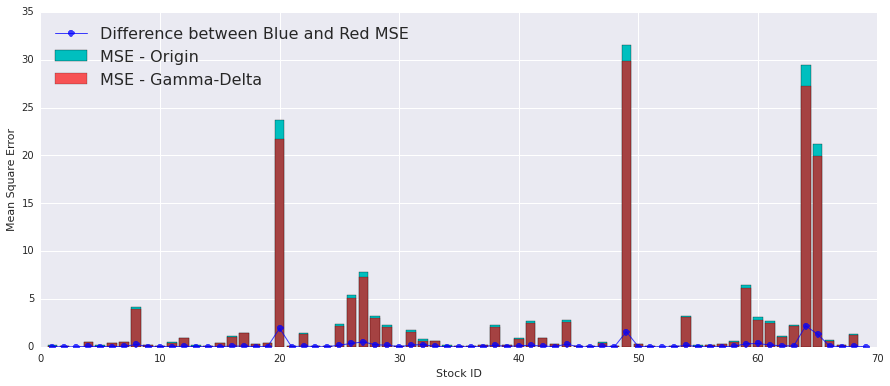

In [93]:
MSEwithGammaDeltaModel(factorsReturns,newLowRiskStocksReturns)

<div class="alert alert-warning">
Delta-gamma model work as I expects. In order to apply this into Monte Carlo, we have to find the distribution for first and second order of the stock return. As I mentioned, its distribution are smoother and have simplier shape so it will be easier to sample it.
<br><br>
In order to improving the model, we need time to research more about this model so I leave it in future work.
</div>

# 6. Summary
In this lecture, we studied the Monte Carlo Simulation method and its application to estimate financial risk. To apply it, first, we needed to define the relationship between market factors and the instruments' returns. In such step, you must define the model which maps the market factors' values to the instruments' values: in our use case, we used a linear regression function for building our model. Next, we also had to find the parameters of our model, which are the weights of the factors we considered. Then, we had to study the distribution of each market factor. A good way to do that is using Kernel density estimation to smooth the distribution and plot it. Depending on the shape of each figure, we had to guess the best fit distribution for each factor: in our use case, we used a very simple approach, and decided that our smoothed distributions all looked normal distributions. 

Then, the idea of Monte Carlo simulation was to generate many possible values for each factor and calculate the corresponding outcomes by a well-defined model in each trial. After many trials, we were able to calculate VaR from the sequences of outcome's values. When the number of trials is large enough, the VaR converges to reasonable values, that we could validate using well-known statistical hypothesis. 

# Conclusion and Comment 
_
<div class="alert alert-danger">
In our extension work, I already tried some useful tests that support for VaR estimation problem. **Kolmogorov Smirnoff Test** is used to check similarity of 2 distribution to find out the good distribution for factors. However, I need to be careful with distribution tail that the test can be suffered. **Breush-Pagan Lagrange Multiplier test** to check whether our model's error have stable variance or not which is helpful to improve regression model.<br><br>

In addition, I try multiple way to improve the distribution of factor by using **T-distribution, Johnson-SU distribution, log-normal** distribution and got the desired result. However, there is some problems about relation between distribution and VaR estimation that I mentioned in log-norm session. I also tried **Principle Analysis Component** to remove dependencies between market factors so that I can sample from any distribution that is good for the market factor. Furthermore, I also tried a simple way to transform **non-normality distribution to normal ditribution** to exploit the strength of normal distribution. Even the result is not good as I expect but we can improve it from this idea in the future. Lastly, Mixture gaussian distribution is also a potential approach for this problem that we mentioned above. 
<br><br>
In the side of regression, I improved the model by using more essential market factors (RUT,VIX,N225,...) to obtain better result. Although we fail on using return percentage, autocorrelation and moving average idea, we found that **delta-gamma approximation** is a good model which can be used to simulate the stock return because its order distributions is simpler and smoothier than stock return itself. Besides, we can also use again the idea of extracting information from itself that we fail on autocorrelation and MA. 
</div>



# References
- The example in section 2 is inspired from [this article](http://www.solver.com/monte-carlo-simulation-example).
- [Backtesting Value-at-Risk models](https://aaltodoc.aalto.fi/bitstream/handle/123456789/181/hse_ethesis_12049.pdf?sequence=1) (Kansantaloustiede, 2009) - (A good reference to study Backtesting).
